## Import Library

In [1]:
#===== Pandas =====#
import pandas as pd

#===== Numpy =====#
import numpy as np

#===== Visualization =====#
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

#===== Statistic Testing =====#
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ==== Preprocessing & model ====#
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

# ===== Evaluation Metrics =====
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

#===== Other =====#
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError
# from sklearn.base import RegressorMixin
from sklearn.utils.validation import check_is_fitted
from yellowbrick.regressor import ResidualsPlot
from explainerdashboard import RegressionExplainer, ExplainerDashboard

pd.set_option('display.max_rows', None)
pd.set_option('display.max_column', None)
import warnings
warnings.filterwarnings('ignore')

## About Dataset

In [2]:
# # Membaca file txt
# with open('/Volumes/MACINTOSH/MD 101/Dataset/house price/data_description.txt', 'r') as file:
#     content = file.read()

# # Menampilkan konten file
# print(content)

## Data Load

In [3]:
df = pd.read_csv('/Volumes/MACINTOSH/MD 101/Dataset/house price/train.csv')

In [4]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df = df.drop('Id', axis=1)

In [7]:
df.GarageYrBlt.head(5)

0    2003.0
1    1976.0
2    2001.0
3    1998.0
4    2000.0
Name: GarageYrBlt, dtype: float64

<Axes: xlabel='SalePrice', ylabel='Count'>

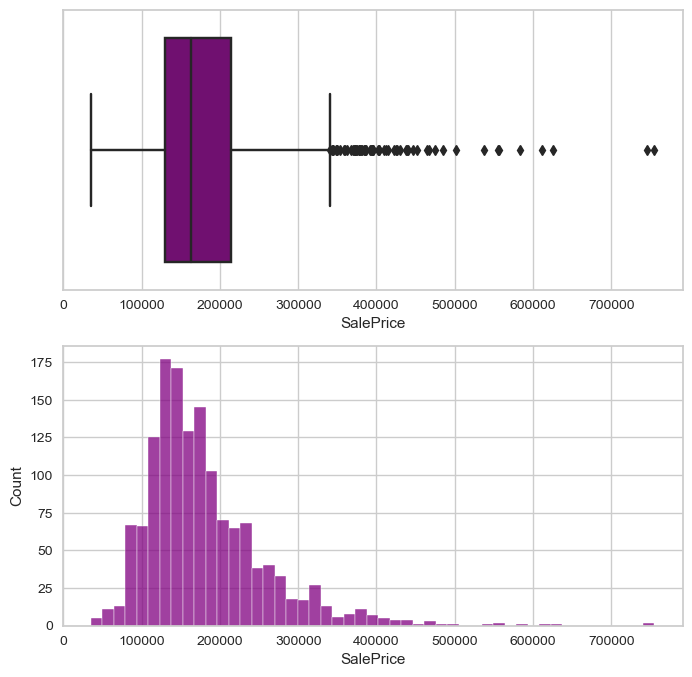

In [8]:
fig, axs = plt.subplots(2,1, figsize=(8,8))

sns.boxplot(data=df, x='SalePrice', color='purple', ax=axs[0])
sns.histplot(data=df, x='SalePrice', color='purple', ax=axs[1])

Distribusi datanya skewed ke kanan

<Axes: xlabel='SalePrice', ylabel='Count'>

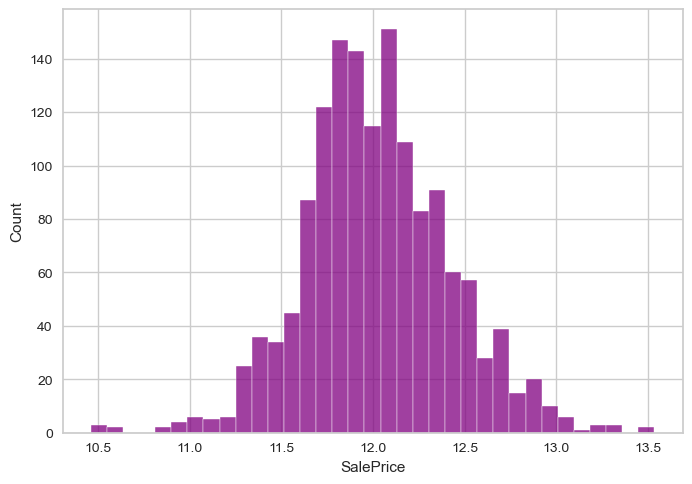

In [9]:
sns.histplot(data=df, x=np.log(df['SalePrice']), color='purple')

dengan menggunakan transformsi logaritmik data nya mendekati distribusi normal

In [10]:
df.describe(include='int64').T

count           mean           std      min        25%  \
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
MSSubClass         50.0      70.00     190.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
TotRmsAbvGrd        6.0       7.00      14.0  
Fireplaces          1.0       1.00       3.0  
GarageCars          2.0       2.00       4.0  
GarageArea        480.0     576.00    1418.0  
WoodDeckSF          0.0     168.00     857.0  
OpenPorchSF        25.0      68.00     547.0  
EnclosedPorch       0.0       0.00     552.0  
3SsnPorch           0.0       0.00     508.0  
ScreenPorch         0.0       0.00     480.0  
PoolArea       

In [11]:
df.describe(include='float64').T

count         mean         std     min     25%     50%     75%  \
LotFrontage  1201.0    70.049958   24.284752    21.0    59.0    69.0    80.0   
MasVnrArea   1452.0   103.685262  181.066207     0.0     0.0     0.0   166.0   
GarageYrBlt  1379.0  1978.506164   24.689725  1900.0  1961.0  1980.0  2002.0   

                max  
LotFrontage   313.0  
MasVnrArea   1600.0  
GarageYrBlt  2010.0

In [12]:
df.describe(include='O').T

count unique      top  freq
MSZoning       1460      5       RL  1151
Street         1460      2     Pave  1454
Alley            91      2     Grvl    50
LotShape       1460      4      Reg   925
LandContour    1460      4      Lvl  1311
Utilities      1460      2   AllPub  1459
LotConfig      1460      5   Inside  1052
LandSlope      1460      3      Gtl  1382
Neighborhood   1460     25    NAmes   225
Condition1     1460      9     Norm  1260
Condition2     1460      8     Norm  1445
BldgType       1460      5     1Fam  1220
HouseStyle     1460      8   1Story   726
RoofStyle      1460      6    Gable  1141
RoofMatl       1460      8  CompShg  1434
Exterior1st    1460     15  VinylSd   515
Exterior2nd    1460     16  VinylSd   504
MasVnrType     1452      4     None   864
ExterQual      1460      4       TA   906
ExterCond      1460      5       TA  1282
Foundation     1460      6    PConc   647
BsmtQual       1423      4       TA   649
BsmtCond       1423      4       TA  1311
BsmtExposure   1422      4       No   953
BsmtFinType1   1423      6      Unf   430
BsmtFinType2   1422      6      Unf  1256
Heating        1460      6     GasA  1428
HeatingQC      1460      5       Ex   741
CentralAir     1460      2        Y  1365
Electrical     1459      5    SBrkr  1334
KitchenQual    1460      4       TA   735
Functional     1460      7      Typ  1360
FireplaceQu     770      5       Gd   380
GarageType     1379      6   Attchd   870
GarageFinish   1379      3      Unf   605
GarageQual     1379      5       TA  1311
GarageCond     1379      5       TA  1326
PavedDrive     1460      3        Y  1340
PoolQC            7      3       Gd     3
Fence           281      4    MnPrv   157
MiscFeature      54      4     Shed    49
SaleType       1460      9       WD  1267
SaleCondition  1460      6   Normal  1198

In [13]:
pd.DataFrame(df.isnull().sum().sort_values(ascending=False)).head(20)

0
PoolQC        1453
MiscFeature   1406
Alley         1369
Fence         1179
FireplaceQu    690
LotFrontage    259
GarageYrBlt     81
GarageCond      81
GarageType      81
GarageFinish    81
GarageQual      81
BsmtExposure    38
BsmtFinType2    38
BsmtCond        37
BsmtQual        37
BsmtFinType1    37
MasVnrArea       8
MasVnrType       8
Electrical       1
MSSubClass       0

## Missing Value

Menganalisis fitur yang terindikasi memiliki missing vallue berdasarkan target HousePrice

In [14]:
def analyse_missing_with_target(df,var):

    df = df.copy()
    
    df[var] = np.where(
        df[var].isnull(),1,0
    )
    
    temp = df.groupby(var)['SalePrice'].agg(['median','std'])
    
#     Plotting
    temp.plot(kind='barh',y='median',legend=False,xerr='std',title = 'Crime Code', color='purple')
    
    plt.show()

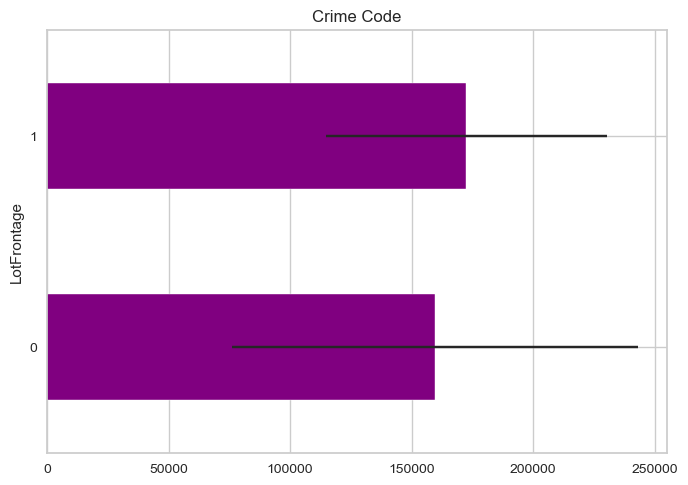

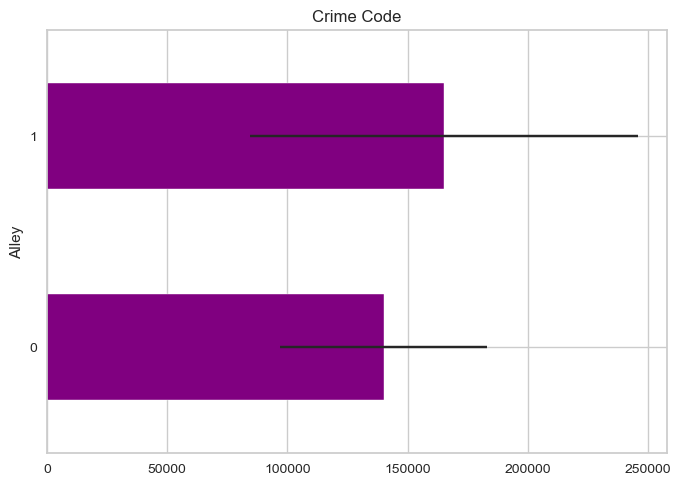

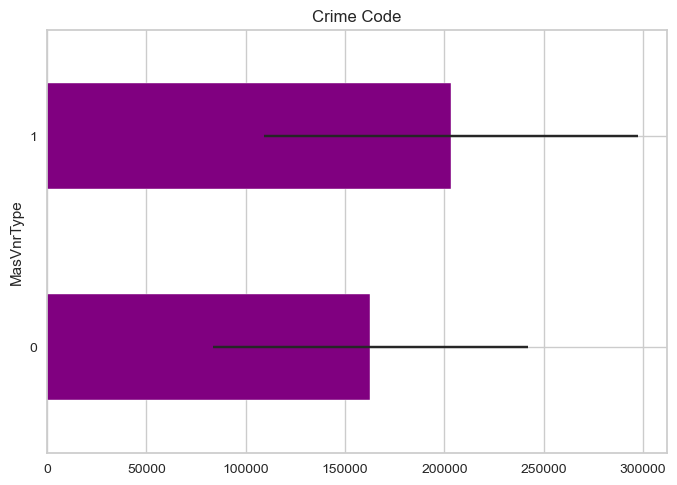

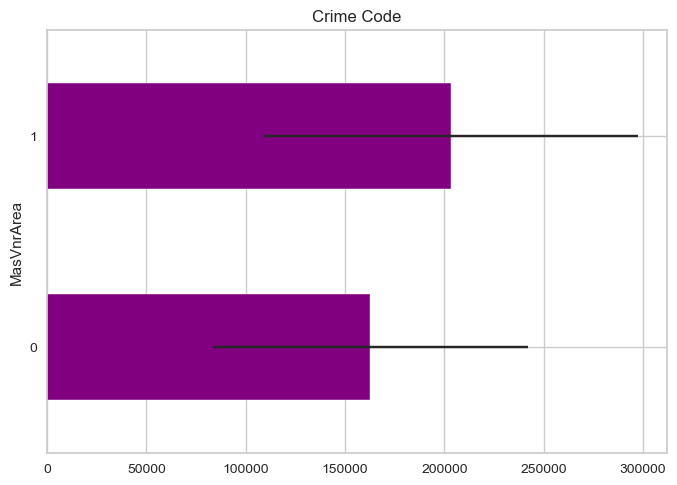

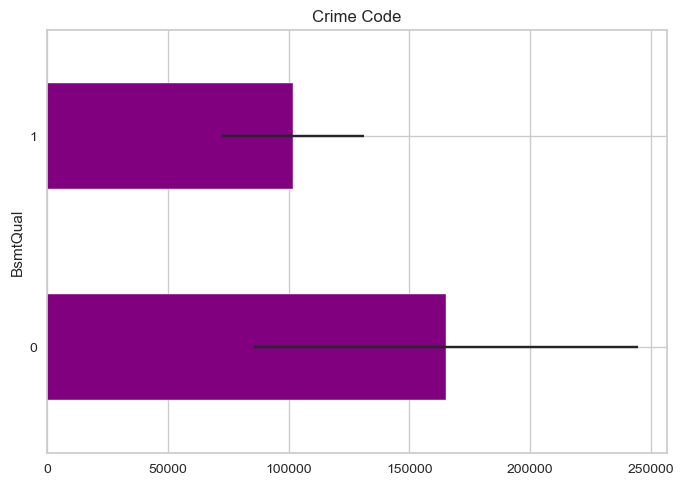

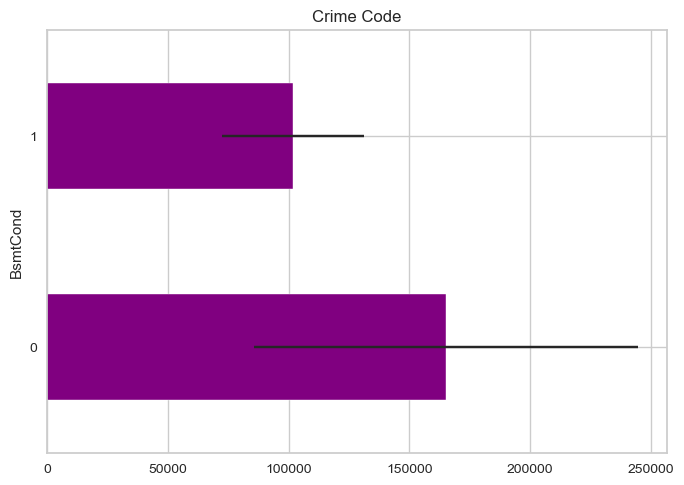

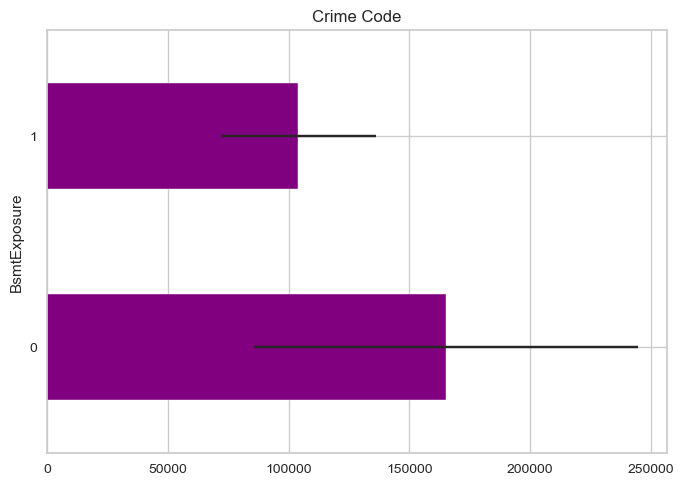

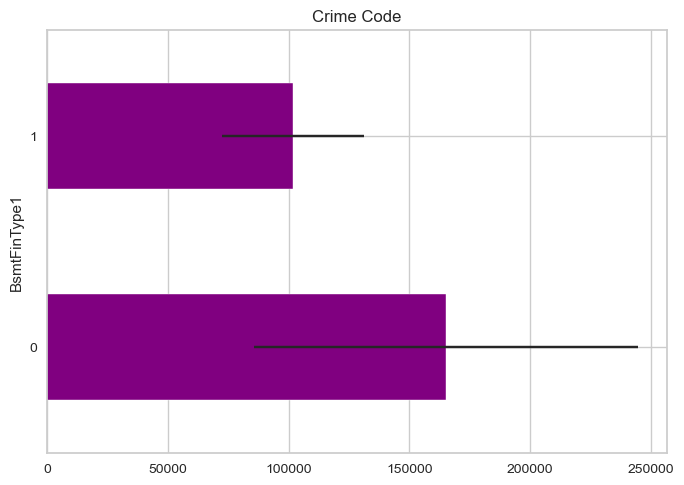

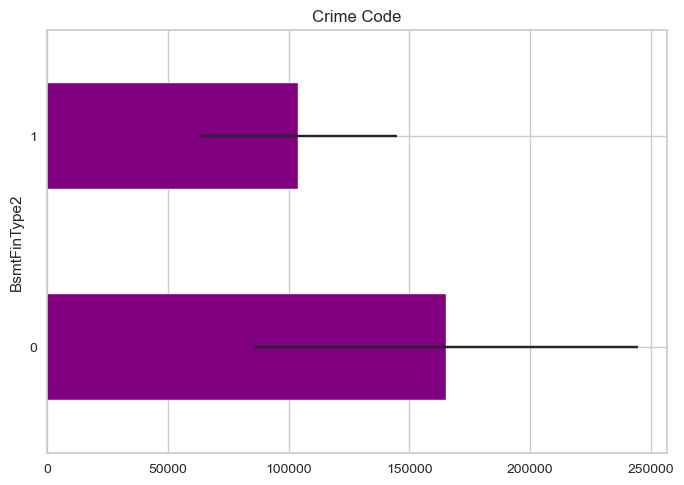

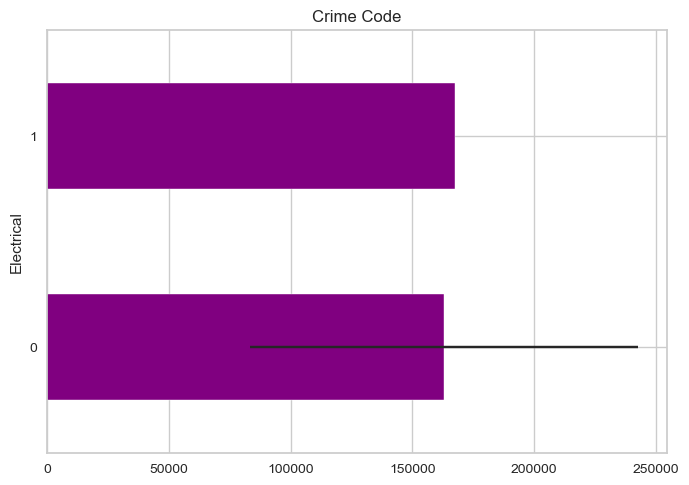

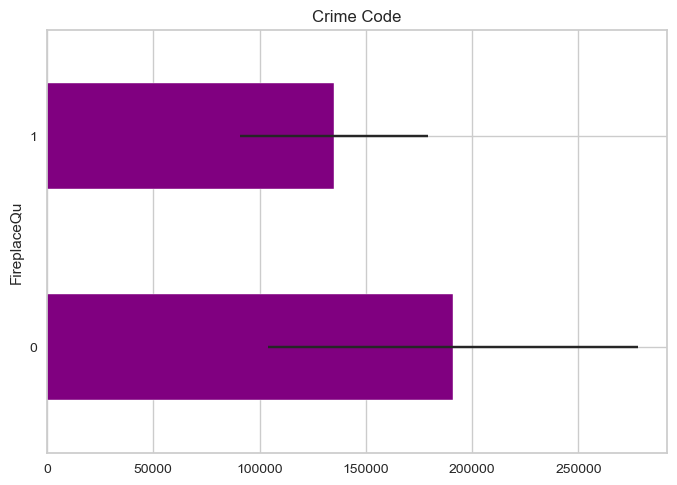

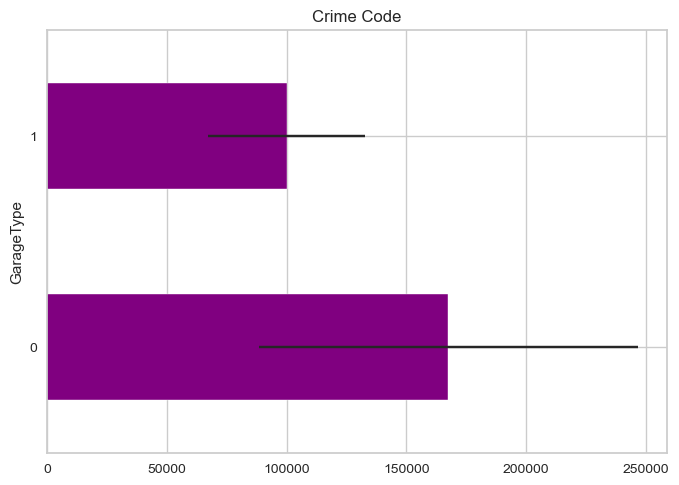

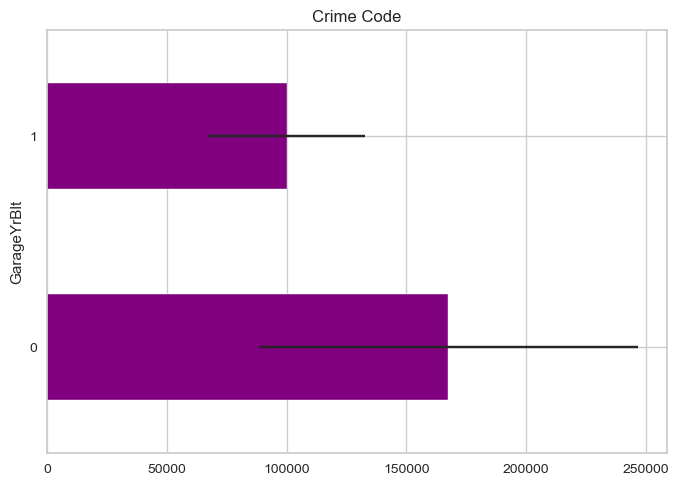

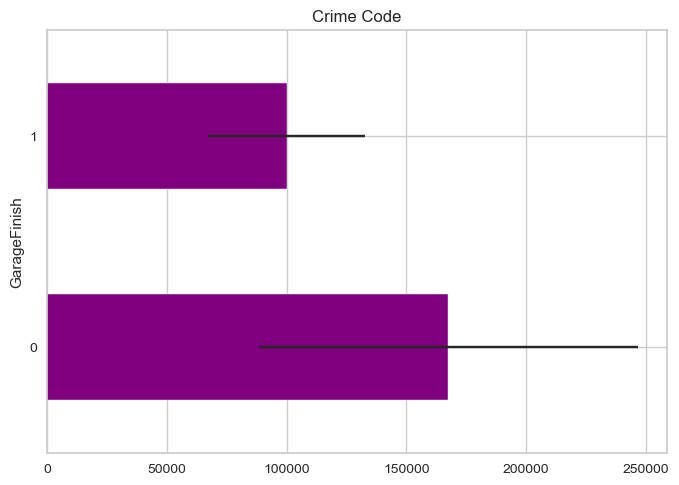

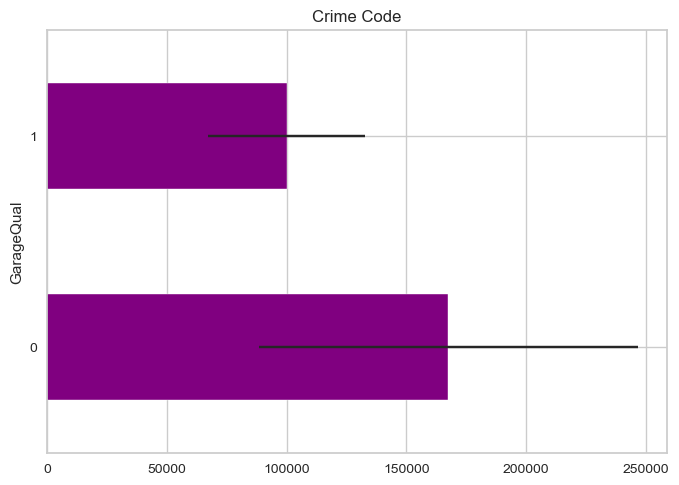

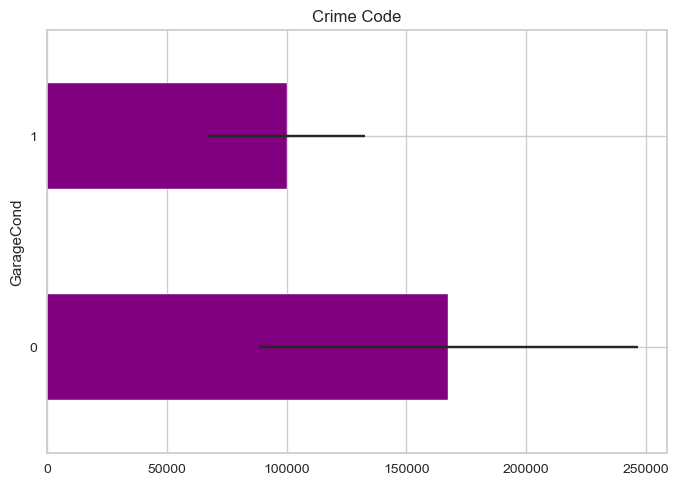

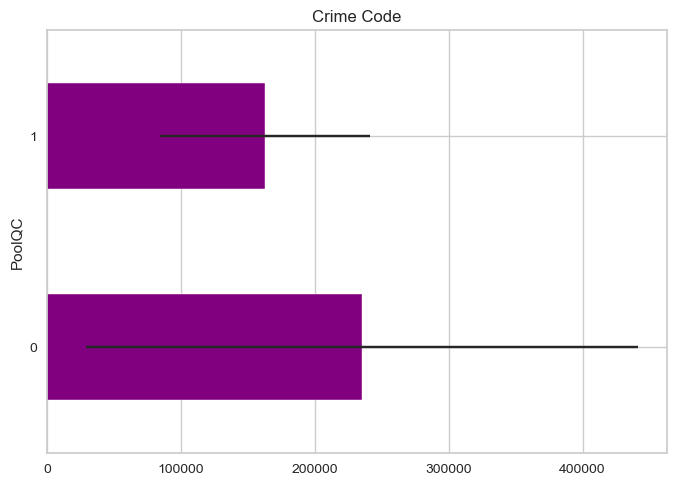

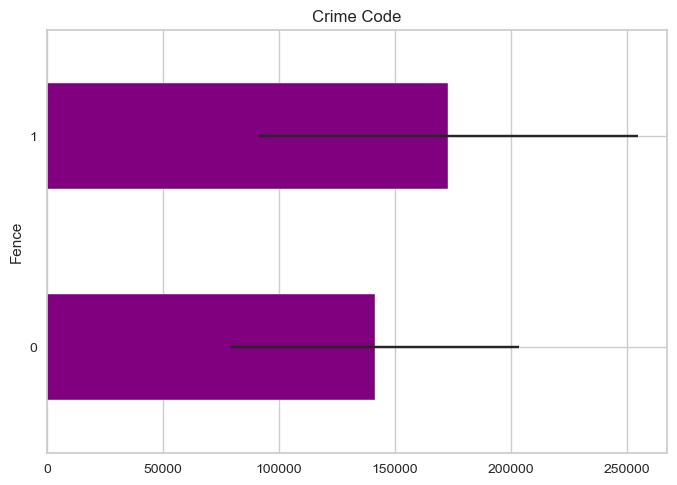

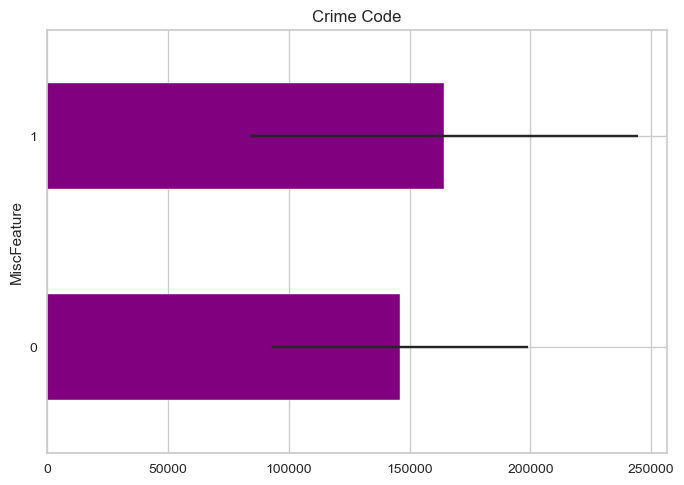

In [15]:
var_with_na = [
    var for var in df.columns if df[var].isnull().sum() > 0
]

for var in var_with_na:
    analyse_missing_with_target(df,var)

#### SUMMARY

1. LotFrontage : Nilai yang missing justru memiliki HousePrice yang tinggi dibanding dengan nilai yang tidak missing

2. Alley : Ternyata ketika rumah yang memiliki akses pada gang yang nilainya missing, justru memiliki nilai HousePrice yang tinggi dibangdingkan yang memiliki nilai yang tidak missing

3. MasVnrType : Nilai yang missing pada jenis batu bata secara median harga justru memiliki HousePrice yang tinggi dibangding yang memiliki nilai

4. MasVnrArea : juga sama, bahwa nilai yang missing cenderung memiliki HousePrice yang tinggi

5. BsmtQual : rumah yang memiliki nilai yang missing pada kualitas basement cenderung memiliki niali HouseProce yang rendah, dibandingkan nilai yang tidak missing, demikian juga pada kolom BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 



Secara median ketika suatu fitur yang memiliki nilai yang hilang cenderung memiliki harga jual yang tinggi, oleh karena itu nilai yang hilang dalam hal ini cenderung dapat dijadikan prediktor yang baik pada kasus ini dikemudian hari.

In [16]:
pd.DataFrame(df.isnull().sum().sort_values(ascending=False)).head(20)

0
PoolQC        1453
MiscFeature   1406
Alley         1369
Fence         1179
FireplaceQu    690
LotFrontage    259
GarageYrBlt     81
GarageCond      81
GarageType      81
GarageFinish    81
GarageQual      81
BsmtExposure    38
BsmtFinType2    38
BsmtCond        37
BsmtQual        37
BsmtFinType1    37
MasVnrArea       8
MasVnrType       8
Electrical       1
MSSubClass       0

In [17]:
print(df['Electrical'].value_counts())
print(df['Electrical'].unique())

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]


In [18]:
print(df['BsmtFinType1'].value_counts())
print(df['BsmtFinType1'].unique())

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']


## Category Imputation

In [19]:
df['Fence'].fillna('No', inplace=True)
df['Alley'].fillna('No', inplace=True)
df['MasVnrType'].fillna('No', inplace=True)
df['MasVnrArea'].fillna(0, inplace=True)
df['FireplaceQu'].fillna('No', inplace=True)
df['LotFrontage'].fillna(0, inplace=True)
df['GarageCond'].fillna('No', inplace=True)
df['GarageType'].fillna('No', inplace=True)
df['GarageFinish'].fillna('No', inplace=True)
df['GarageQual'].fillna('No', inplace=True)
df['BsmtFinType2'].fillna('Unf', inplace=True)
df['BsmtExposure'].fillna('No', inplace=True)
df['BsmtQual'].fillna('No', inplace=True)
df['BsmtCond'].fillna('No', inplace=True)
df['BsmtFinType1'].fillna('Unf', inplace=True)
df['MasVnrArea'].fillna(0, inplace=True)
df['Electrical'].fillna('SBrkr', inplace=True)

## Tren Analysis

1. YearBuilt : Tahun Pembuatan Rumah
2. YearRemodAdd : Tahun rumah di renovasi
3. GarageYrBlt : Tahun garasi dibangun
4. YrSold : Tahun Rumah Terjual

Untuk melihat umur rumah maka diperlukan fitur baru yang mana dalam hal ini YearBuilt atau tahun dibuatnya rumah dan YrSold tahun dijualnya rumah

In [20]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave    No      Reg   
1          20       RL         80.0     9600   Pave    No      Reg   
2          60       RL         68.0    11250   Pave    No      IR1   
3          70       RL         60.0     9550   Pave    No      IR1   
4          60       RL         84.0    14260   Pave    No      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0          No   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Typ           

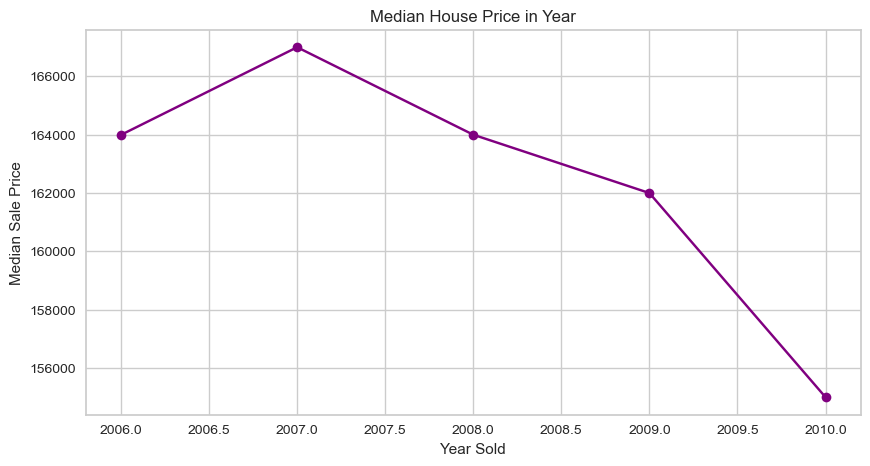

YrSold
2006    163995.0
2007    167000.0
2008    164000.0
2009    162000.0
2010    155000.0
Name: SalePrice, dtype: float64

In [21]:
median_price_per_year = df.groupby('YrSold')['SalePrice'].median()

# Visualisasi
plt.figure(figsize=(10, 5))
plt.plot(median_price_per_year.index, median_price_per_year.values, marker='o', color='purple')
plt.xlabel('Year Sold')
plt.title('Median House Price in Year')
plt.ylabel('Median Sale Price')
plt.grid(True)

plt.show()

median_price_per_year

Biasanya harga jual pada suatu rumah di tiap tahun cenderung lebih mahal, tapi tren diatas menunjukkan penurunan harga jual rumah dan penurunan terjadi di tahun 2007 - 2010, hal tersebut membutuhkan  eksplorasi analisis lebih lanjut terkait penurunan harga jual rumah

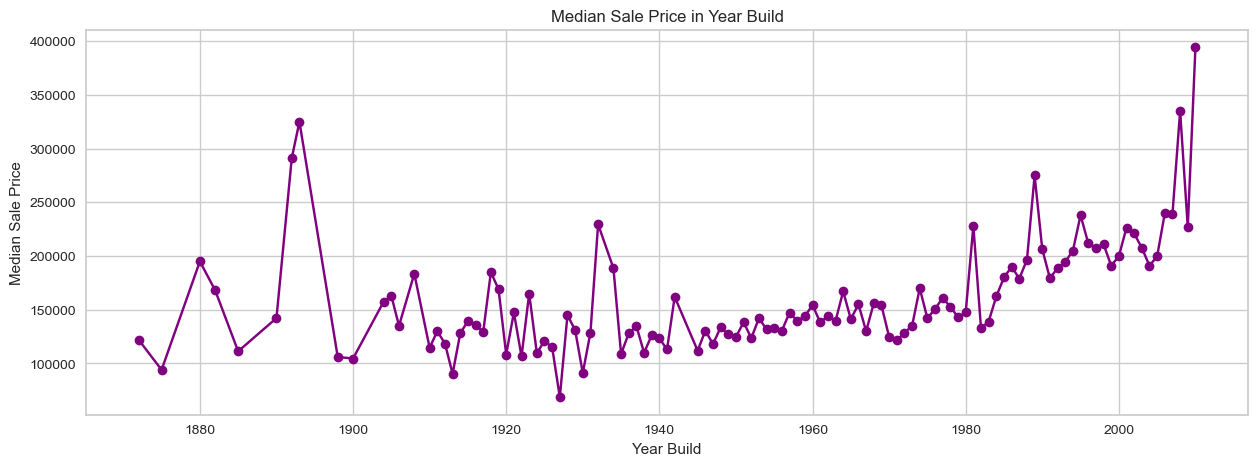

In [22]:
median_price_in_YrBuilt = df.groupby('YearBuilt')['SalePrice'].median()

# Visualisasi
plt.figure(figsize=(15, 5))
plt.plot(median_price_in_YrBuilt.index, median_price_in_YrBuilt.values, marker='o', color='purple')
plt.xlabel('Year Build')
plt.ylabel('Median Sale Price')
plt.title('Median Sale Price in Year Build')
plt.grid(True)

plt.show()

Pada tren diatas menunjukkan dimana tahun dibuatnya rumah dari tahun ke tahun mengalami fluktuatif walaupun begitu secara mmedian nilai penjualannya naik

In [23]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [24]:
df['HouseAge'] = df['YrSold'] - df['YearBuilt']
df['TimeYearRemoddAdd'] = df['YrSold'] - df['YearRemodAdd']
df['TimeGarageYrBlt'] = df['YrSold'] - df['GarageYrBlt']

In [25]:
df.TimeGarageYrBlt.head(5)

0     5.0
1    31.0
2     7.0
3     8.0
4     8.0
Name: TimeGarageYrBlt, dtype: float64

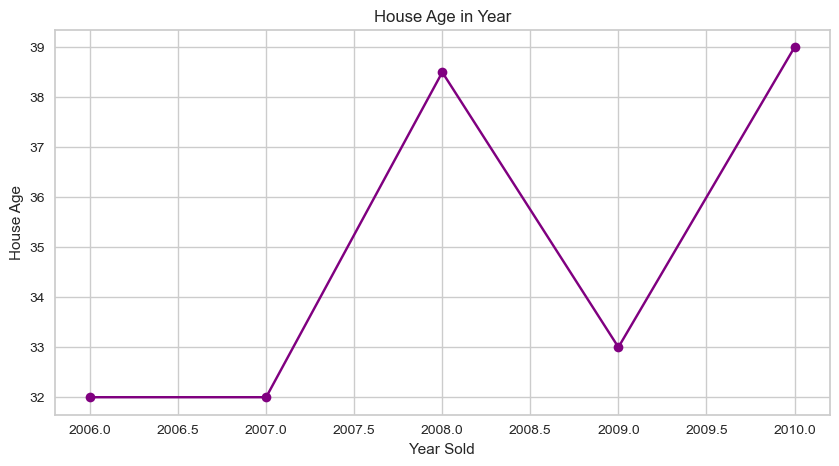

In [26]:
HouseAge_in_year = df.groupby('YrSold')['HouseAge'].median()

# Visualisasi
plt.figure(figsize=(10, 5))
plt.plot(HouseAge_in_year.index, HouseAge_in_year.values, marker='o', color='purple')
plt.xlabel('Year Sold')
plt.ylabel('House Age')
plt.title('House Age in Year')
plt.grid(True)

plt.show()

In [27]:
HouseAge_in_year

YrSold
2006    32.0
2007    32.0
2008    38.5
2009    33.0
2010    39.0
Name: HouseAge, dtype: float64

Terdapat peningkatan usia rumah di tahun 2007 - 2008 kemudian dari 2009 - 2010

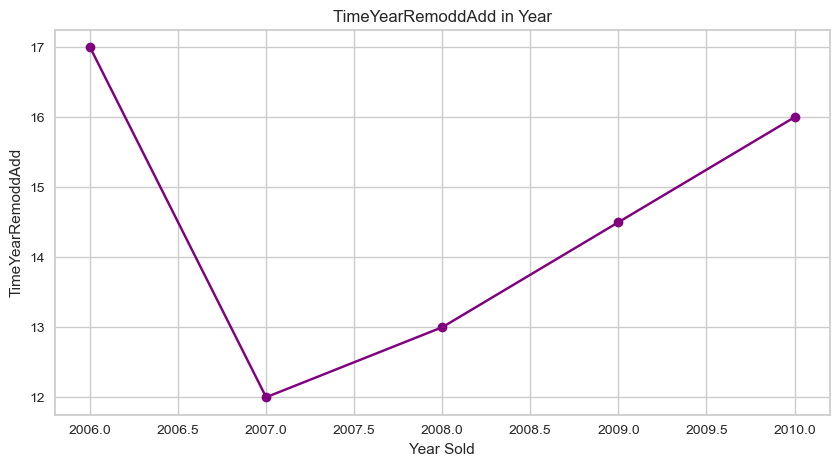

In [28]:
Time_RemoddAdd = df.groupby('YrSold')['TimeYearRemoddAdd'].median()

# Visualisasi
plt.figure(figsize=(10, 5))
plt.plot(Time_RemoddAdd.index, Time_RemoddAdd.values, marker='o', color='purple')
plt.xlabel('Year Sold')
plt.ylabel('TimeYearRemoddAdd')
plt.title('TimeYearRemoddAdd in Year')
plt.grid(True)

plt.show()

Terdapat peningkatan umur rumah yang telah direnovasi dari tahunn 2007 - 2010

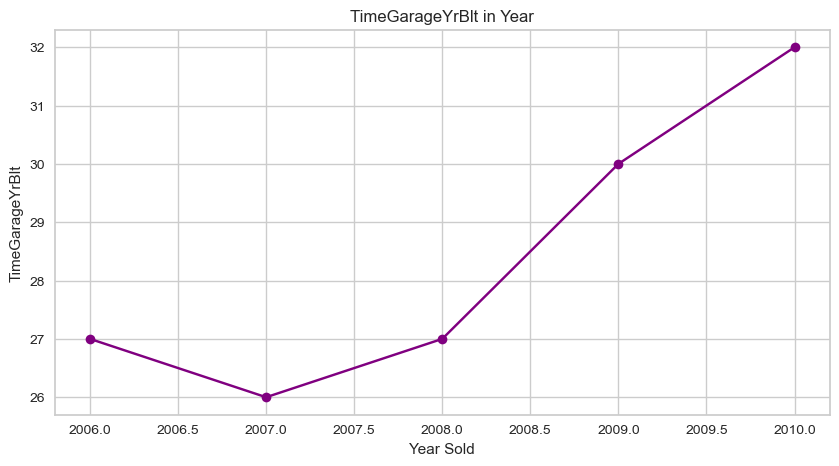

In [29]:
Time_Garage_inYrSold = df.groupby('YrSold')['TimeGarageYrBlt'].median()

# Visualisasi
plt.figure(figsize=(10, 5))
plt.plot(Time_Garage_inYrSold.index, Time_Garage_inYrSold.values, marker='o', color='purple')
plt.xlabel('Year Sold')
plt.ylabel('TimeGarageYrBlt')
plt.title('TimeGarageYrBlt in Year')
plt.grid(True)

plt.show()

Terdapat peningkatan usia umur garasi dari tahun 2007 sampai 2010

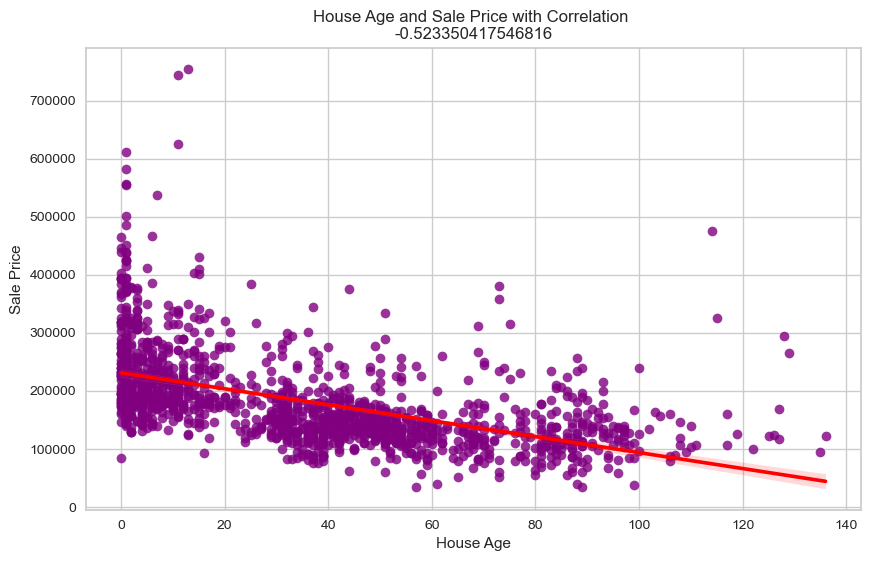

In [30]:
corr_HouseAge_SalePrice = df['HouseAge'].corr(df['SalePrice'])

plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='HouseAge', y='SalePrice', line_kws={'color': 'red'}, color='purple')

# Menambahkan label dan judul
plt.xlabel('House Age')
plt.ylabel('Sale Price')
plt.title(f'House Age and Sale Price with Correlation \n{corr_HouseAge_SalePrice}')
plt.grid(True)

# Menampilkan plot
plt.show()


Semakin tua umur rumah maka semakin murah harga jualnya

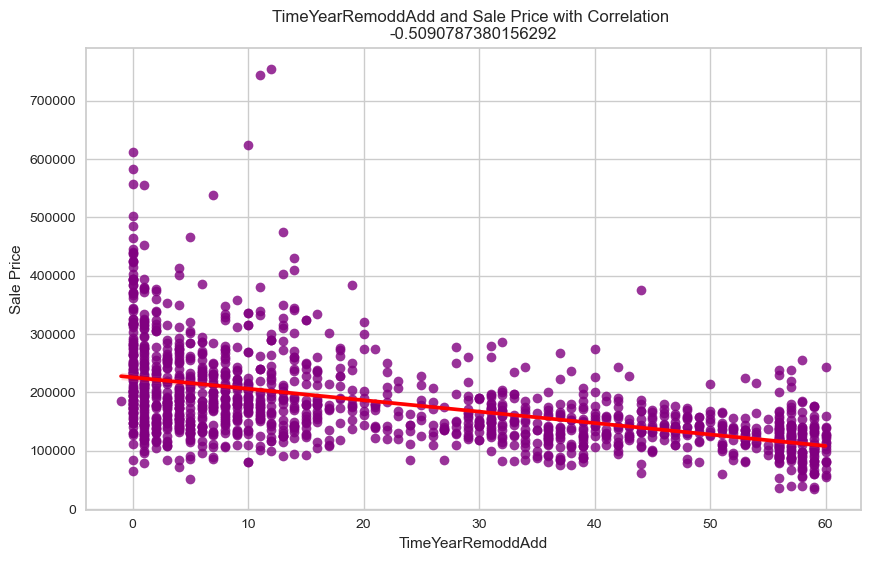

In [31]:
Corr_Time_YrRemoddAdd = df['TimeYearRemoddAdd'].corr(df['SalePrice'])

plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='TimeYearRemoddAdd', y='SalePrice', line_kws={'color': 'red'}, color='purple')

# Menambahkan label dan judul
plt.xlabel('TimeYearRemoddAdd')
plt.ylabel('Sale Price')
plt.title(f'TimeYearRemoddAdd and Sale Price with Correlation \n{Corr_Time_YrRemoddAdd}')
plt.grid(True)

# Menampilkan plot
plt.show()


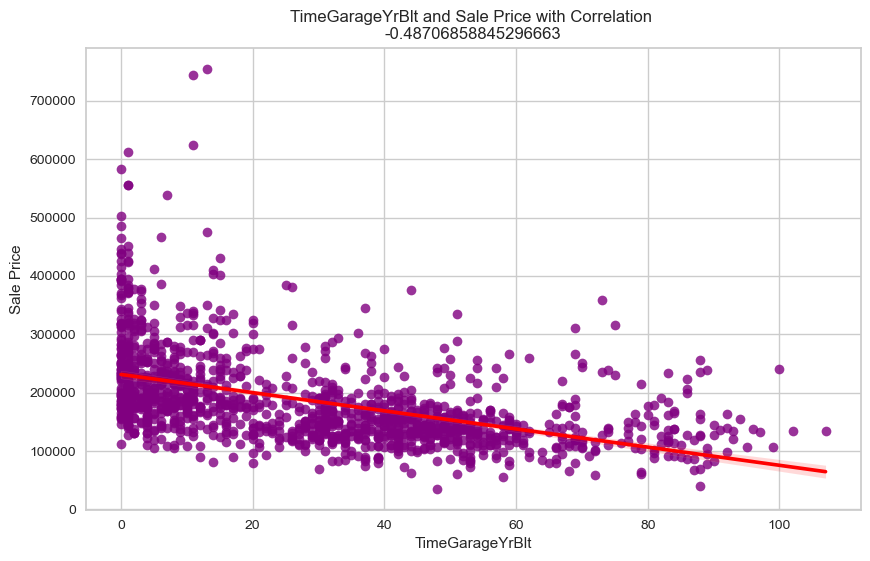

In [32]:
Corr_TimeGarageYrBlt = df['TimeGarageYrBlt'].corr(df['SalePrice'])
 
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='TimeGarageYrBlt', y='SalePrice', line_kws={'color': 'red'}, color='purple')

# Menambahkan label dan judul
plt.xlabel('TimeGarageYrBlt')
plt.ylabel('Sale Price')
plt.title(f'TimeGarageYrBlt and Sale Price with Correlation \n{Corr_TimeGarageYrBlt}')
plt.grid(True)

# Menampilkan plot
plt.show()



#### SUMMARY

berdasarkan hasil korelasi diatas menunjukkan bahwa rumah yang berumur tua, garasi berumur tua dan renovasi yang berumur tua memiliki korelasi negatif atau cukup kuat bahwa semakin berumur ke tiga fitur tersebut memiliki harga jual yang murah, hal tersebut menjadi alasan pada tren penjualan di tiap tahunnya mengalami penurunan harga jual

### Define the variable

In [33]:
num_cols = df.select_dtypes(include=['number'])

In [34]:
year_cols = [year for year in num_cols if 'Yr' in year or 'Year' in year]

year_cols

['YearBuilt',
 'YearRemodAdd',
 'GarageYrBlt',
 'YrSold',
 'TimeYearRemoddAdd',
 'TimeGarageYrBlt']

In [35]:
desc_col = [desc for desc in num_cols.columns if num_cols[desc].nunique() < 20]
desc_col

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'PoolArea',
 'MoSold',
 'YrSold']

In [36]:
cont_col = [cont for cont in num_cols.columns if cont not in desc_col + year_cols + ['SalePrice'] + ['HouseAge']]
cont_col

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal']

In [37]:
cat_cols = df.select_dtypes(include=['object'])

#### Discreat variable analysis

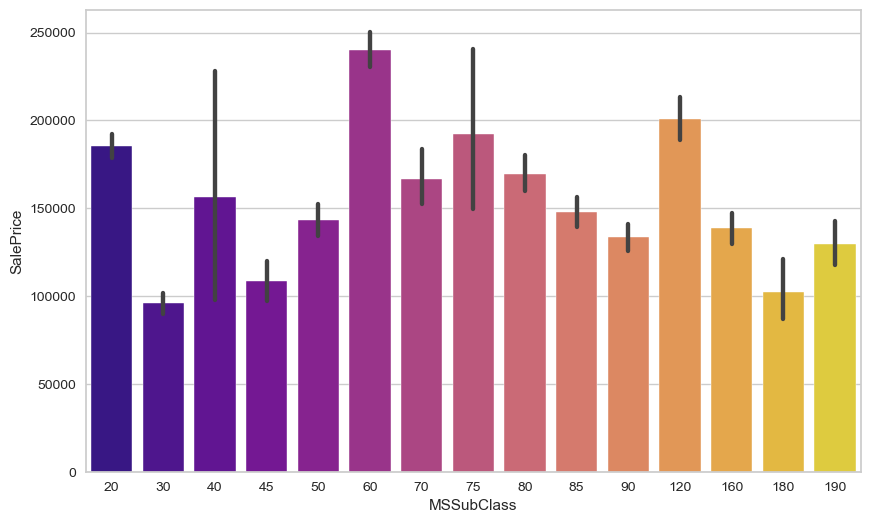

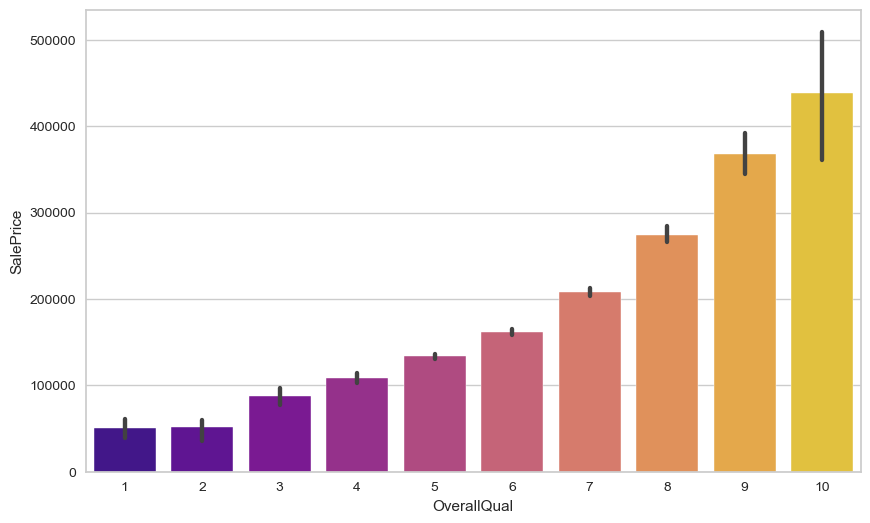

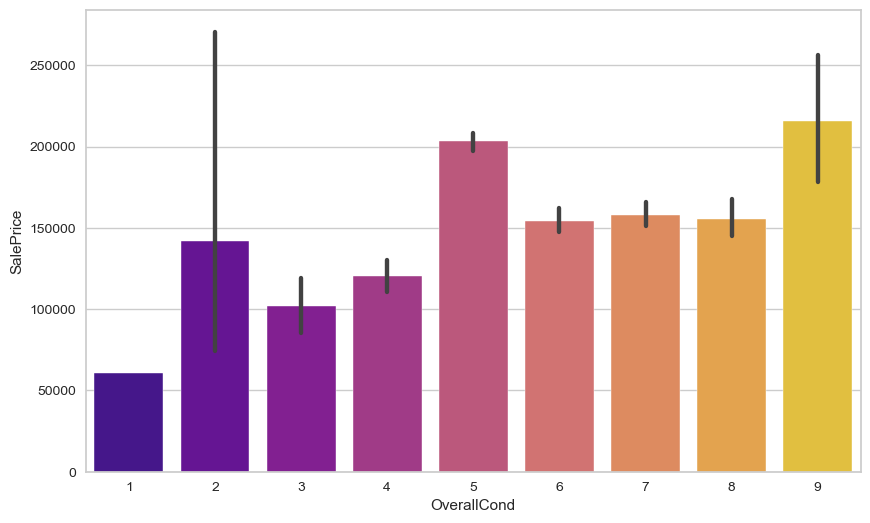

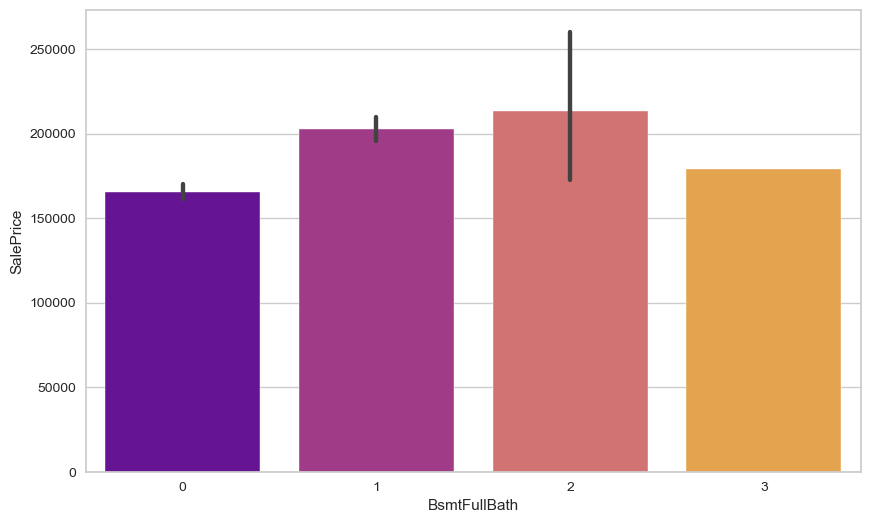

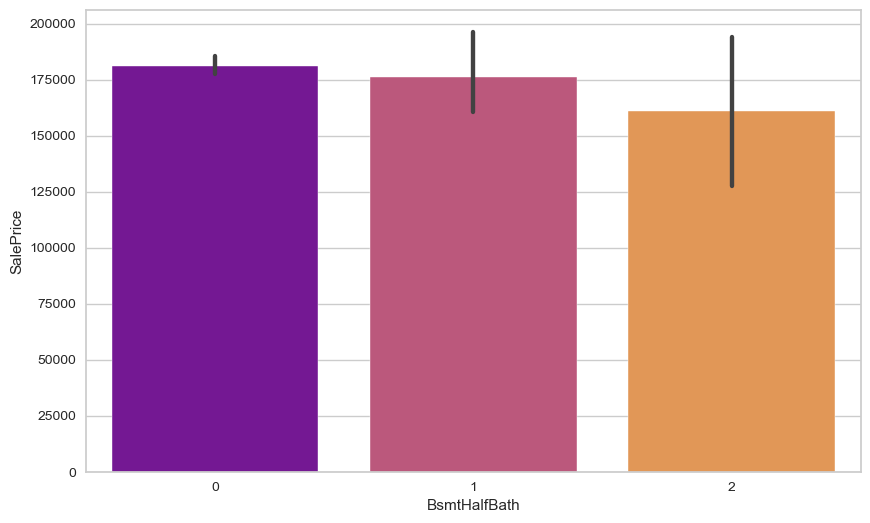

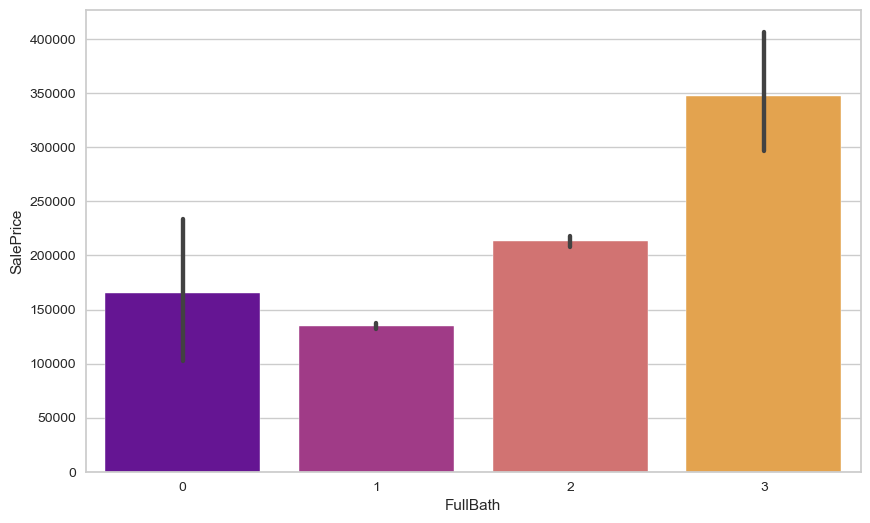

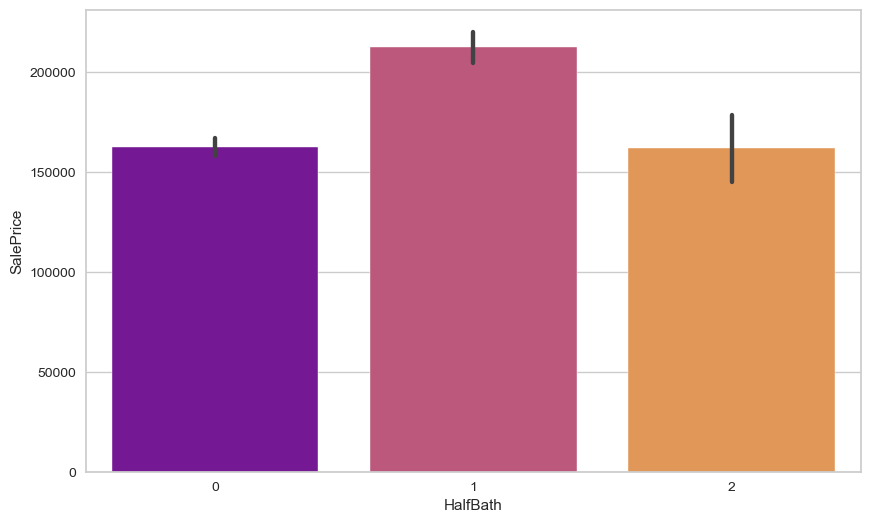

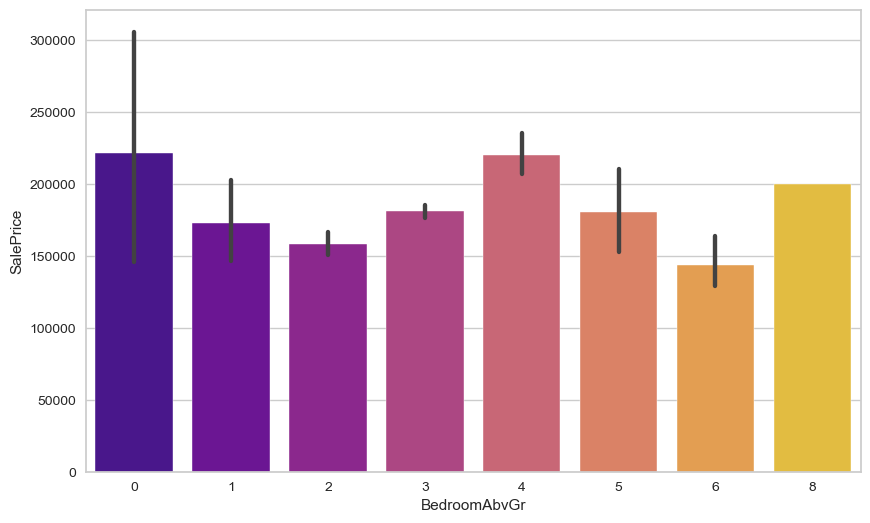

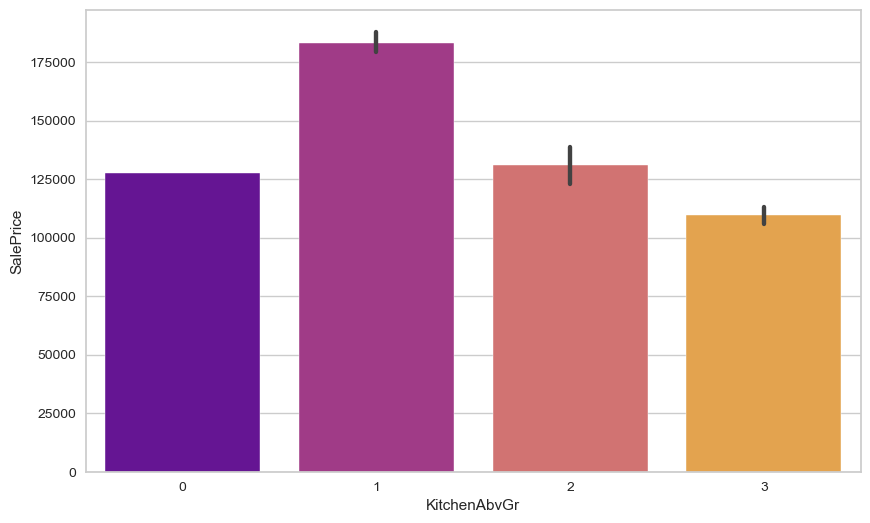

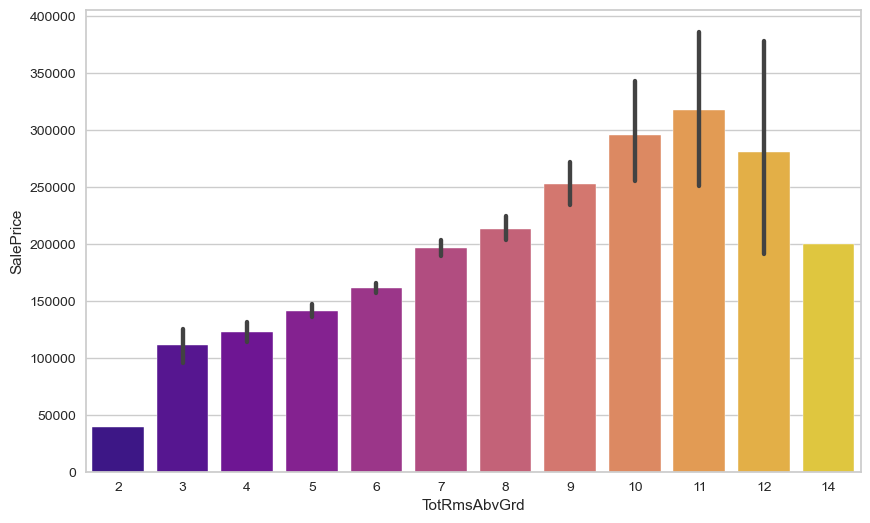

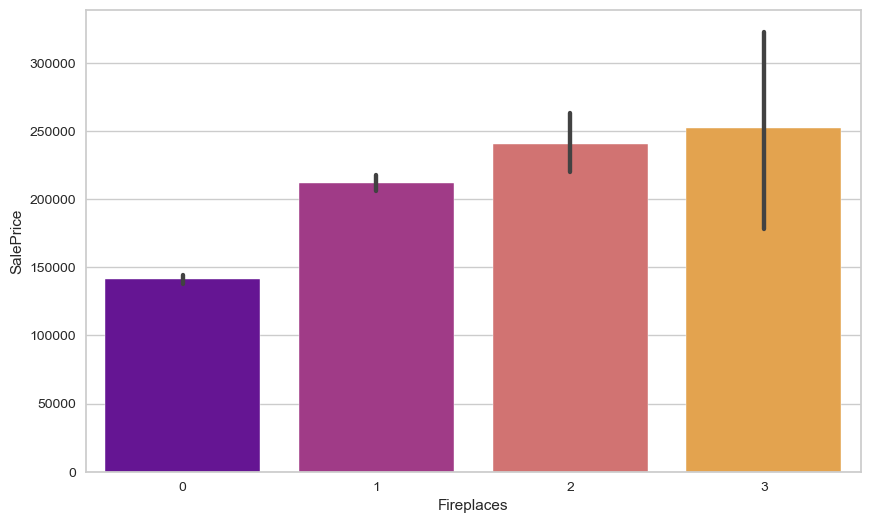

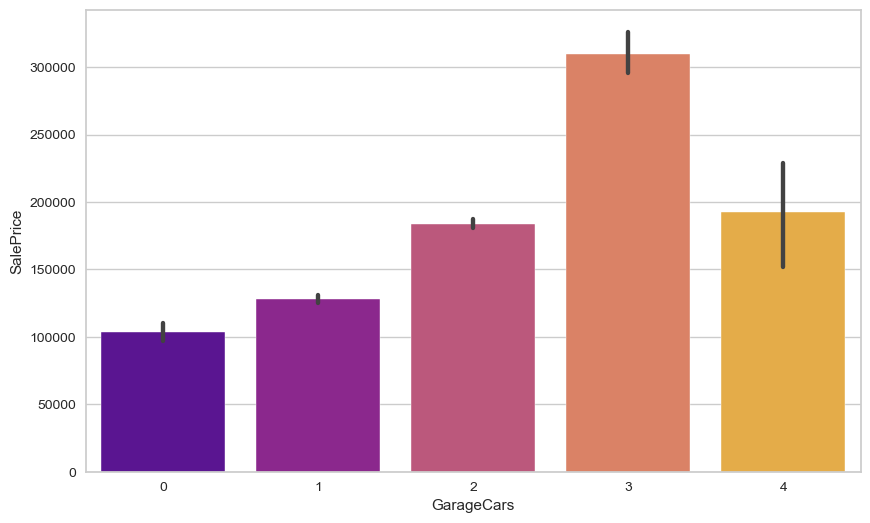

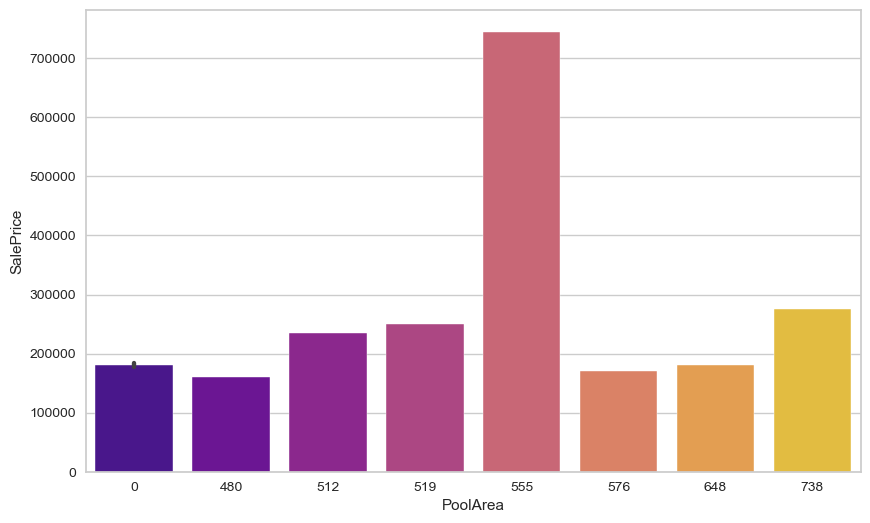

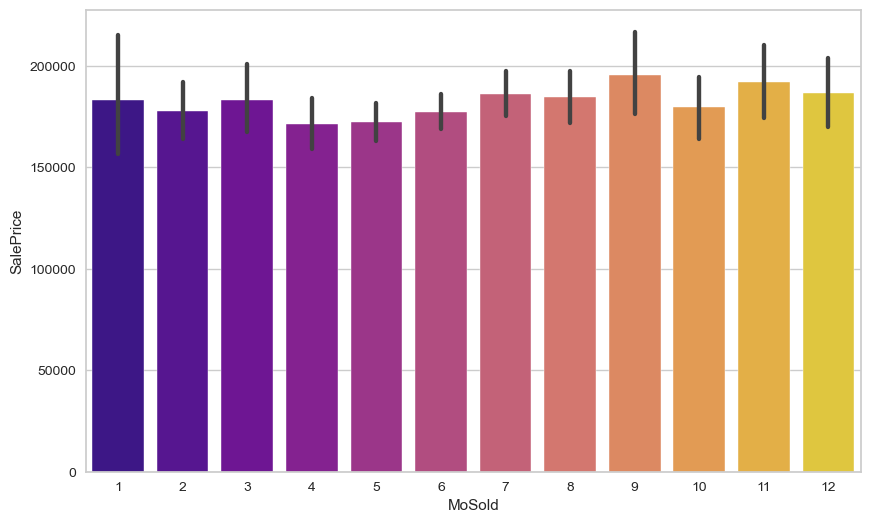

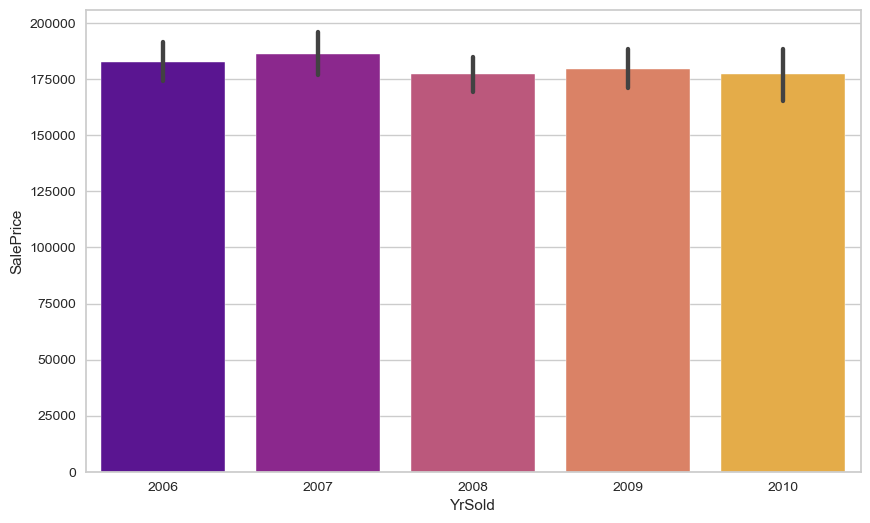

In [38]:
for descreat in desc_col:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=descreat, y='SalePrice', palette='plasma', data=df)

    plt.show()

In [39]:
for descreat in desc_col:
    group_df = df.groupby(descreat)['SalePrice'].median().reset_index()
    
    # Menampilkan hasil
    print(f"Average SalePrice by {descreat}:")
    print(group_df)
    print("\n")  # Menambahkan baris kosong untuk pemisah

Average SalePrice by MSSubClass:
    MSSubClass  SalePrice
0           20   159250.0
1           30    99900.0
2           40   142500.0
3           45   107500.0
4           50   132000.0
5           60   215200.0
6           70   156000.0
7           75   163500.0
8           80   166500.0
9           85   140750.0
10          90   135980.0
11         120   192000.0
12         160   146000.0
13         180    88500.0
14         190   128250.0


Average SalePrice by OverallQual:
   OverallQual  SalePrice
0            1    50150.0
1            2    60000.0
2            3    86250.0
3            4   108000.0
4            5   133000.0
5            6   160000.0
6            7   200141.0
7            8   269750.0
8            9   345000.0
9           10   432390.0


Average SalePrice by OverallCond:
   OverallCond  SalePrice
0            1    61000.0
1            2    85000.0
2            3    89500.0
3            4   115000.0
4            5   185000.0
5            6   142750.0
6          

In [40]:
anova_results = pd.DataFrame(columns=['Feature', 'F-Statistic', 'p-value', 'Significant'])


for col in desc_col:
    # Membuat model ANOVA
    model = ols(f'SalePrice ~ C({col})', data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    
    # Mengambil nilai F-Statistic dan p-value
    f_statistic = anova_table['F'][0]
    p_value = anova_table['PR(>F)'][0]
    
    # Tentukan apakah hasilnya signifikan berdasarkan p-value
    alpha = 0.05
    significant = 'Yes' if p_value < alpha else 'No'
    
    # Menyimpan hasil uji ke dalam dataframe
    anova_results = anova_results.append({
        'Feature': col,
        'F-Statistic': f_statistic,
        'p-value': p_value,
        'Significant': significant
    }, ignore_index=True)

# Menampilkan hasil uji ANOVA
print(anova_results)

         Feature  F-Statistic        p-value Significant
0     MSSubClass    33.732076   8.662166e-79         Yes
1    OverallQual   349.026840   0.000000e+00         Yes
2    OverallCond    26.003173   7.962289e-38         Yes
3   BsmtFullBath    27.448015   2.882436e-17         Yes
4   BsmtHalfBath     0.221461   8.013743e-01          No
5       FullBath   246.067004  3.802188e-129         Yes
6       HalfBath    74.469701   1.609145e-31         Yes
7   BedroomAbvGr    12.925413   3.304320e-16         Yes
8   KitchenAbvGr     9.835525   2.011735e-06         Yes
9   TotRmsAbvGrd    56.164238  1.191710e-103         Yes
10    Fireplaces   146.741176   4.421001e-83         Yes
11    GarageCars   351.207486  1.121129e-211         Yes
12      PoolArea     7.847318   2.341047e-09         Yes
13        MoSold     0.957865   4.833523e-01          No
14        YrSold     0.645525   6.300888e-01          No


- drop : YrSold, MoSold, BsmtHalfBath

#### SUMMARY

- OverQuall dan Overcond tampak dapat menjadi kandidat fitur yang baik untuk pemodelan


#### Continuous variable analysis

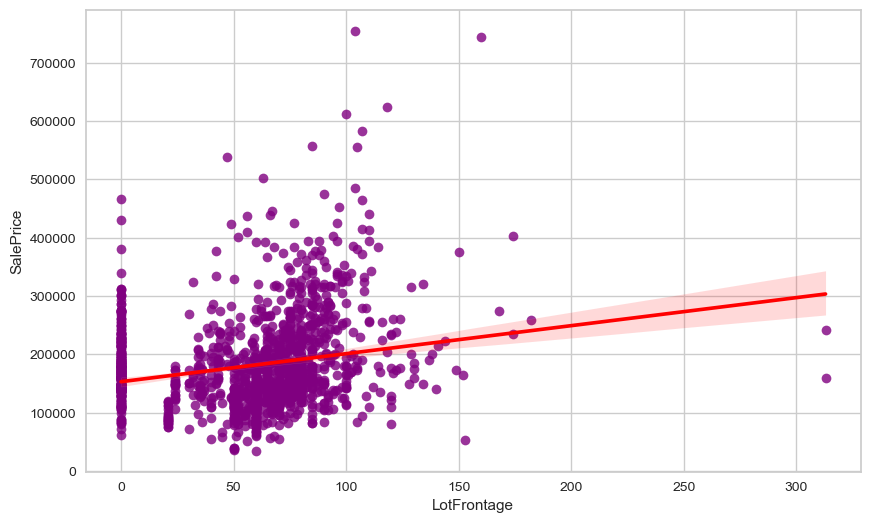

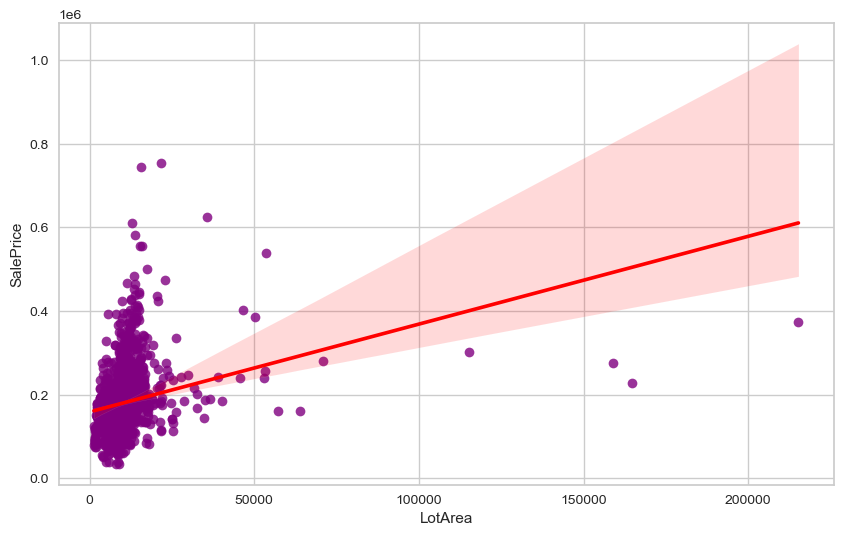

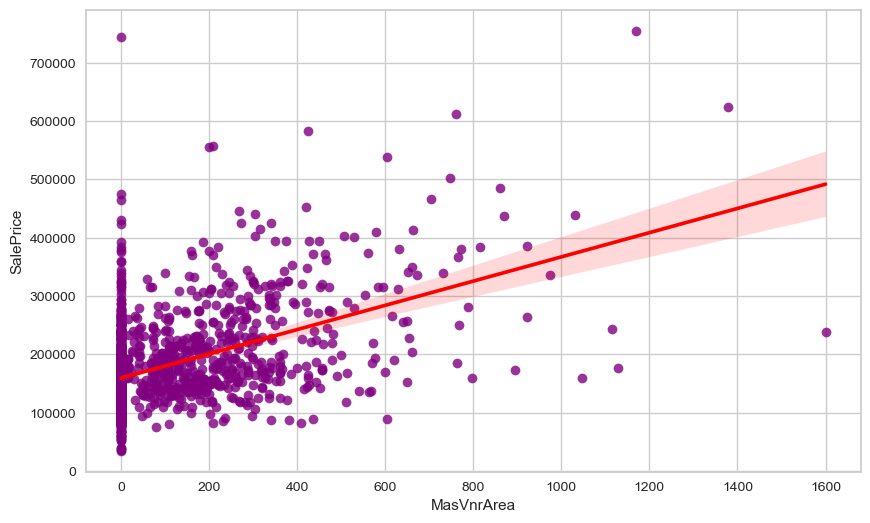

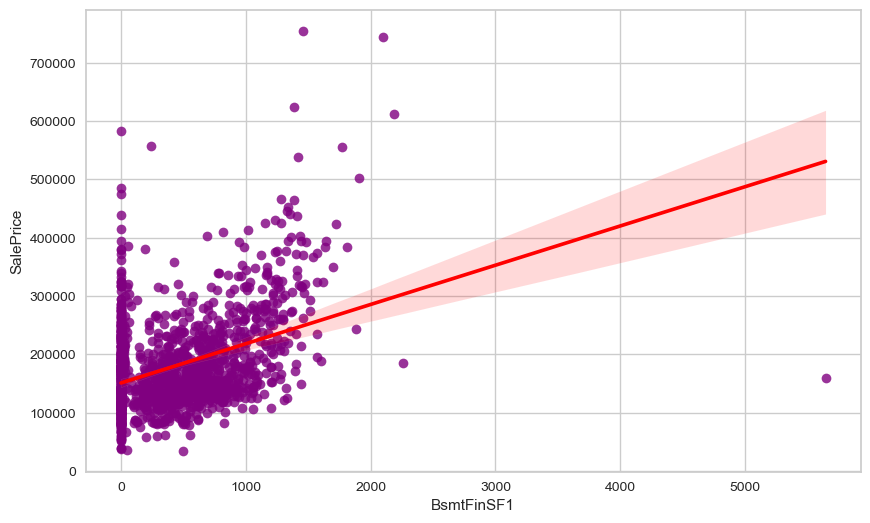

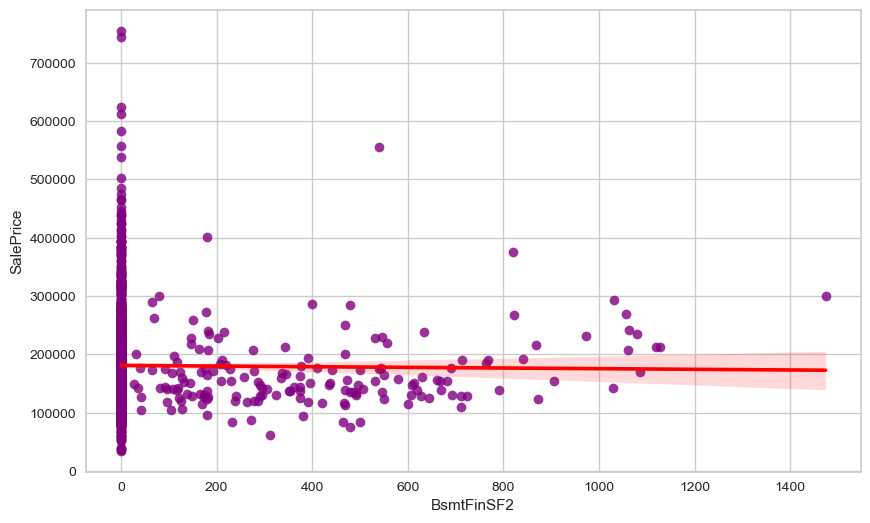

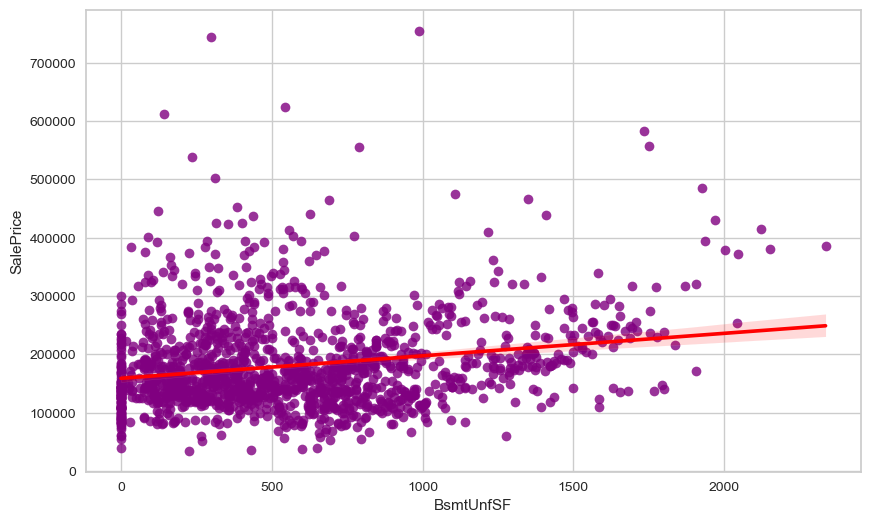

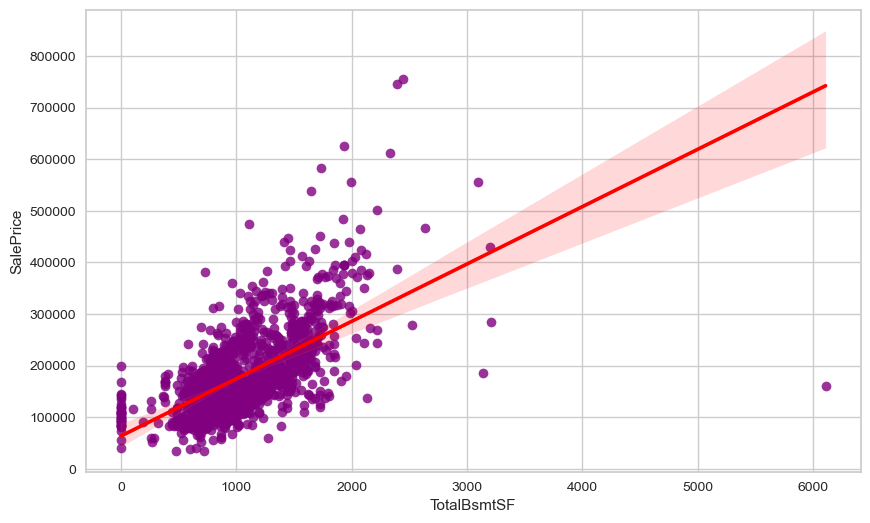

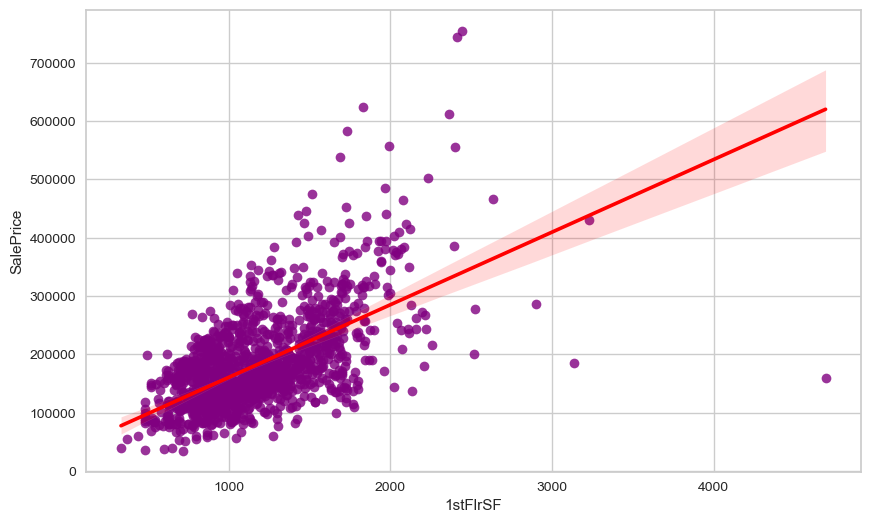

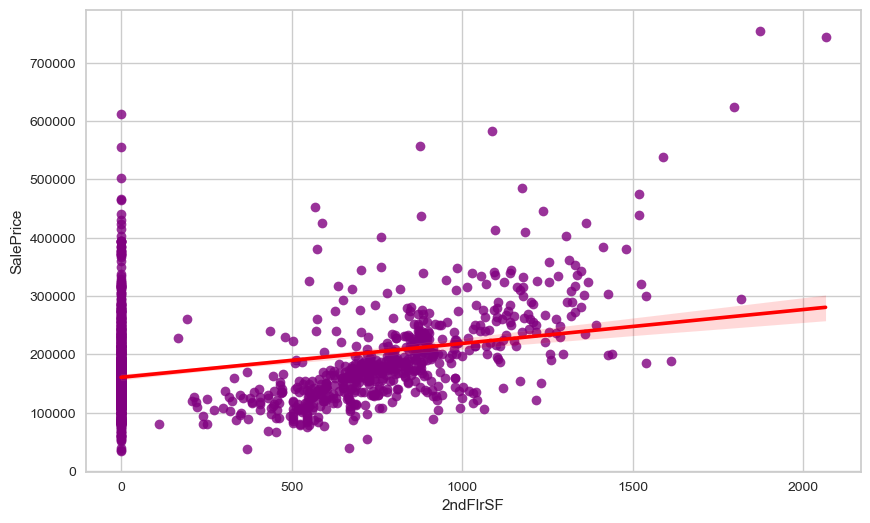

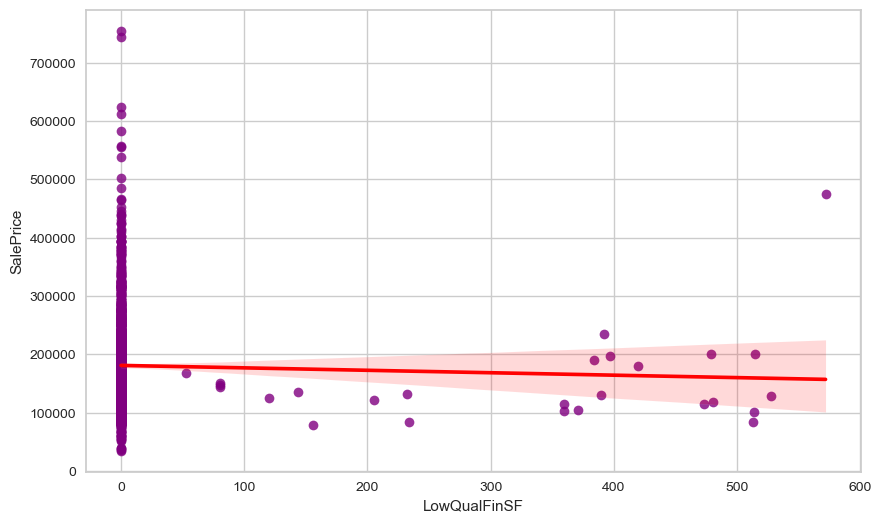

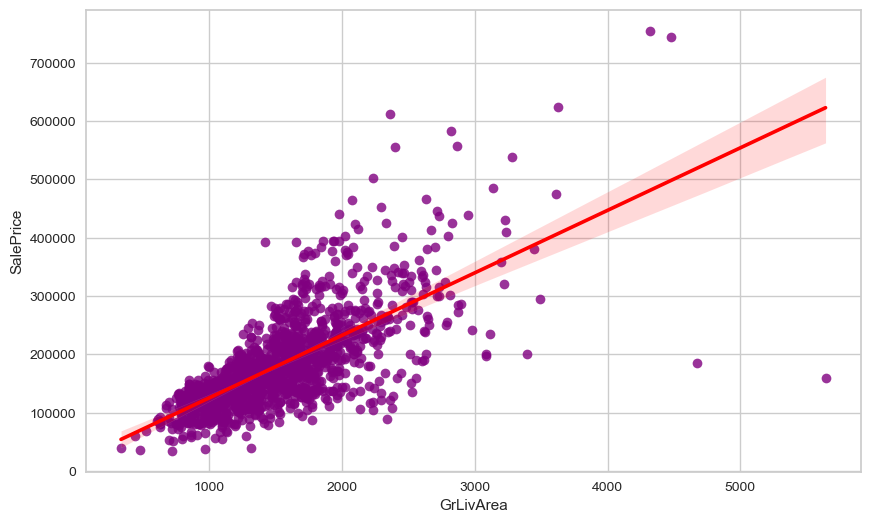

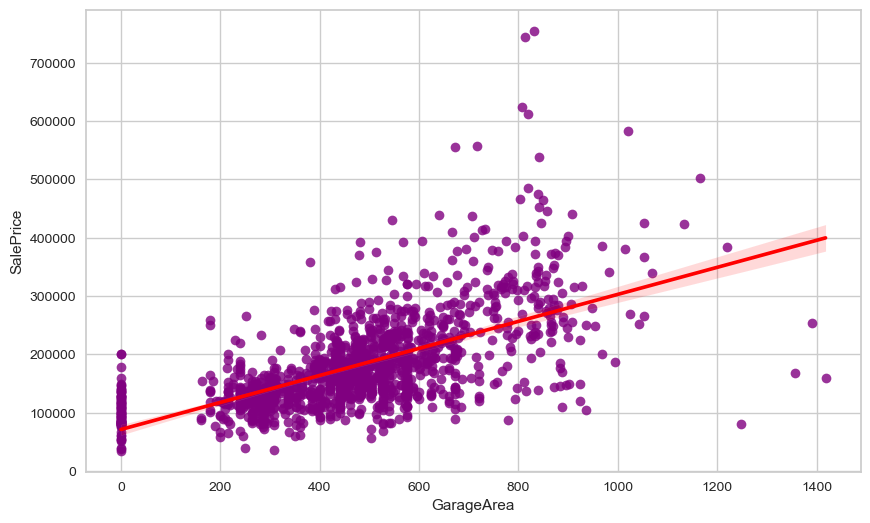

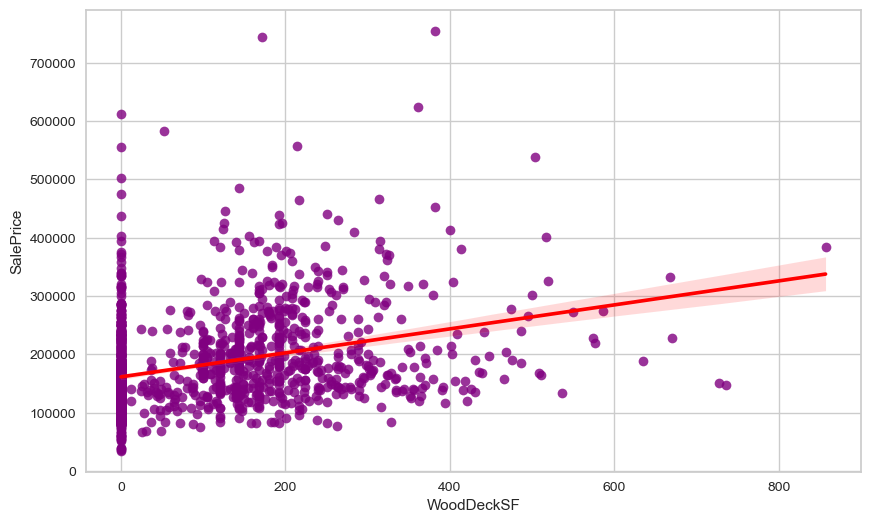

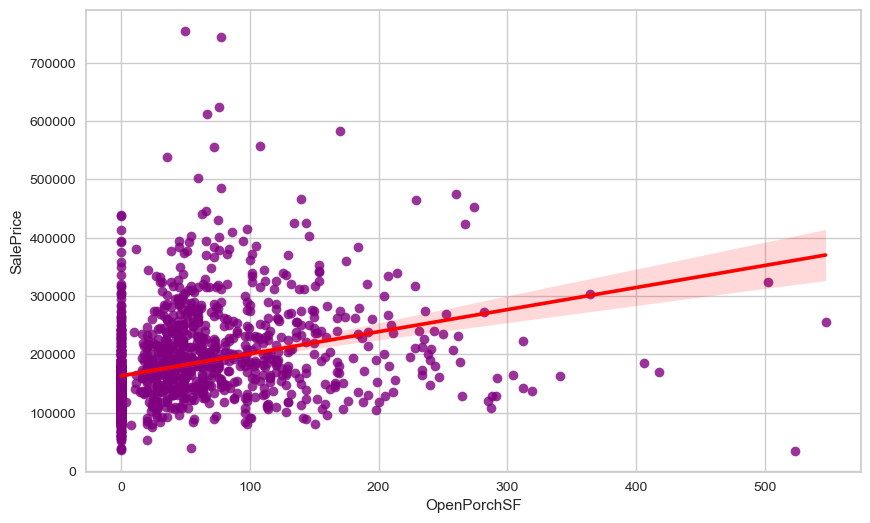

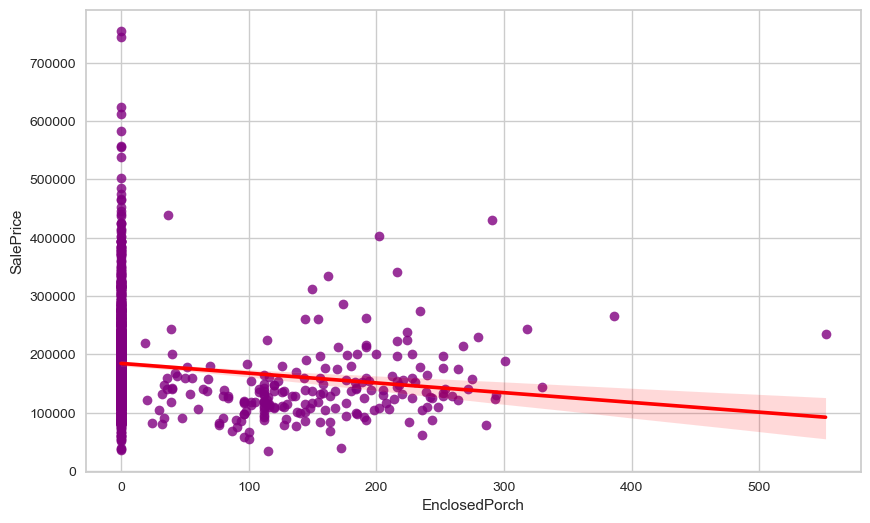

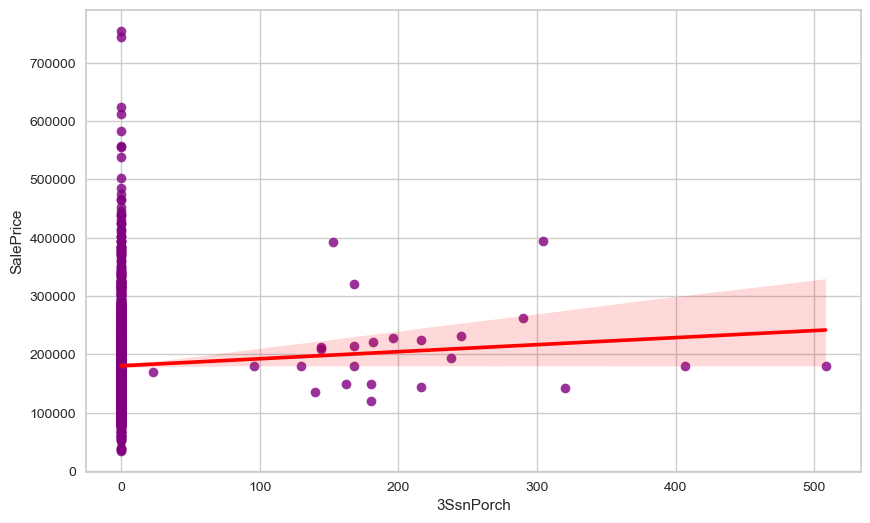

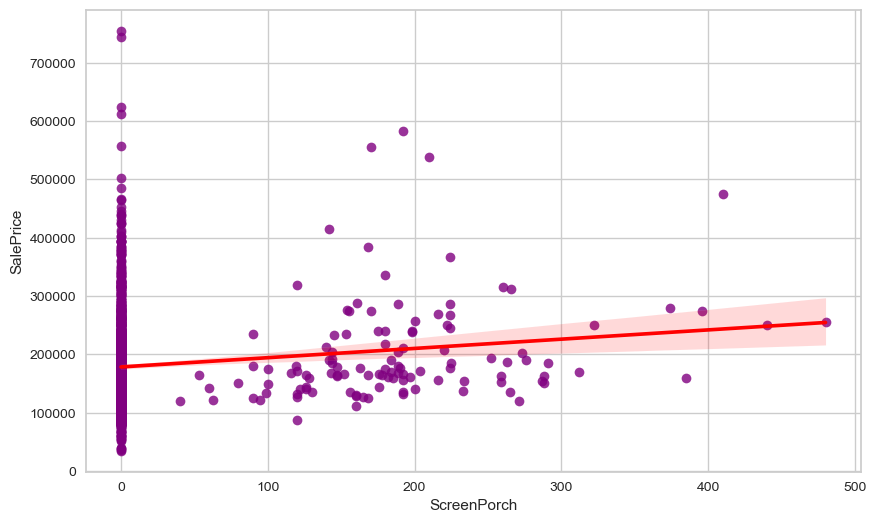

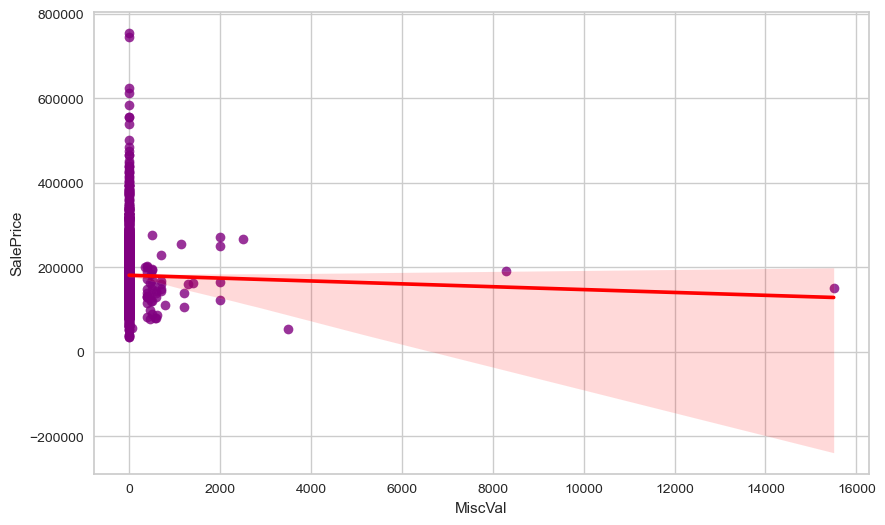

In [41]:
for continues in cont_col:
    plt.figure(figsize=(10, 6))
    sns.regplot(data=df,x=continues, y='SalePrice', line_kws={'color': 'red'}, color='purple')
    
    plt.show()

Semua variabel continious memiliki korelasi yang kuat terhadap SalePrice

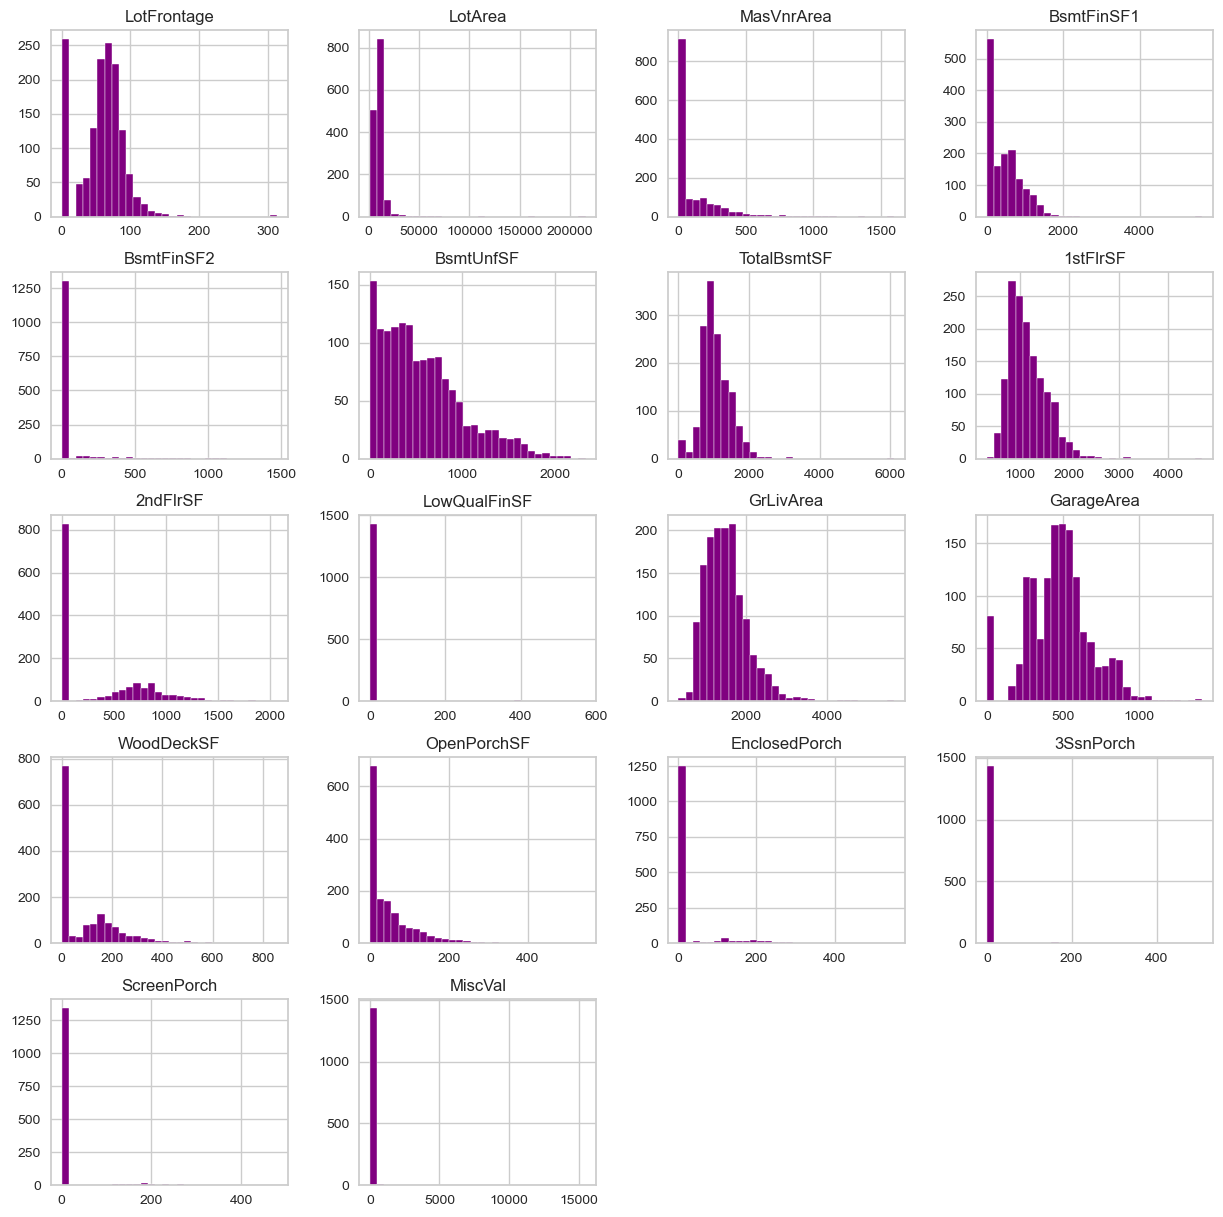

In [42]:
# Distributrion 
df[cont_col].hist(bins=30, color='purple', figsize=(15,15))
plt.show()

In [43]:
cont_col

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal']

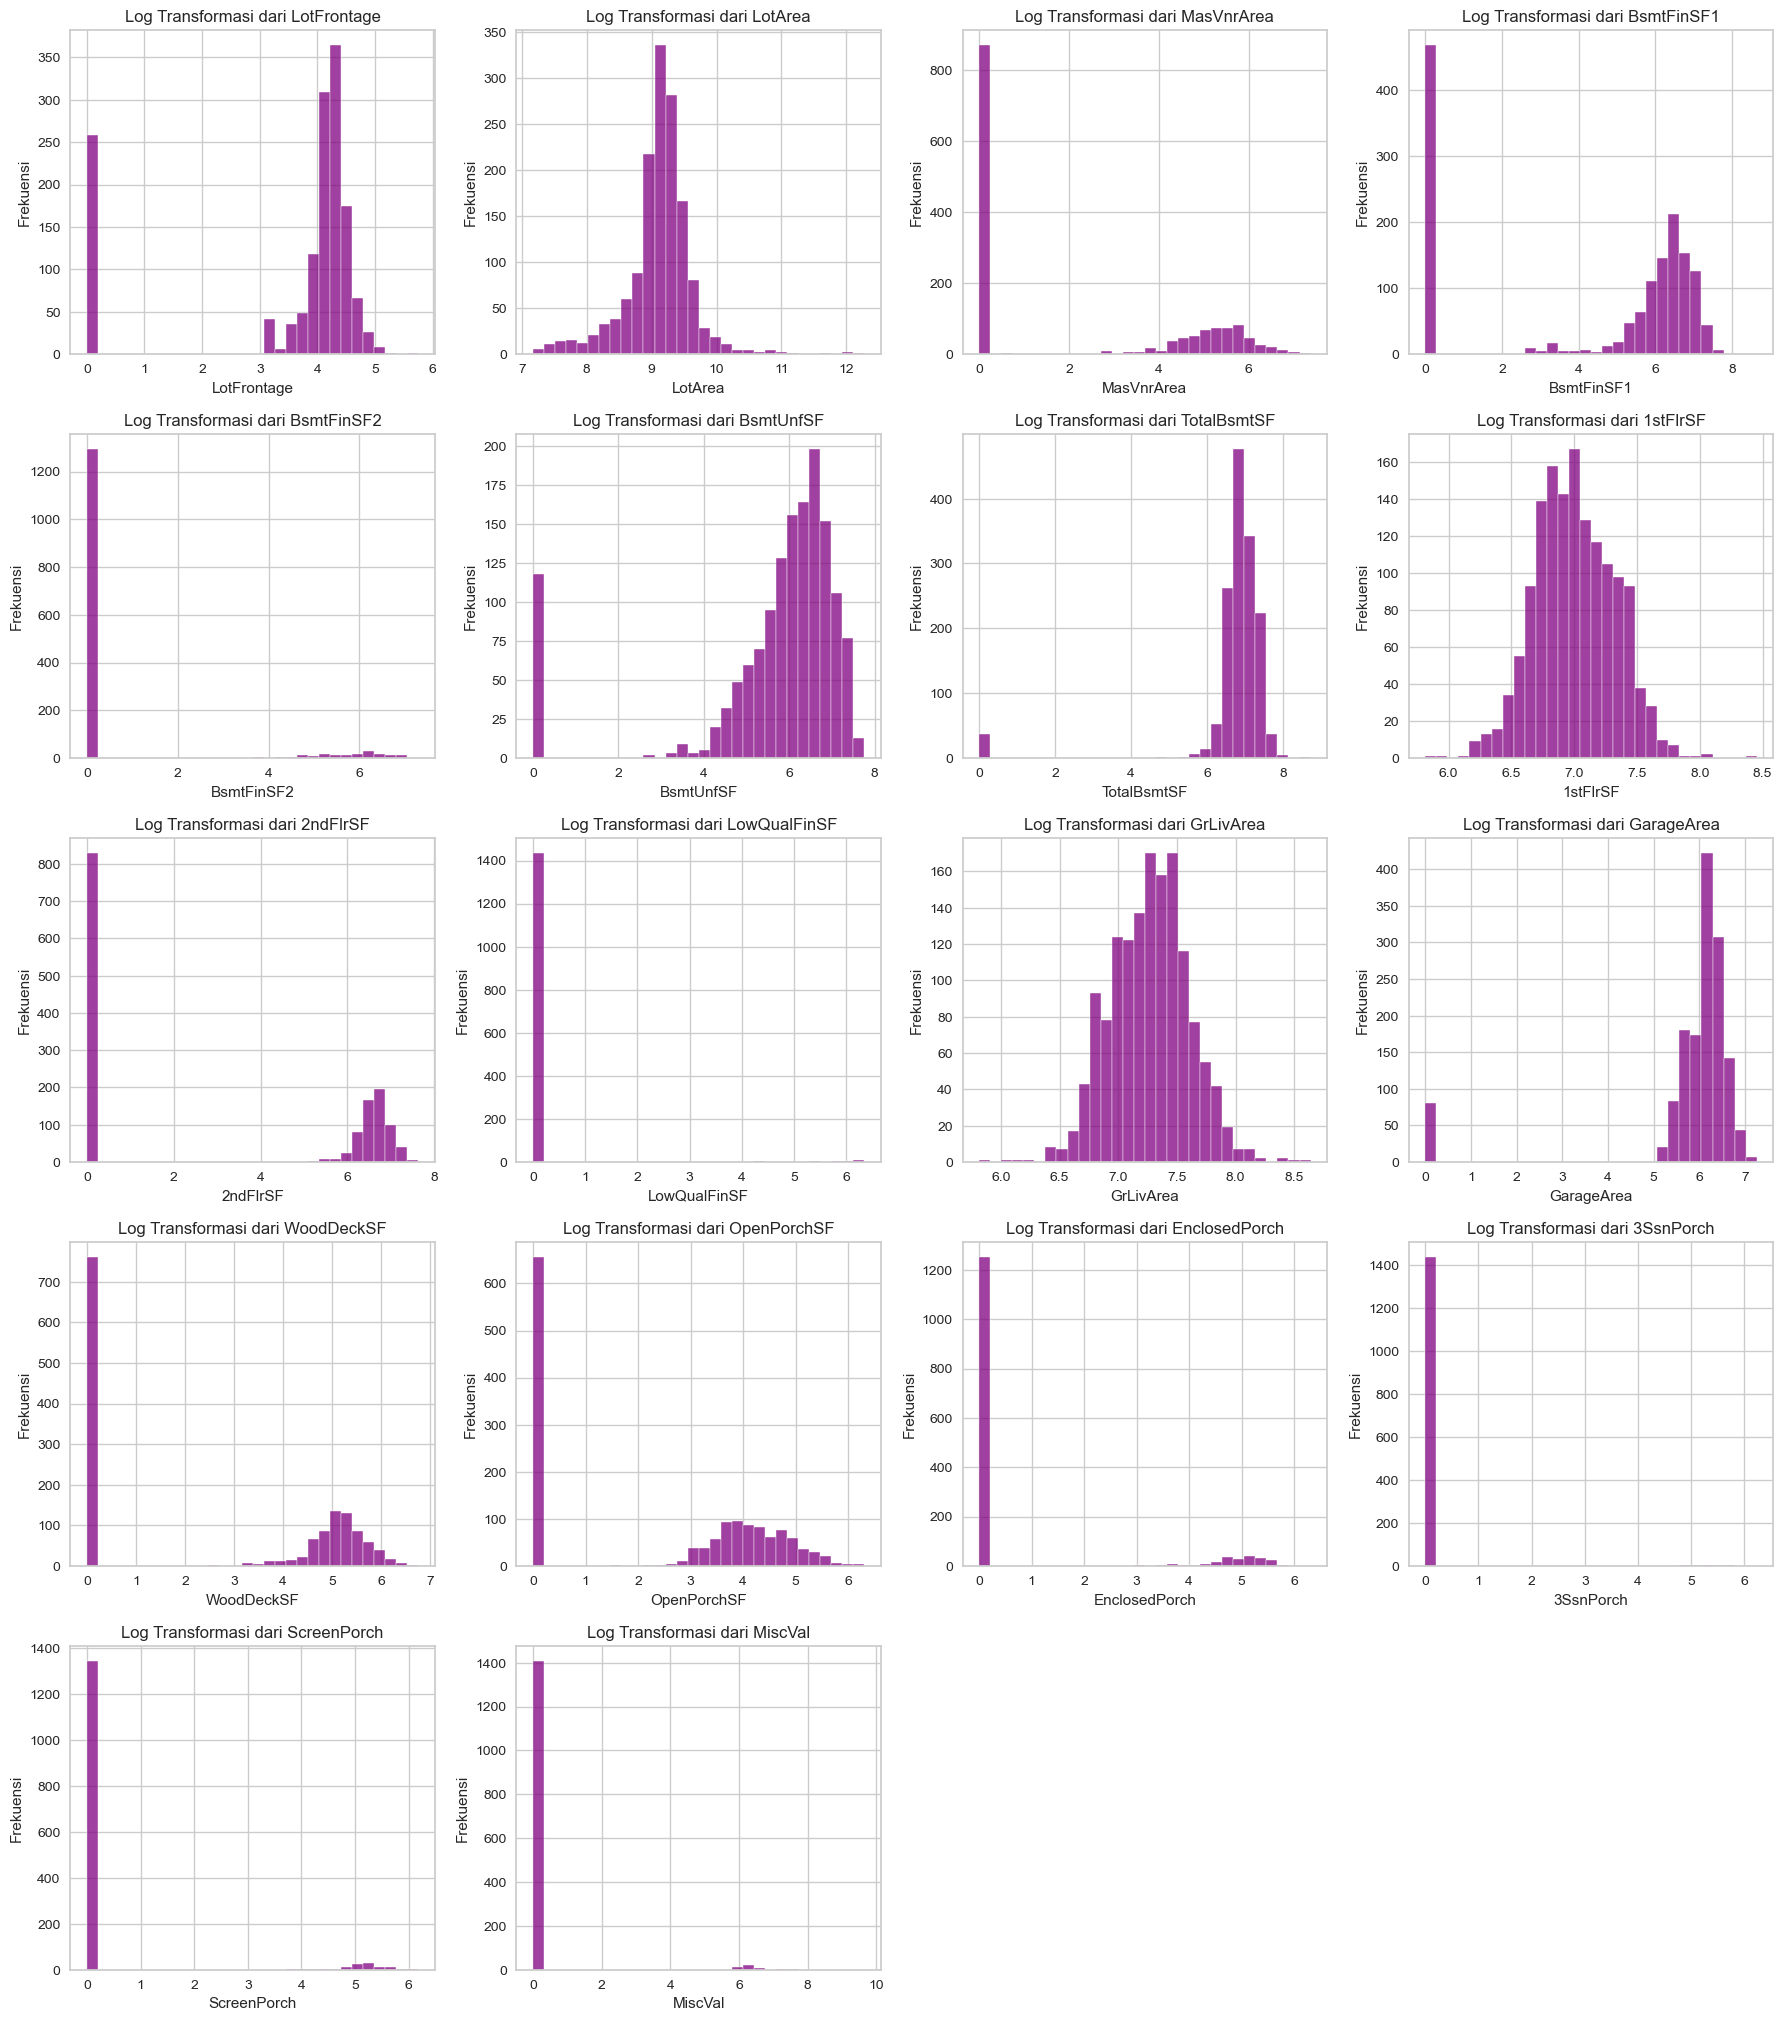

In [44]:
plt.figure(figsize=(18, 24))
plt.subplots_adjust(hspace=0.5)

# Membuat subplot secara manual tanpa enumerate
for i in range(len(cont_col)):
    plt.subplot(6, 4, i + 1)
    
    # Menghindari log(0) dengan menambahkan 1 ke setiap nilai
    log_data = np.log1p(df[cont_col[i]])
    
    sns.histplot(log_data, kde=False, color='purple', bins=30)
    plt.title(f'Log Transformasi dari {cont_col[i]}')
    plt.xlabel(cont_col[i])
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

Dengan menggunaakan transformasi logartimik pada kolom dengan nilai continuous, rata-rata kolom hampir berdistribusi normal

#### Categorical variabel analysis

<Axes: >

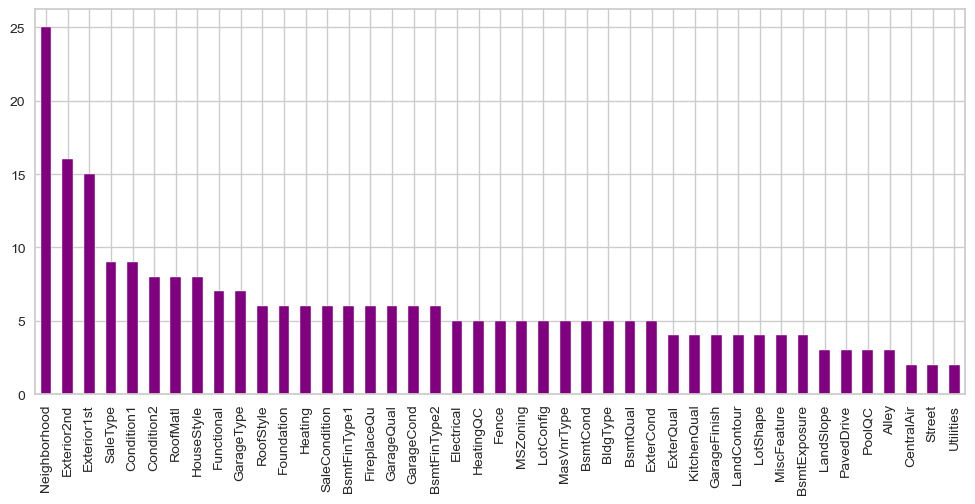

In [45]:
cat_cols.nunique().sort_values(ascending=False).plot(kind='bar', color='purple', figsize=(12,5))

In [46]:
pd.DataFrame(df.isnull().sum().sort_values(ascending=False)).head(20)

0
PoolQC           1453
MiscFeature      1406
GarageYrBlt        81
TimeGarageYrBlt    81
BsmtFullBath        0
TotRmsAbvGrd        0
GarageFinish        0
LowQualFinSF        0
GarageType          0
FireplaceQu         0
Fireplaces          0
Functional          0
GrLivArea           0
BsmtHalfBath        0
KitchenQual         0
GarageArea          0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0

### Category variable analysis

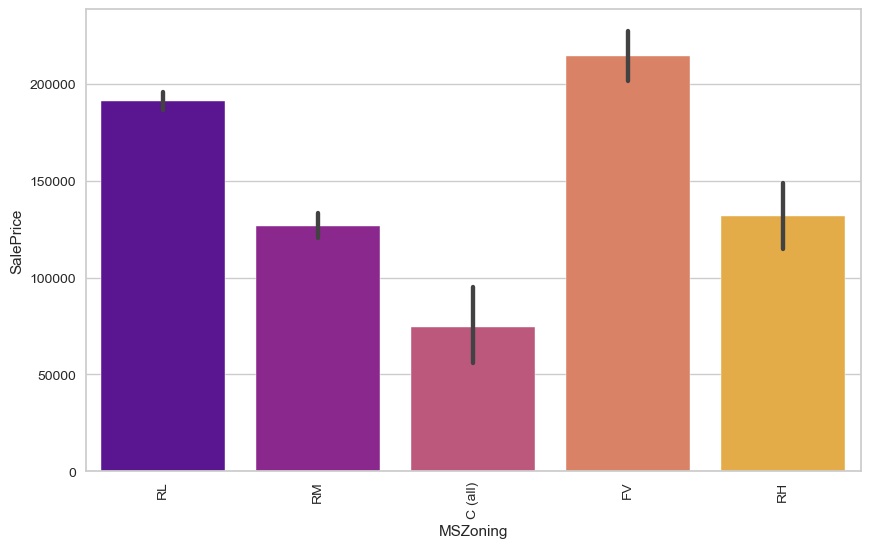

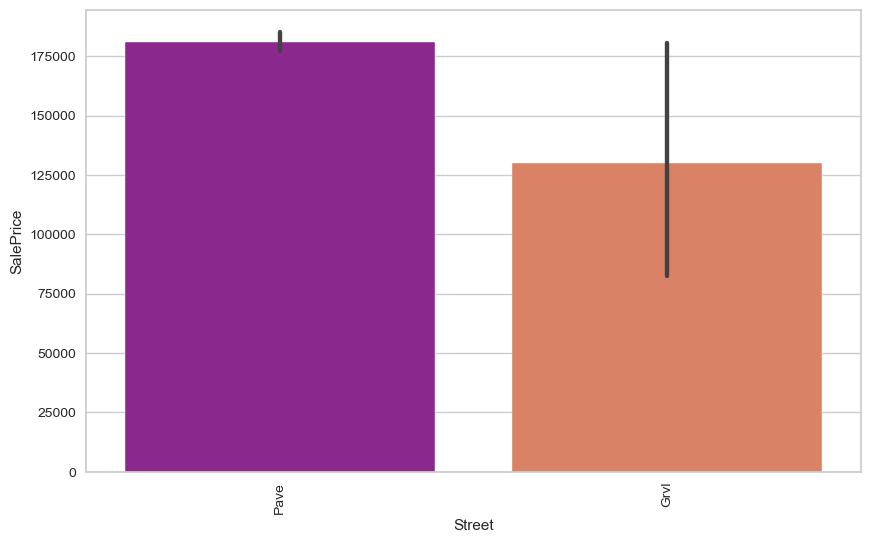

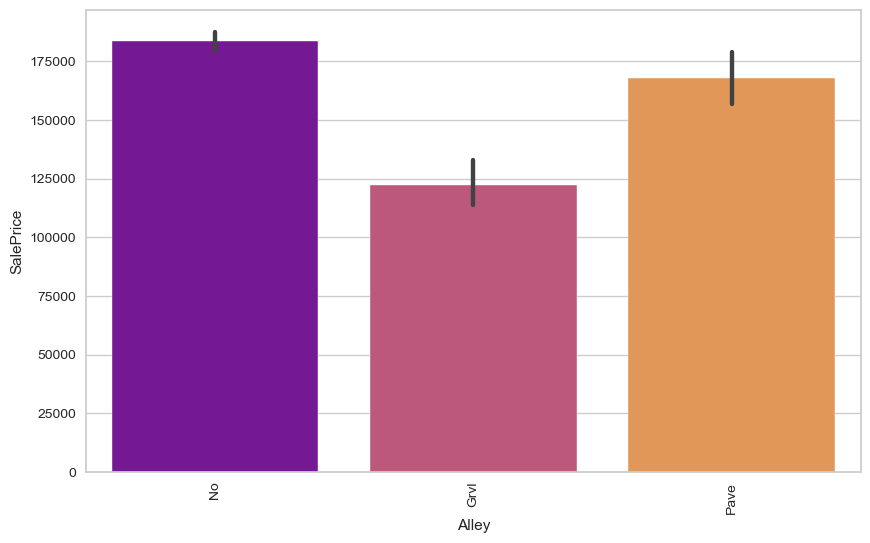

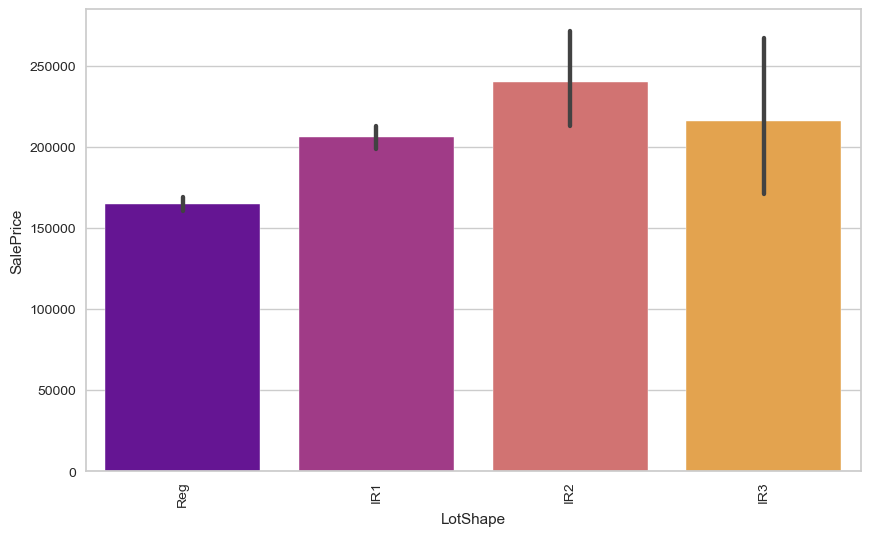

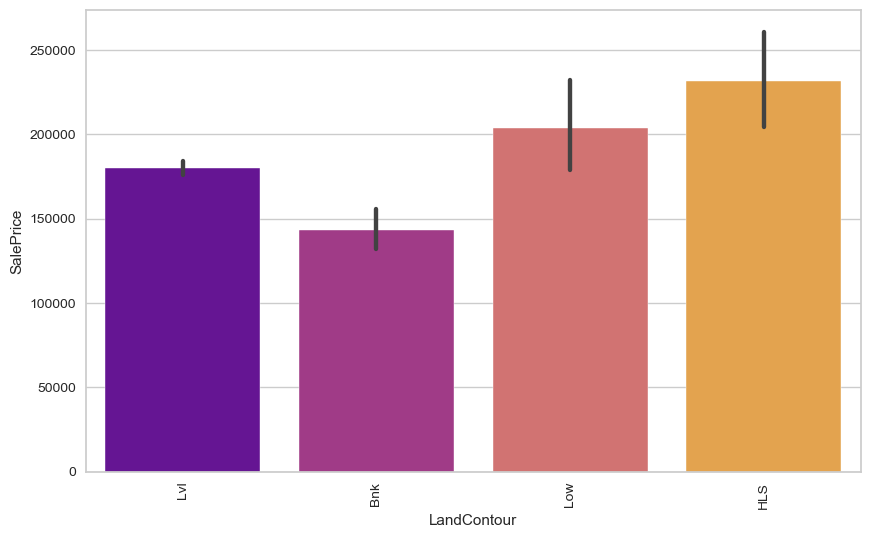

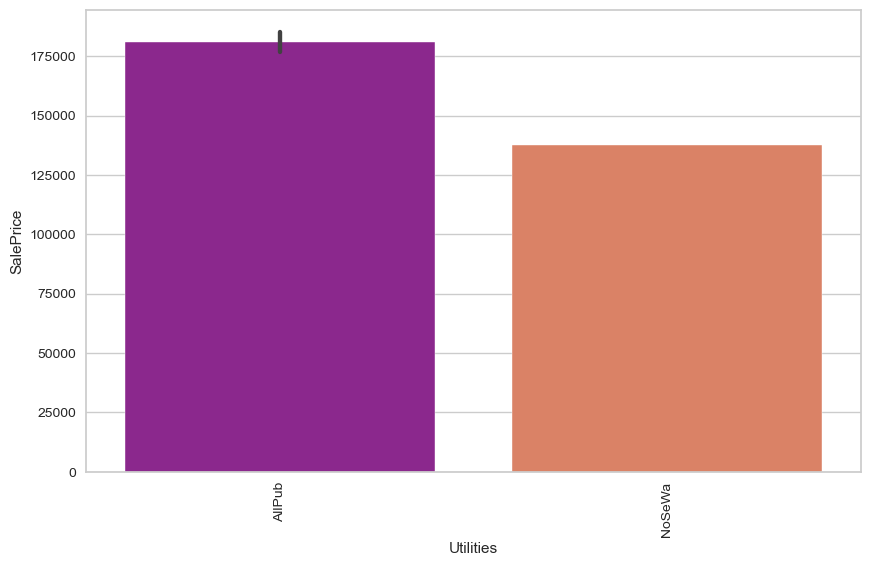

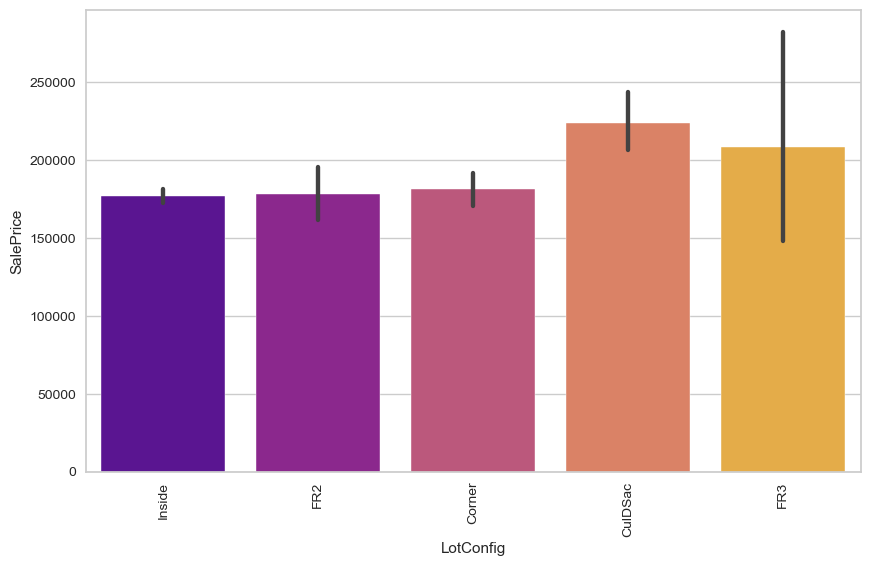

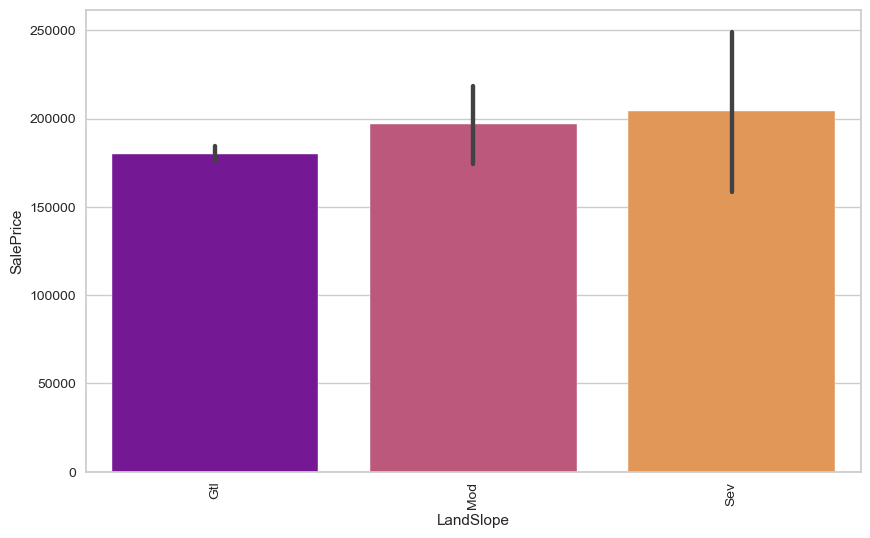

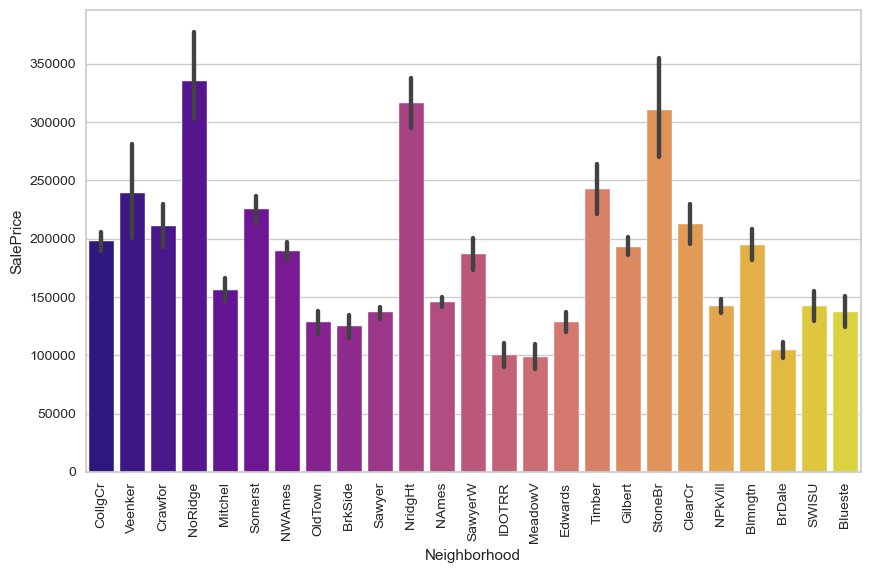

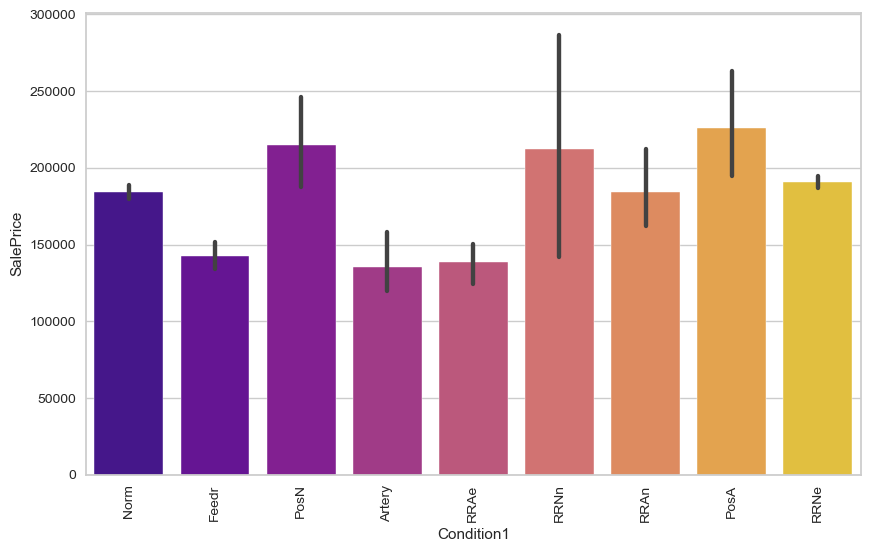

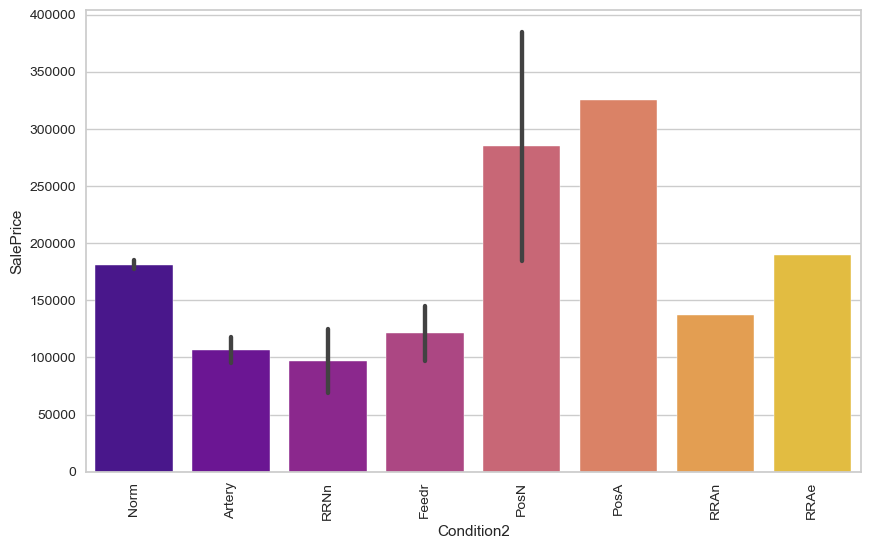

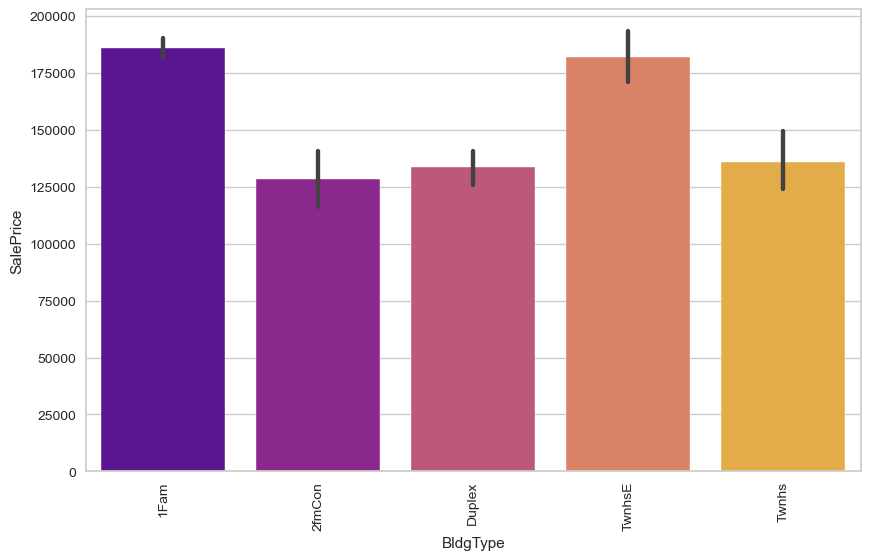

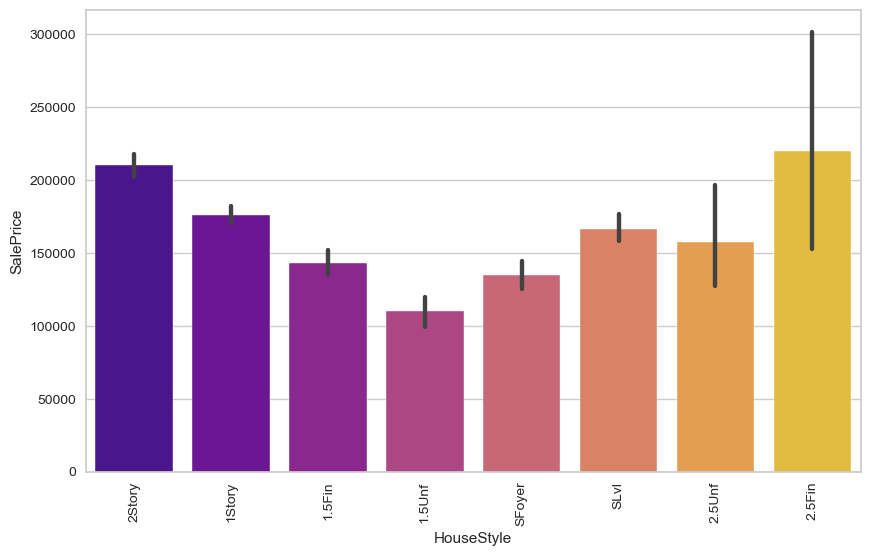

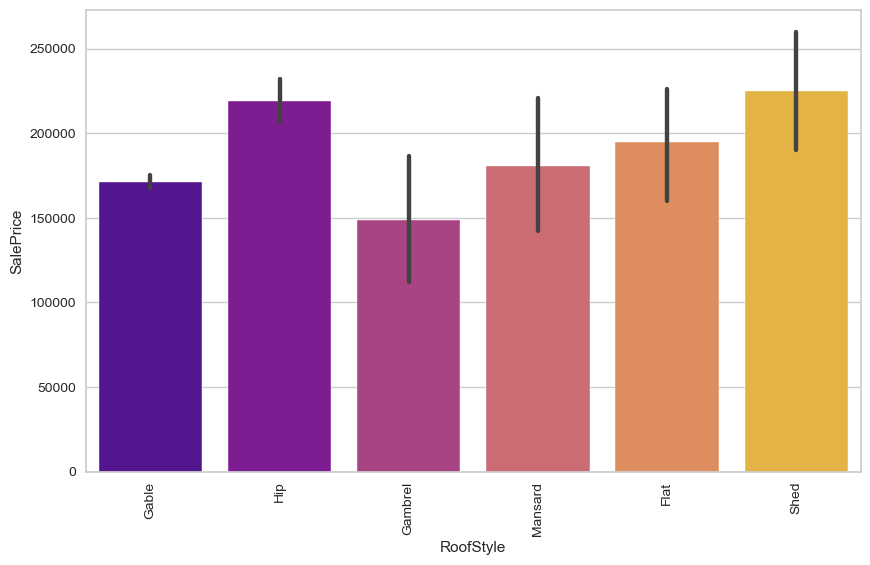

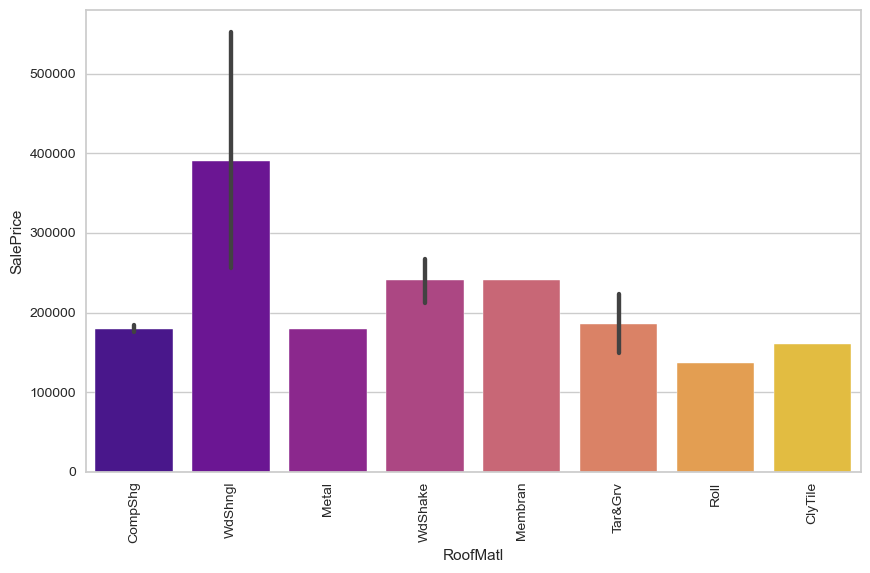

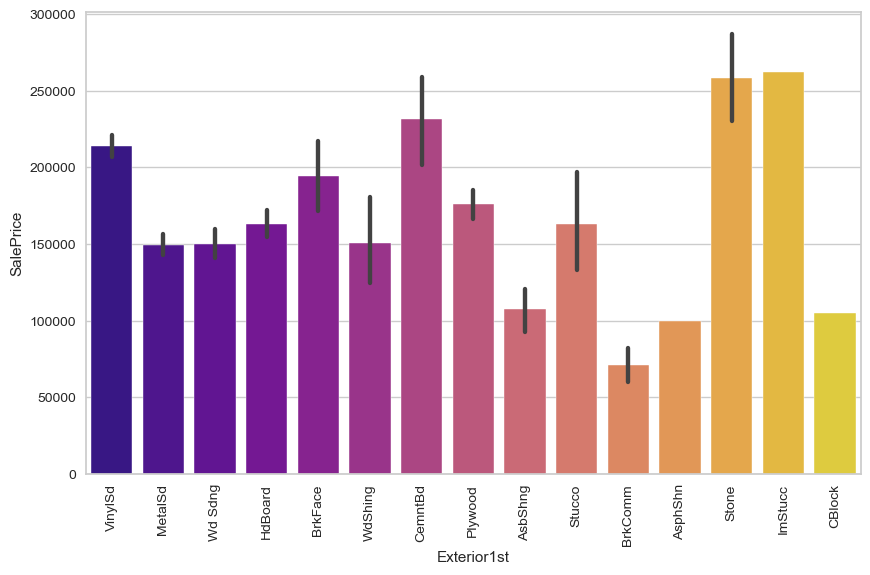

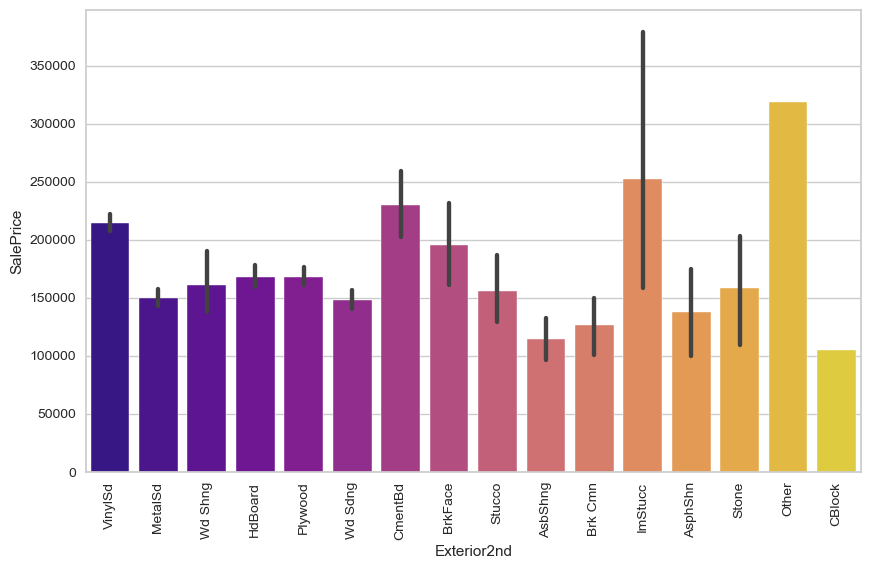

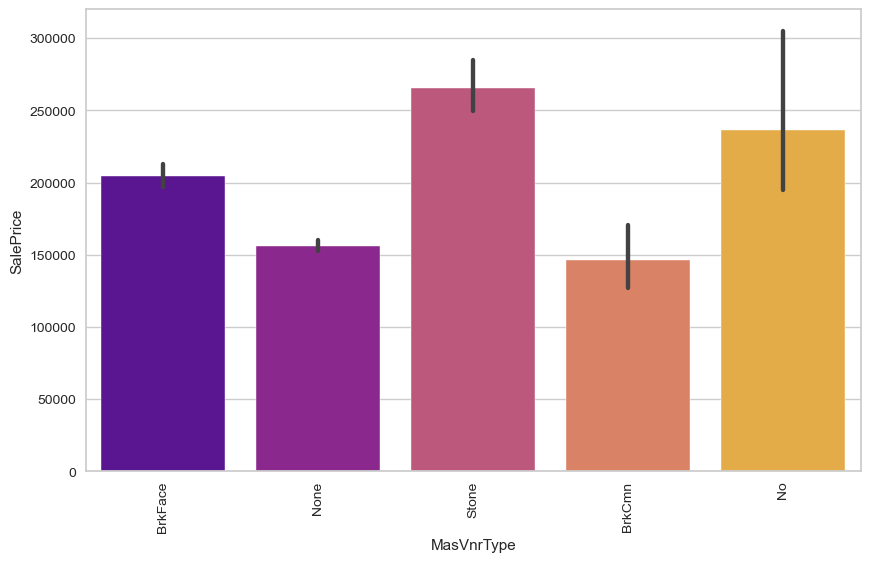

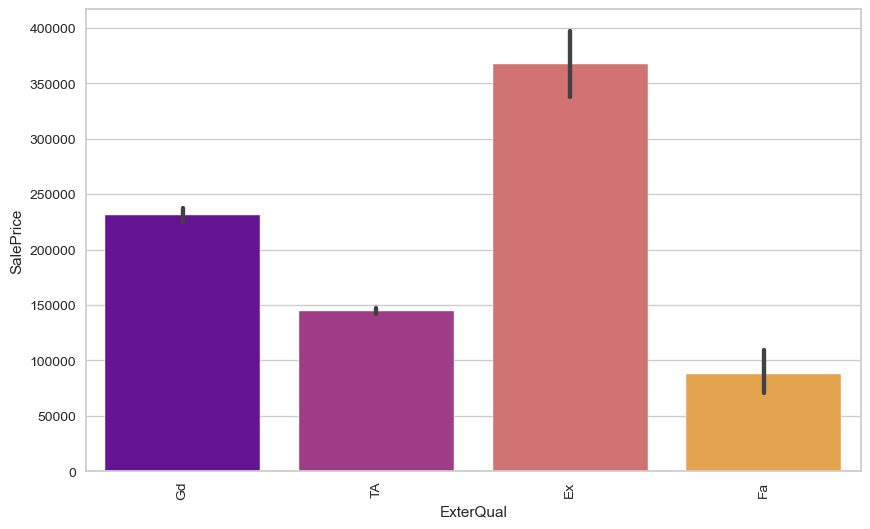

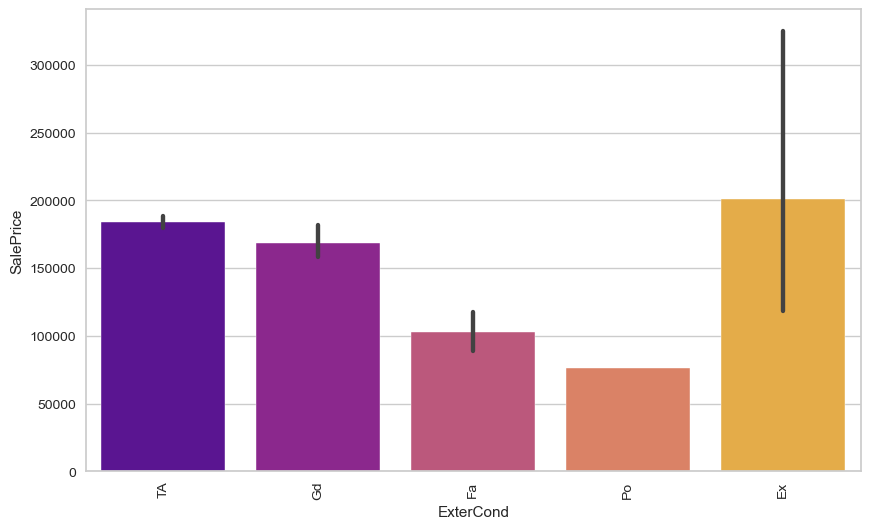

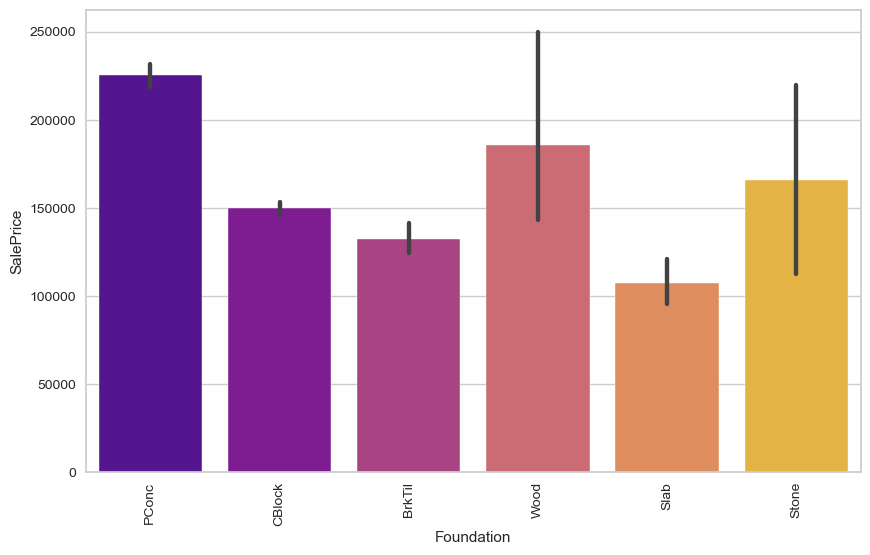

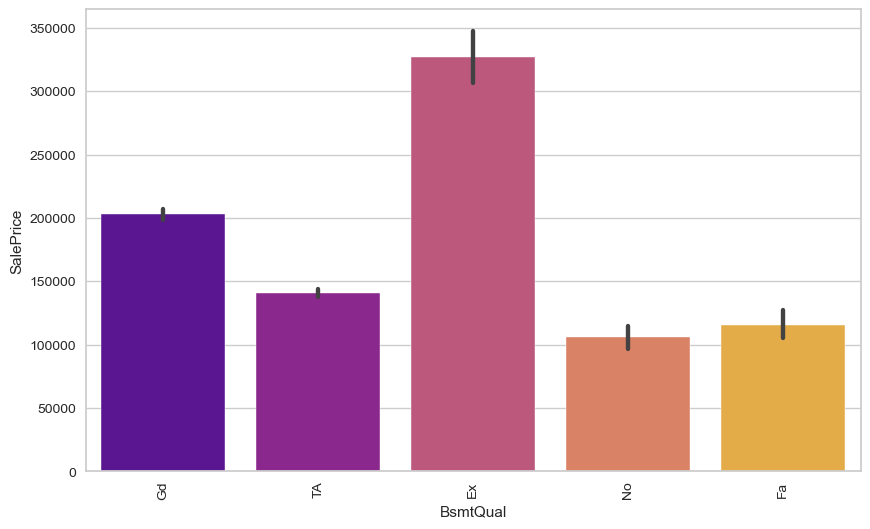

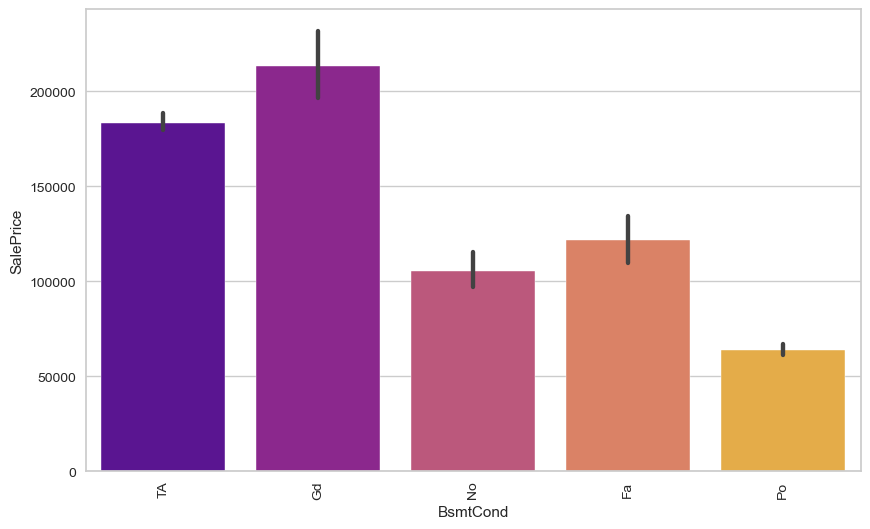

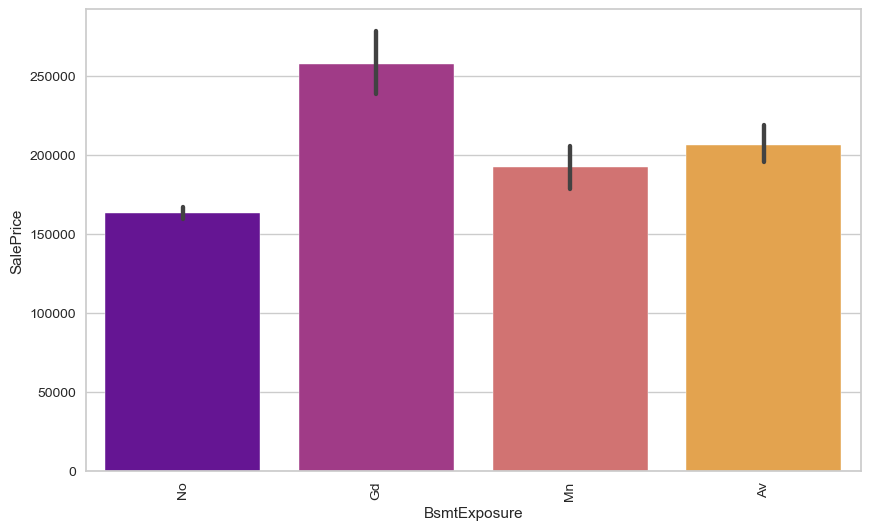

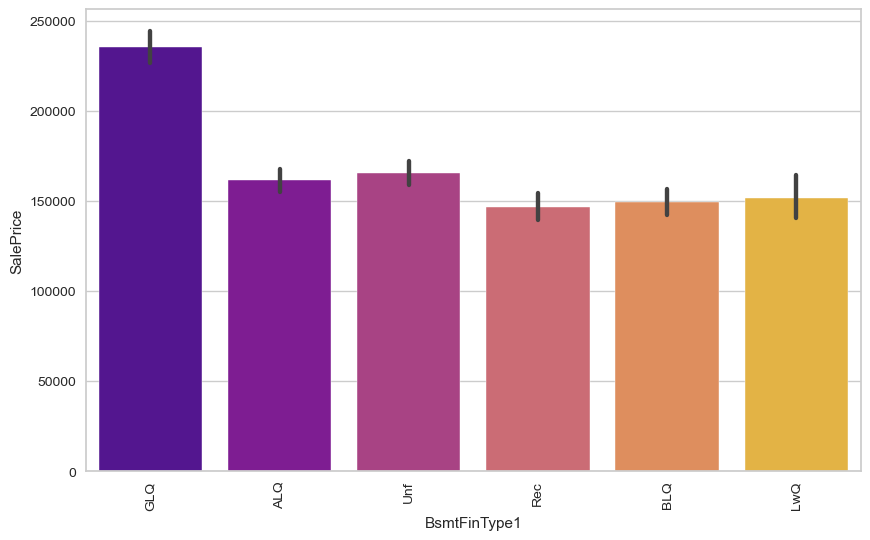

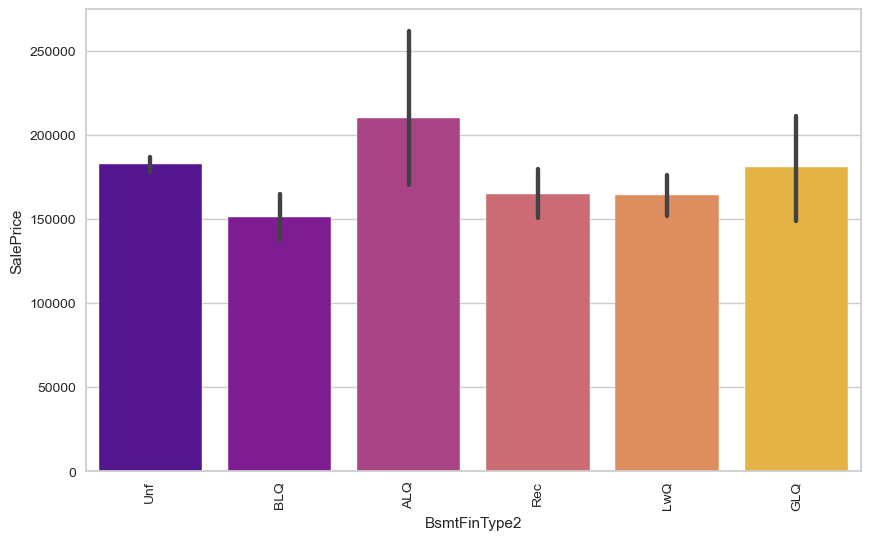

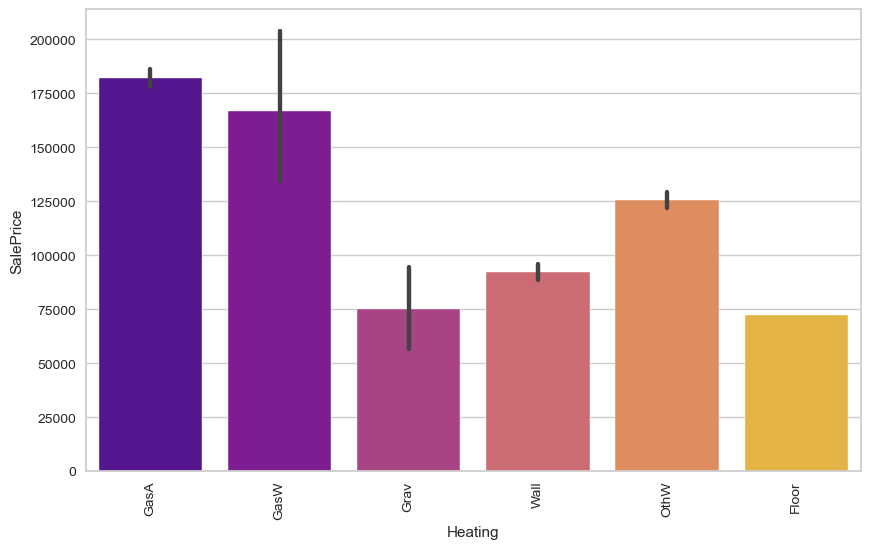

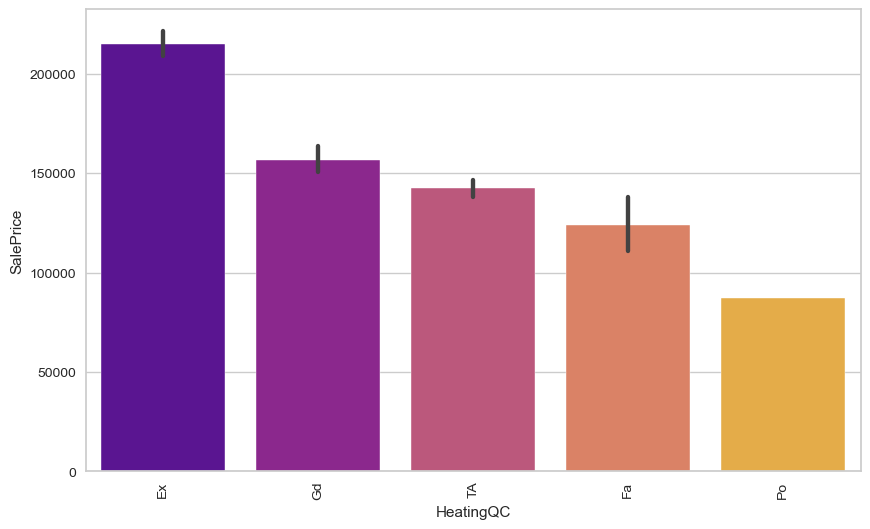

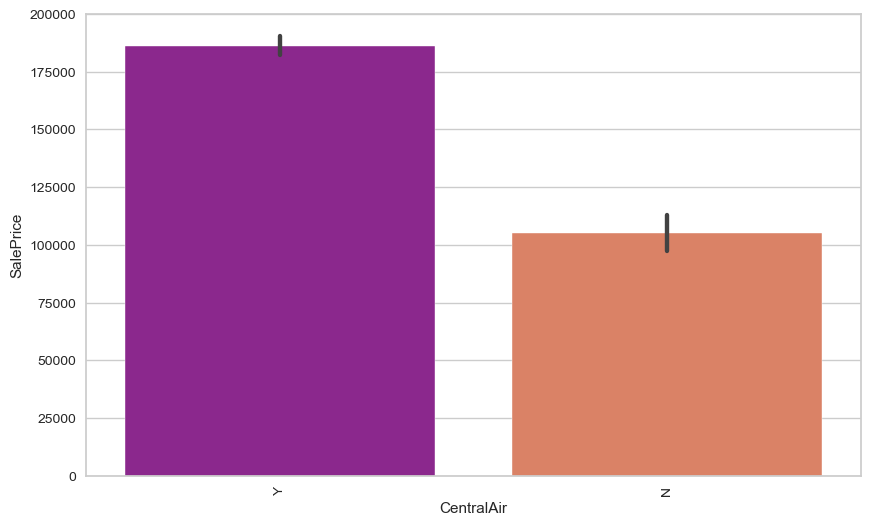

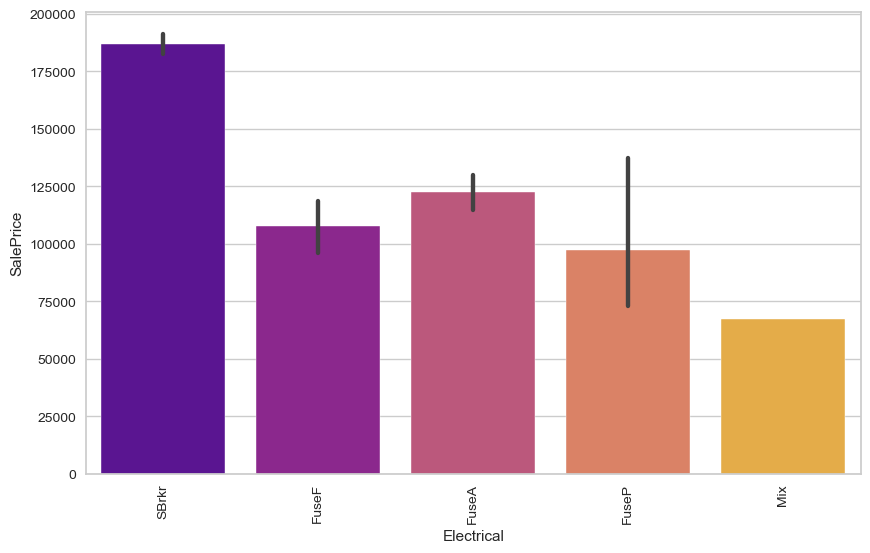

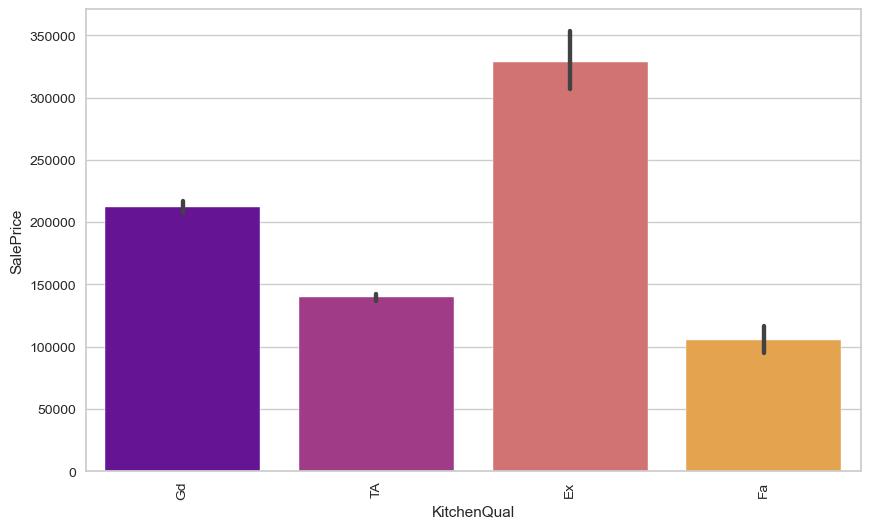

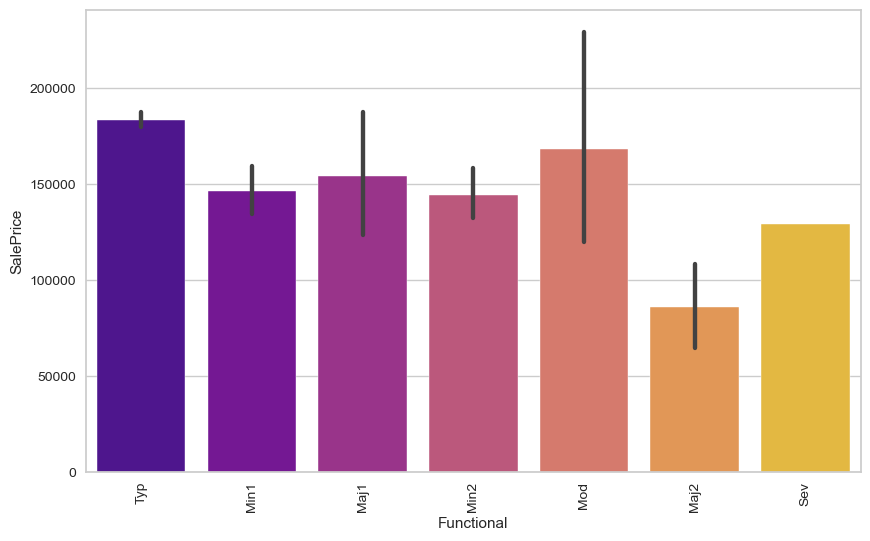

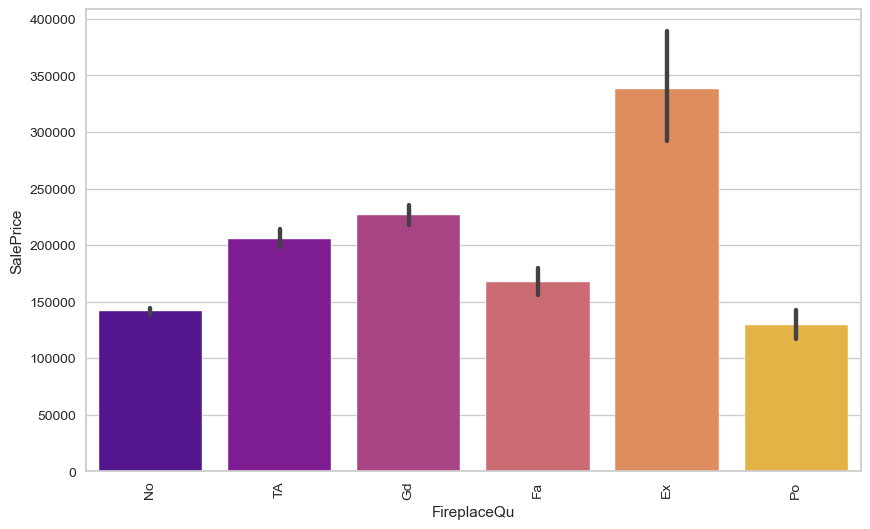

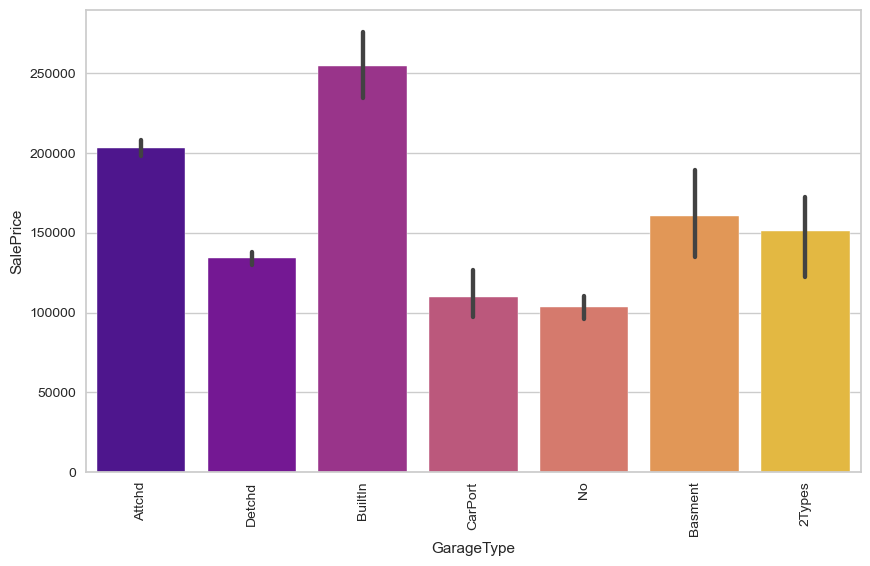

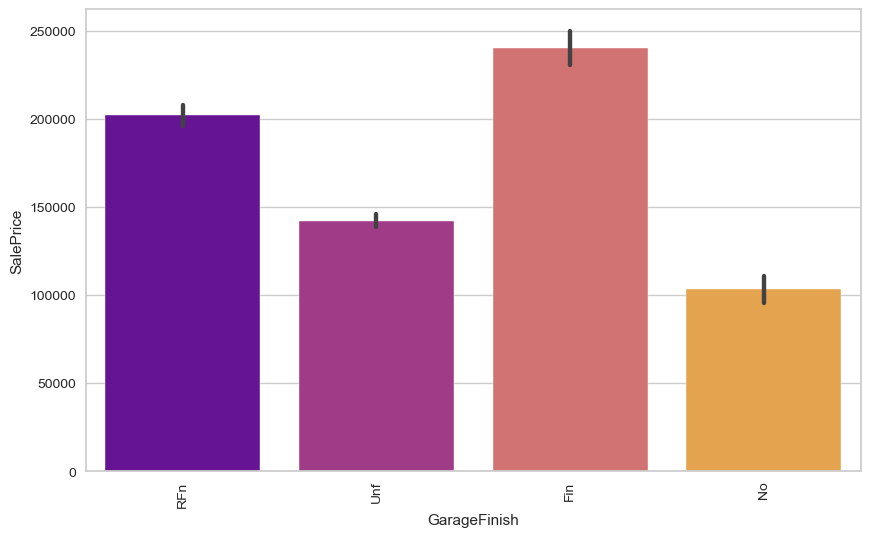

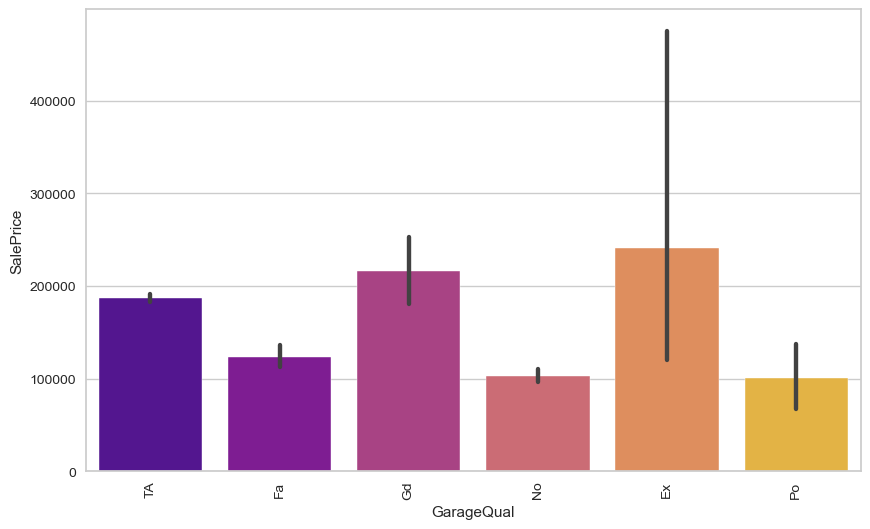

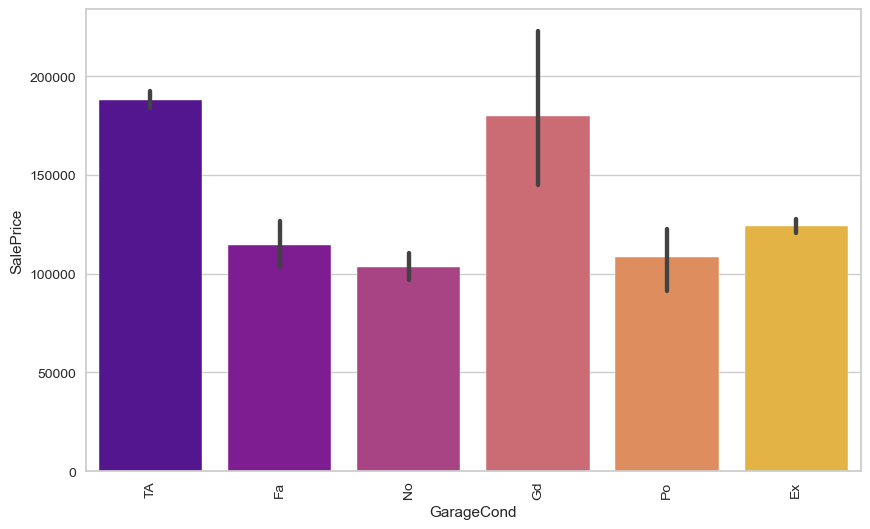

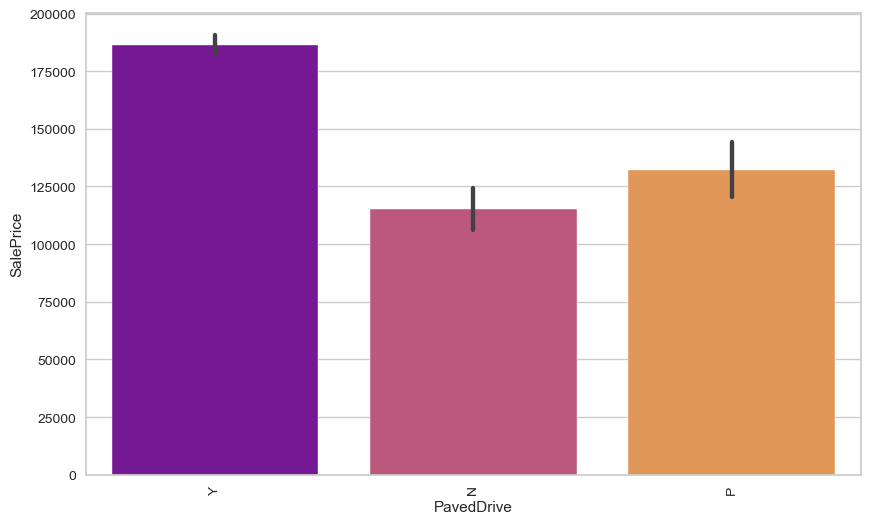

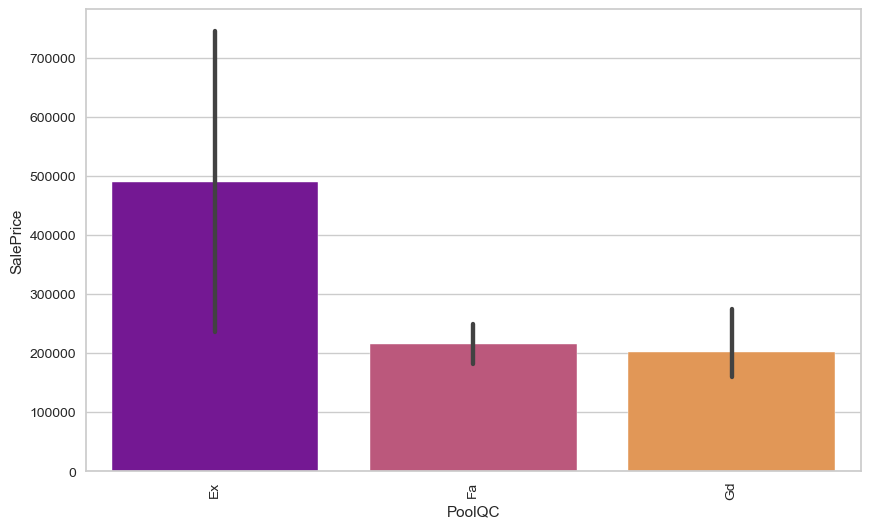

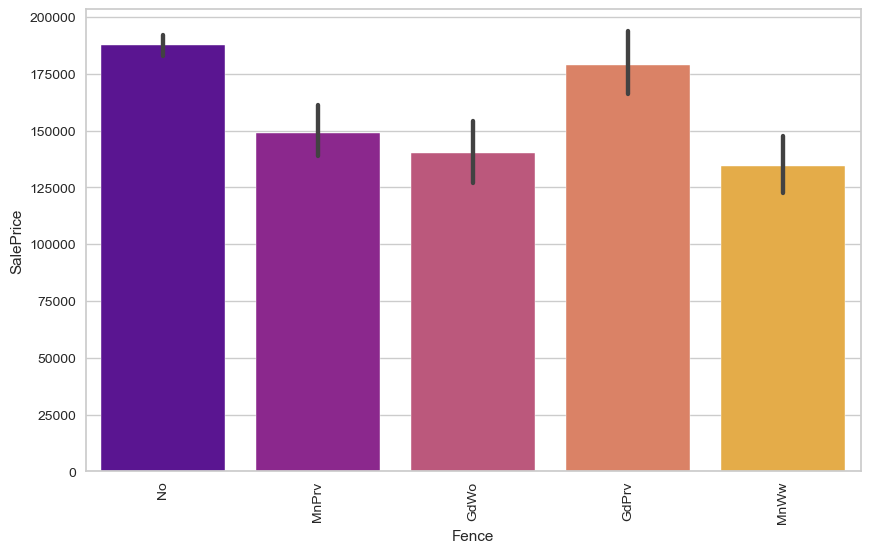

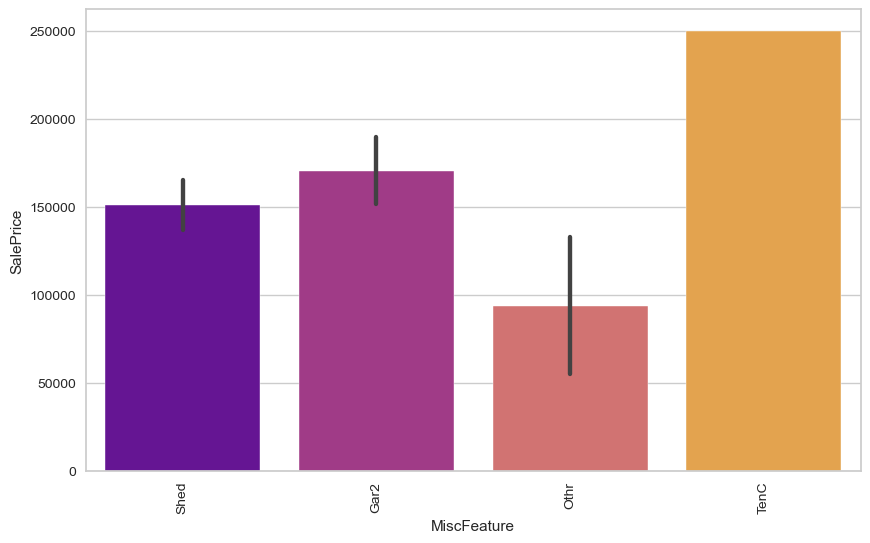

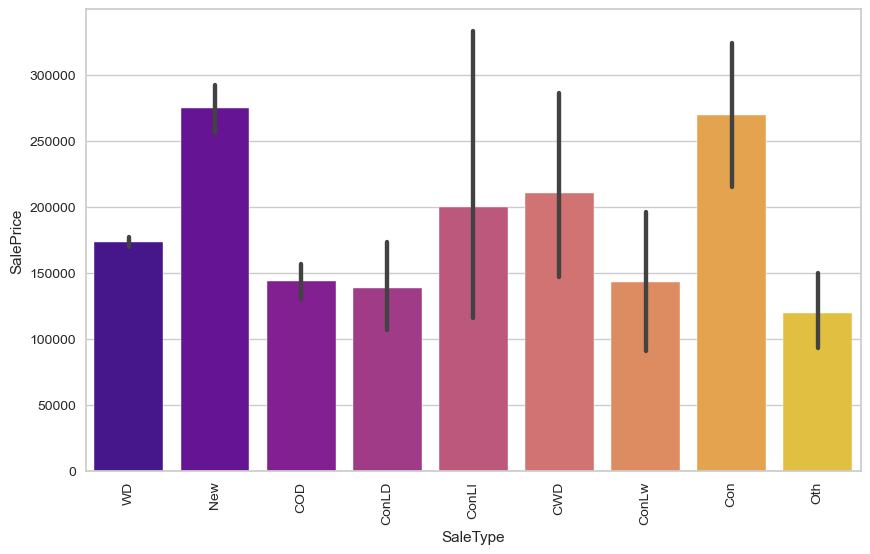

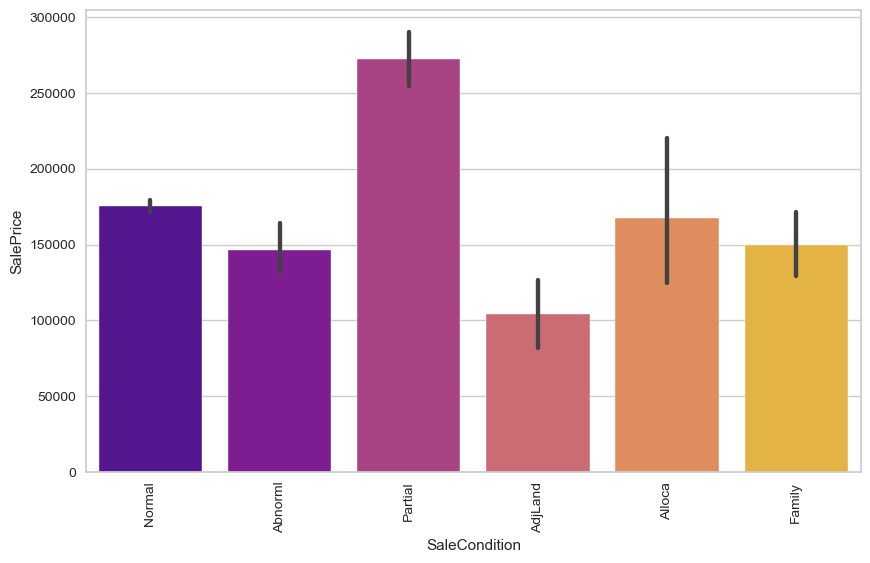

In [47]:
for categories in cat_cols:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df,x=categories, y='SalePrice', palette='plasma')
    plt.xticks(rotation=90)
    
    plt.show()

In [48]:
cat_cols.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [49]:
cat_col = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']

In [50]:
for category in cat_col:
    group_df = df.groupby(category)['SalePrice'].median().reset_index()
    
    # Menampilkan hasil
    print(f"Average SalePrice by {category}:")
    print(group_df)
    print("\n")  # Menambahkan baris kosong untuk pemisah

Average SalePrice by MSZoning:
  MSZoning  SalePrice
0  C (all)    74700.0
1       FV   205950.0
2       RH   136500.0
3       RL   174000.0
4       RM   120500.0


Average SalePrice by Street:
  Street  SalePrice
0   Grvl   114250.0
1   Pave   163000.0


Average SalePrice by Alley:
  Alley  SalePrice
0  Grvl   119500.0
1    No   165000.0
2  Pave   172500.0


Average SalePrice by LotShape:
  LotShape  SalePrice
0      IR1   189000.0
1      IR2   221000.0
2      IR3   203570.0
3      Reg   146000.0


Average SalePrice by LandContour:
  LandContour  SalePrice
0         Bnk   139400.0
1         HLS   222250.0
2         Low   190000.0
3         Lvl   162900.0


Average SalePrice by Utilities:
  Utilities  SalePrice
0    AllPub   163000.0
1    NoSeWa   137500.0


Average SalePrice by LotConfig:
  LotConfig  SalePrice
0    Corner   160000.0
1   CulDSac   199262.0
2       FR2   165000.0
3       FR3   195450.0
4    Inside   159697.5


Average SalePrice by LandSlope:
  LandSlope  SalePrice
0   

### SUMMARY

1. SaleCondition : pada SaleCondition, kondisi rumah yang partial meemiliki harga penjuaan yang tinggi.
Fitur SaleCondition partial itu mungkin perlu difokuskan dalam strategi pemasaran karena memiliki harga jual yang tinggi

2. SaleType : Dari rata-rata tertinggi pada kategiri 'New', rumah baru cenderung memiliki harga yang tinggi, sama seperti 'Con' menunjukkan harga yag tinggi. Pada jenis transaksi lain memiliki harga jual yang rendah seperti COD

3. MSZONING: Zonasi RL (Residential Low Density) menunjukkan harga penjualan tertinggi, yang mengindikasikan bahwa properti dalam kategori ini memiliki nilai yang lebih tinggi dibandingkan dengan kategori lainnya. Hal ini bisa jadi karena kawasan ini lebih diinginkan untuk tempat tinggal dengan ruang yang lebih luas.

fokuskan pemasaran Anda pada properti yang berada dalam zonasi RL. Highlight ruang terbuka, lingkungan yang nyaman, dan aksesibilitas untuk menarik pembeli yang mencari rumah keluarga.

4. Street : Grvl (Gravel): Rata-rata harga jual rumah adalah $114,250.00.
Pave (Paved): Rata-rata harga jual rumah adalah $163,000.00.
Selisih: Terdapat selisih sebesar $48,750.00 antara harga jual rata-rata rumah di jalan berbatu (Grvl) dan jalan aspal (Pave).

Harga rumah di jalan aspal (Pave) lebih tinggi, yang menunjukkan bahwa infrastruktur yang baik dan aksesibilitas lebih mudah berkontribusi pada nilai properti. Pembeli cenderung lebih memilih properti yang berada di jalan yang baik dan nyaman.

Untuk properti yang terletak di jalan berbatu, pertimbangkan untuk melakukan investasi dalam perbaikan infrastruktur, seperti pengaspalan atau peningkatan aksesibilitas. Meskipun memerlukan biaya, investasi ini dapat meningkatkan daya tarik dan nilai jual properti.

4. LotShape : tipe tanah atau dimensi tanah : bentuk lot yang tidak teratur (IR1, IR2, IR3) memiliki harga jual rata-rata yang lebih tinggi dibandingkan dengan lot yang teratur (Reg). Hal ini menunjukkan bahwa meskipun bentuk lot tidak teratur, faktor lain mungkin meningkatkan nilai properti, seperti lokasi atau ukuran.

Lot Teratur (Reg): Lot teratur memiliki rata-rata harga jual terendah.

Pertimbangkan untuk mencari properti dengan bentuk lot yang tidak teratur (seperti IR1, IR2, dan IR3) karena hal tersebut menunjukkan potensi harga jual yang lebih tinggi.

5. LandContour : Tipe Kontur Tanah: HLS (High Land Slope) memiliki harga penjualan rata-rata tertinggi (222250.0). Hal ini menunjukkan bahwa tanah dengan kemiringan yang lebih tinggi mungkin dianggap lebih bernilai, mungkin karena pemandangan yang lebih baik atau potensi untuk pembangunan yang lebih menarik.
Low (190000.0) dan Lvl (Level) (162900.0) memiliki harga rata-rata yang cukup tinggi, menunjukkan bahwa area yang lebih datar atau rendah tetap diminati dan memiliki nilai yang kompetitif.
Bnk (Bank) dengan harga rata-rata terendah (139400.0) menunjukkan bahwa kontur tanah ini mungkin kurang diinginkan, mungkin karena risiko banjir atau masalah akses.

6. Utilities : Jenis Utilitas: AllPub (All Public Utilities) memiliki harga penjualan rata-rata tertinggi (163000.0). Hal ini menunjukkan bahwa properti yang memiliki akses ke semua utilitas publik seperti listrik, air, dan saluran pembuangan lebih diminati dan dianggap lebih berharga. Aksesibilitas ini biasanya membuat kehidupan lebih nyaman dan mengurangi biaya tambahan untuk pengadaan utilitas.
NoSeWa (No Sewer/Water) memiliki harga rata-rata yang lebih rendah (137500.0), menunjukkan bahwa properti tanpa akses ke saluran pembuangan atau air publik cenderung kurang menarik bagi pembeli. Ini bisa disebabkan oleh biaya tambahan yang diperlukan untuk menyediakan utilitas ini secara pribadi.

7. LotConfig : LotConfig dan Nilai Properti: CulDSac (tanah di ujung jalan buntu) memiliki harga rata-rata tertinggi yaitu 199262.0. Tanah di lokasi ini sering kali dianggap lebih aman, lebih eksklusif, dan memiliki lalu lintas yang lebih sedikit, sehingga menjadi pilihan yang lebih menarik bagi banyak pembeli.
FR3 (tanah yang berhadapan dengan tiga jalan) juga memiliki harga yang tinggi (195450.0), mungkin karena aksesibilitas yang lebih baik atau karena tanah tersebut memiliki keunikan dalam tata letaknya.
FR2 (tanah yang berhadapan dengan dua jalan) memiliki harga rata-rata yang lebih rendah (165000.0), tetapi tetap lebih tinggi dibandingkan tanah Inside (tanah yang berada di dalam perumahan dengan hanya satu akses jalan utama) yang harganya hampir setara dengan Corner (tanah di pojokan), yaitu sekitar 160000.0.

pertimbangkan untuk meningkatkan jumlah lot di CulDSac atau FR3 karena jenis lot ini memiliki harga penjualan yang lebih tinggi. Pengembangan di area tersebut dapat memberikan nilai tambah pada suatu proyek.

8. LandSlope : LandSlope dan Nilai Properti:

Mod (kemiringan sedang) memiliki harga rata-rata tertinggi, yaitu 186700.0, diikuti oleh Sev (kemiringan tajam) dengan harga rata-rata 185000.0. Kemiringan yang lebih tinggi mungkin menawarkan pemandangan yang lebih baik atau tanah dengan karakter unik, sehingga meningkatkan daya tarik dan harga properti.

Untuk properti dengan kemiringan Mod atau Sev, tonjolkan keunggulan seperti pemandangan yang menarik, privasi, atau arsitektur yang bisa memanfaatkan kontur tanah tersebut. Properti ini bisa dipasarkan ke segmen pembeli premium yang menghargai keunikan atau pemandangan.

9. Neighborhood dan Harga Properti: NridgHt dan NoRidge merupakan kawasan dengan harga rata-rata tertinggi, masing-masing sebesar 315000.0 dan 301500.0. Ini menunjukkan bahwa kawasan ini adalah lingkungan yang lebih premium dan mungkin menawarkan fasilitas atau daya tarik yang lebih tinggi dibandingkan lingkungan lain.

10. Cond1 : Kondisi Properti dan Harga: RRNn dan PosA adalah kondisi dengan harga rata-rata tertinggi, masing-masing sebesar 214000.0 dan 212500.0. Ini mungkin menunjukkan bahwa properti yang terletak di dekat jalan rel atau area dengan pemandangan yang bagus (seperti pemandangan alam yang positif, PosA) dianggap lebih bernilai dan menarik bagi pembeli.

mungkin ebih berfokus pada keunggulan lokasi, seperti pemandangan yang indah, ketenangan, atau akses ke area hijau. Pembeli cenderung mencari lingkungan yang damai dan dapat dijadikan rumah dengan suasana yang nyaman.

11. BldgType : Tipe Bangunan dengan Harga Tertinggi:

TwnhsE (Townhouse End Unit) memiliki harga rata-rata tertinggi, yaitu 172200.0. Hal ini menunjukkan bahwa tipe bangunan ini mungkin lebih menarik bagi pembeli karena biasanya memiliki lebih banyak ruang dan privasi dibandingkan townhouse biasa, mungkin dikarena hanya berbatasan dengan satu unit lain.

In [51]:
anova_results = pd.DataFrame(columns=['Feature', 'F-Statistic', 'p-value', 'Significant'])


for col in cat_cols:
    # Membuat model ANOVA
    model = ols(f'SalePrice ~ C({col})', data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    
    # Mengambil nilai F-Statistic dan p-value
    f_statistic = anova_table['F'][0]
    p_value = anova_table['PR(>F)'][0]
    
    # Tentukan apakah hasilnya signifikan berdasarkan p-value
    alpha = 0.05
    significant = 'Yes' if p_value < alpha else 'No'
    
    # Menyimpan hasil uji ke dalam dataframe
    anova_results = anova_results.append({
        'Feature': col,
        'F-Statistic': f_statistic,
        'p-value': p_value,
        'Significant': significant
    }, ignore_index=True)

# Menampilkan hasil uji ANOVA
print(anova_results)

          Feature  F-Statistic        p-value Significant
0        MSZoning    43.840282   8.817634e-35         Yes
1          Street     2.459290   1.170486e-01          No
2           Alley    15.176614   2.996380e-07         Yes
3        LotShape    40.132852   6.447524e-25         Yes
4     LandContour    12.850188   2.742217e-08         Yes
5       Utilities     0.298804   5.847168e-01          No
6       LotConfig     7.809954   3.163167e-06         Yes
7       LandSlope     1.958817   1.413964e-01          No
8    Neighborhood    71.784865  1.558600e-225         Yes
9      Condition1     6.118017   8.904549e-08         Yes
10     Condition2     2.073899   4.342566e-02         Yes
11       BldgType    13.011077   2.056736e-10         Yes
12     HouseStyle    19.595001   3.376777e-25         Yes
13      RoofStyle    17.805497   3.653523e-17         Yes
14       RoofMatl     6.727305   7.231445e-08         Yes
15    Exterior1st    18.611743   2.586089e-43         Yes
16    Exterior

Adapun beberapa kandidat dari fitur kategori yang dapat menjadi prediktor, yang memiliki significant 'Yes'

- drop : MiscFeature, PoolQC, LandSlope, Street

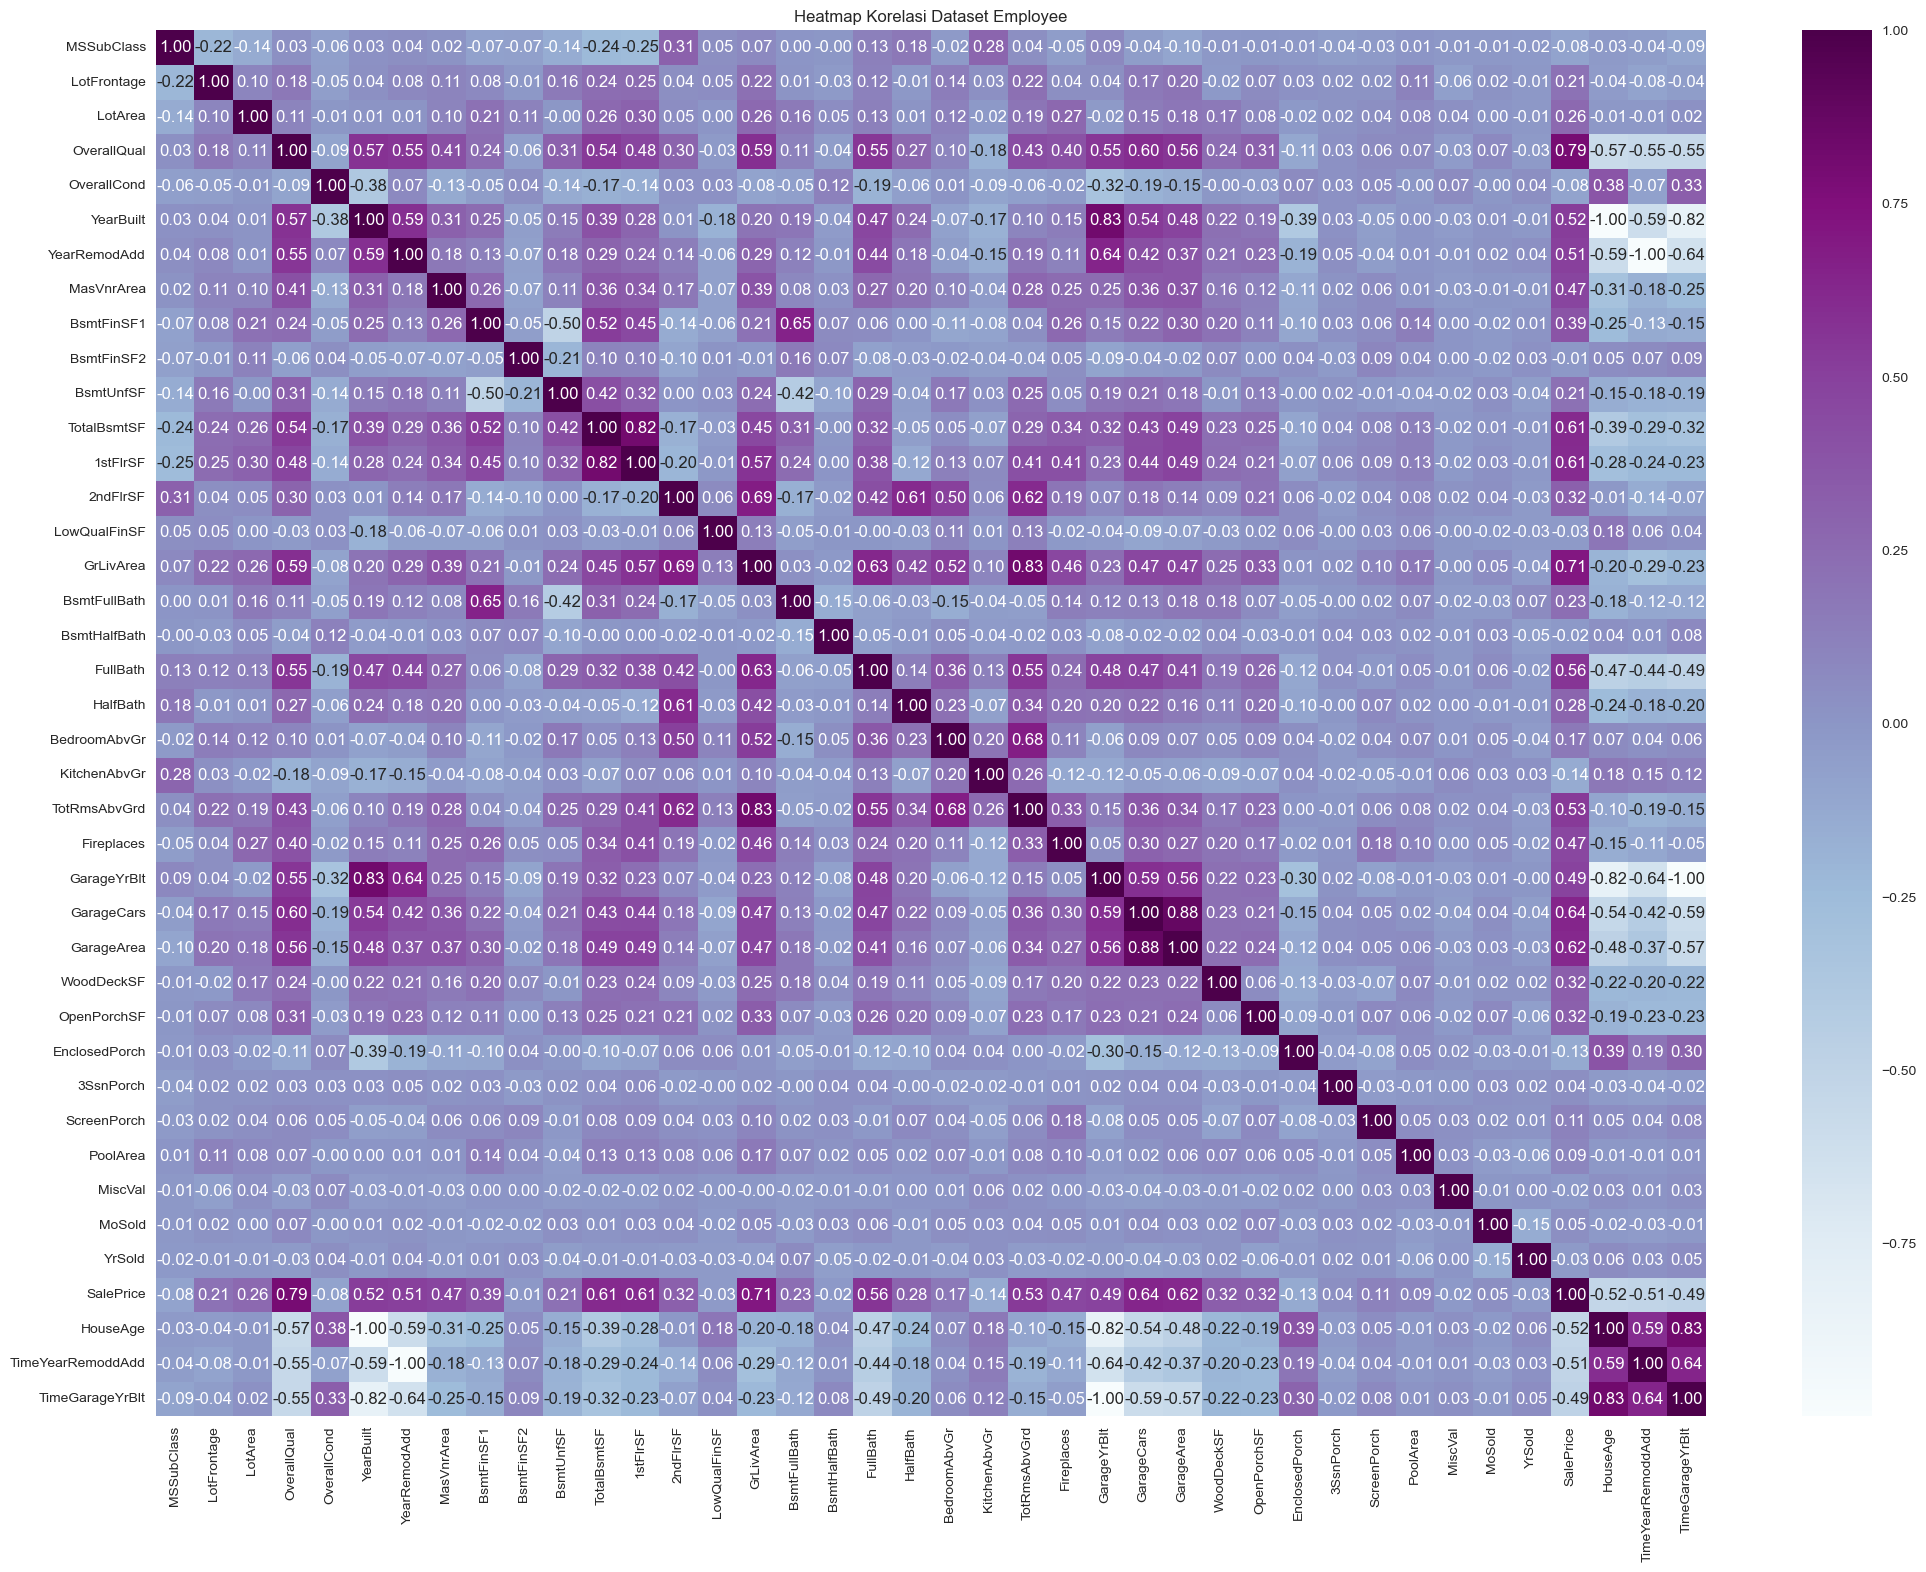

In [52]:
# Hitung korelasi antar kolom numerik
correlation_matrix = df.corr()


# Buat heatmap korelasi dengan seaborn
plt.figure(figsize=(25, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', fmt=".2f")
plt.title("Heatmap Korelasi Dataset Employee")
plt.show()

In [53]:
# 1. Menghitung matriks korelasi untuk semua kolom numerik
corr_matrix = df.corr()

# 2. Ambil pasangan fitur yang memiliki korelasi lebih dari 80%
high_corr = corr_matrix.abs() > 0.8

# 3. Membuat DataFrame untuk pasangan yang memenuhi syarat
correlated_features = np.where((high_corr) & (corr_matrix != 1))  # Hindari korelasi dengan diri sendiri
correlated_pairs = [(corr_matrix.index[i], corr_matrix.columns[j]) for i, j in zip(*correlated_features)]

# Menampilkan fitur-fitur yang berkorelasi
print("Fitur yang berkorelasi lebih dari 80%:")
for pair in correlated_pairs:
    print(pair[0], "dan", pair[1], ":", corr_matrix.loc[pair[0], pair[1]])


Fitur yang berkorelasi lebih dari 80%:
YearBuilt dan GarageYrBlt : 0.8256674841743408
YearBuilt dan HouseAge : -0.9990359444033182
YearBuilt dan TimeGarageYrBlt : -0.8247931075808766
YearRemodAdd dan TimeYearRemoddAdd : -0.9979304500154548
TotalBsmtSF dan 1stFlrSF : 0.8195299750050339
1stFlrSF dan TotalBsmtSF : 0.8195299750050339
GrLivArea dan TotRmsAbvGrd : 0.8254893743088425
TotRmsAbvGrd dan GrLivArea : 0.8254893743088425
GarageYrBlt dan YearBuilt : 0.8256674841743408
GarageYrBlt dan HouseAge : -0.8246146956392572
GarageYrBlt dan TimeGarageYrBlt : -0.998551917740074
GarageCars dan GarageArea : 0.882475414281462
GarageArea dan GarageCars : 0.882475414281462
HouseAge dan YearBuilt : -0.9990359444033182
HouseAge dan GarageYrBlt : -0.8246146956392572
HouseAge dan TimeGarageYrBlt : 0.8261738982800465
TimeYearRemoddAdd dan YearRemodAdd : -0.9979304500154548
TimeGarageYrBlt dan YearBuilt : -0.8247931075808766
TimeGarageYrBlt dan GarageYrBlt : -0.998551917740074
TimeGarageYrBlt dan HouseAge 

Column need to drop  
- Variable Time : garageYrBlt, YearBlt
- Category : MiscFeature, PoolQC, LandSlope, Street
- Descreat : YrSold, MoSold, BsmtHalfBath

# Build Machine Learning Model

## Preprocessing

In [54]:
train_df = pd.read_csv('/Volumes/MACINTOSH/MD 101/Dataset/house price/train.csv')
test_df = pd.read_csv('/Volumes/MACINTOSH/MD 101/Dataset/house price/test.csv')

In [55]:
train_df['HouseAge'] = train_df['YrSold'] - train_df['YearBuilt']
train_df['TimeYearRemoddAdd'] = train_df['YrSold'] - train_df['YearRemodAdd']
train_df['TimeGarageYrBlt'] = train_df['YrSold'] - train_df['GarageYrBlt']

In [56]:
train_df_num = [
    'LotFrontage',
    'LotArea',
    'MasVnrArea',
    'BsmtFinSF1',
    'BsmtFinSF2',
    'BsmtUnfSF',
    'TotalBsmtSF',
    '1stFlrSF',
    '2ndFlrSF',
    'LowQualFinSF',
    'GrLivArea',
    'GarageArea',
    'WoodDeckSF',
    'OpenPorchSF',
    'EnclosedPorch',
    '3SsnPorch',
    'ScreenPorch',
    'MiscVal',
    'SalePrice'
]

test_df_num = [
    'LotFrontage',
    'LotArea',
    'MasVnrArea',
    'BsmtFinSF1',
    'BsmtFinSF2',
    'BsmtUnfSF',
    'TotalBsmtSF',
    '1stFlrSF',
    '2ndFlrSF',
    'LowQualFinSF',
    'GrLivArea',
    'GarageArea',
    'WoodDeckSF',
    'OpenPorchSF',
    'EnclosedPorch',
    '3SsnPorch',
    'ScreenPorch',
    'MiscVal'
]

In [57]:
train_df['HouseAge'] = train_df['YrSold'] - train_df['YearBuilt']
train_df['TimeYearRemoddAdd'] = train_df['YrSold'] - train_df['YearRemodAdd']
train_df['TimeGarageYrBlt'] = train_df['YrSold'] - train_df['GarageYrBlt']

test_df['HouseAge'] = test_df['YrSold'] - test_df['YearBuilt']
test_df['TimeYearRemoddAdd'] = test_df['YrSold'] - test_df['YearRemodAdd']
test_df['TimeGarageYrBlt'] = test_df['YrSold'] - test_df['GarageYrBlt']

train_df['Fence'].fillna('No', inplace=True)
train_df['Alley'].fillna('No', inplace=True)
train_df['MasVnrType'].fillna('No', inplace=True)
train_df['MasVnrArea'].fillna(0, inplace=True)
train_df['FireplaceQu'].fillna('No', inplace=True)
train_df['LotFrontage'].fillna(0, inplace=True)
train_df['GarageCond'].fillna('No', inplace=True)
train_df['GarageType'].fillna('No', inplace=True)
train_df['GarageFinish'].fillna('No', inplace=True)
train_df['GarageQual'].fillna('No', inplace=True)
train_df['BsmtFinType2'].fillna('Unf', inplace=True)
train_df['BsmtExposure'].fillna('No', inplace=True)
train_df['BsmtQual'].fillna('No', inplace=True)
train_df['BsmtCond'].fillna('No', inplace=True)
train_df['BsmtFinType1'].fillna('Unf', inplace=True)
train_df['MasVnrArea'].fillna(0, inplace=True)
train_df['Electrical'].fillna('SBrkr', inplace=True)


train_df['MiscFeature'].fillna('0', inplace=True)
train_df['PoolQC'].fillna('0', inplace=True)
train_df['TimeGarageYrBlt'].fillna(train_df['TimeGarageYrBlt'].mean(), inplace=True)
train_df['GarageYrBlt'].fillna(train_df['GarageYrBlt'].mean(), inplace=True)



test_df['Fence'].fillna('No', inplace=True)
test_df['Alley'].fillna('No', inplace=True)
test_df['MasVnrType'].fillna('No', inplace=True)
test_df['MasVnrArea'].fillna(0, inplace=True)
test_df['FireplaceQu'].fillna('No', inplace=True)
test_df['LotFrontage'].fillna(0, inplace=True)
test_df['GarageCond'].fillna('No', inplace=True)
test_df['GarageType'].fillna('No', inplace=True)
test_df['GarageFinish'].fillna('No', inplace=True)
test_df['GarageQual'].fillna('No', inplace=True)
test_df['BsmtFinType2'].fillna('Unf', inplace=True)
test_df['BsmtExposure'].fillna('No', inplace=True)
test_df['BsmtQual'].fillna('No', inplace=True)
test_df['BsmtCond'].fillna('No', inplace=True)
test_df['BsmtFinType1'].fillna('Unf', inplace=True)
test_df['MasVnrArea'].fillna(0, inplace=True)
test_df['Electrical'].fillna('SBrkr', inplace=True)

test_df['Exterior1st'].fillna(test_df['Exterior1st'].mode()[0], inplace=True)
test_df['GarageArea'].fillna(test_df['GarageArea'].mode()[0], inplace=True)
test_df['SaleType'].fillna(test_df['SaleType'].mode()[0], inplace=True)
test_df['Exterior2nd'].fillna(test_df['Exterior2nd'].mode()[0], inplace=True)
test_df['TotalBsmtSF'].fillna(test_df['TotalBsmtSF'].mode()[0], inplace=True)
test_df['BsmtUnfSF'].fillna(test_df['BsmtUnfSF'].mode()[0], inplace=True)
test_df['BsmtFinSF2'].fillna(test_df['BsmtFinSF2'].mode()[0], inplace=True)
test_df['BsmtFinSF1'].fillna(test_df['BsmtFinSF1'].mode()[0], inplace=True)
test_df['KitchenQual'].fillna(test_df['KitchenQual'].mode()[0], inplace=True)
test_df['BsmtFullBath'].fillna(test_df['BsmtFullBath'].mode()[0], inplace=True)
test_df['KitchenQual'].fillna(test_df['KitchenQual'].mode()[0], inplace=True)
test_df['Functional'].fillna(test_df['Functional'].mode()[0], inplace=True)
test_df['BsmtHalfBath'].fillna(test_df['BsmtHalfBath'].mode()[0], inplace=True)
test_df['Utilities'].fillna(test_df['Utilities'].mode()[0], inplace=True)
test_df['MSZoning'].fillna(test_df['MSZoning'].mode()[0], inplace=True)
test_df['MiscFeature'].fillna('0', inplace=True)
test_df['PoolQC'].fillna('0', inplace=True)
test_df['TimeGarageYrBlt'].fillna(test_df['TimeGarageYrBlt'].mean(), inplace=True)
test_df['GarageYrBlt'].fillna(test_df['GarageYrBlt'].mean(), inplace=True)
test_df['GarageCars'].fillna(test_df['GarageCars'].mean(), inplace=True)

In [58]:
pd.DataFrame(train_df.isnull().sum().sort_values(ascending=False)).head(20)

0
Id            0
KitchenQual   0
GarageCars    0
GarageFinish  0
GarageYrBlt   0
GarageType    0
FireplaceQu   0
Fireplaces    0
Functional    0
TotRmsAbvGrd  0
KitchenAbvGr  0
MSSubClass    0
BedroomAbvGr  0
HalfBath      0
FullBath      0
BsmtHalfBath  0
BsmtFullBath  0
GrLivArea     0
LowQualFinSF  0
2ndFlrSF      0

In [59]:

# (ODE)
ode_cols = [
    'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 
    'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 
    'KitchenQual', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 
    'PoolQC', 'Fence', 'LandSlope', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 
    'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 
    'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
    'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 
    'Functional', 'GarageType', 'PavedDrive', 'SaleType', 'SaleCondition', 'MiscFeature'
]

# 2. Ordinal Encoding (ODE)
# ===========================
# Buat mapping untuk setiap kolom ordinal (misalnya dari buruk ke baik)
mappings = {
    'OverallQual': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'OverallCond': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'ExterQual': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'Missing': 0, 'NA': 0},
    'ExterCond': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'Missing': 0, 'NA': 0},
    'BsmtQual': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'Missing': 0, 'NA': 0},
    'BsmtCond': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'Missing': 0, 'NA': 0},
    'BsmtExposure': {'Mn': 1, 'Av': 2, 'Gd': 3, 'Missing': 0, 'NA': 0},  
    'BsmtFinType1': {'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6, 'Missing': 0, 'NA': 0, },
    'BsmtFinType2': {'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6, 'Missing': 0, 'NA': 0, },
    'HeatingQC': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'Missing': 0, 'NA': 0},
    'KitchenQual': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'Missing': 0, 'NA': 0},
    'FireplaceQu': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'Missing': 0, 'NA': 0},
    'GarageFinish': {'Unf': 1, 'RFn': 2, 'Fin': 3, 'Missing': 0, 'NA': 0},
    'GarageQual': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'Missing': 0, 'NA': 0},
    'GarageCond': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'Missing': 0, 'NA': 0},
    'PoolQC': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'Missing': 0, 'NA': 0},
    'LandSlope': {'Gtl': 1, 'Mod': 2, 'Sev': 3},
    'Fence': {'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4, 'Missing': 0, 'NA': 0},
    }

# Buat instance OrdinalEncoder dengan handle_unknown untuk menangani nilai yang tidak dikenali
# Mengganti nilai berdasarkan pemetaan dan memastikan konsistensi tipe data
for col in ode_cols:
    if col in mappings:
        train_df[col] = train_df[col].replace(mappings[col])
        test_df[col] = test_df[col].replace(mappings[col])
    # Pastikan tipe data kolom adalah string
    train_df[col] = train_df[col].astype(str)
    test_df[col] = test_df[col].astype(str)

# Inisialisasi OrdinalEncoder
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Terapkan Ordinal Encoding pada kolom yang sesuai
train_df[ode_cols] = ordinal_encoder.fit_transform(train_df[ode_cols]).astype(int)
test_df[ode_cols] = ordinal_encoder.fit_transform(test_df[ode_cols]).astype(int)

In [60]:
train_df.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0   1          60         3         65.0     8450       1      1         3   
1   2          20         3         80.0     9600       1      1         3   
2   3          60         3         68.0    11250       1      1         0   
3   4          70         3         60.0     9550       1      1         0   
4   5          60         3         84.0    14260       1      1         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            3          0          4          0             5           2   
1            3          0          2          0            24           1   
2            3          0          4          0             5           2   
3            3          0          0          0             6           2   
4            3          0          2          0            15           2   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           2         0           5            0            0       2003   
1           2         0           2            0            0       1976   
2           2         0           5            0            0       2001   
3           2         0           5            0            0       1915   
4           2         0           5            0            0       2000   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0          2003          1         1           12           13           1   
1          1976          1         1            8            8           3   
2          2002          1         1           12           13           1   
3          1970          1         1           13           15           3   
4          2000          1         1           12           13           1   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0       196.0          2          2           2         2         2   
1         0.0          1          2           1         2         2   
2       162.0          2          2           2         2         2   
3         0.0          1          2           0         1         3   
4       350.0          2          2           2         2         2   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             3             5         706             0           0   
1             2             4         978             0           0   
2             0             5         486             0           0   
3             3             4         216             0           0   
4             1             5         655             0           0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0        150          856        1          4           1           4   
1        284         1262        1          4           1           4   
2        434          920        1          4           1           4   
3        540          756        1          3           1           4   
4        490         1145        1          4           1           4   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2         1             3             1            2             8   
1         2         0             3             1            1             6   
2         2         1             3             1            2             6   
3         1         0             3             1            2 

In [61]:
train_df[train_df_num] = train_df[train_df_num].apply(np.log1p)
test_df[test_df_num] = test_df[test_df_num].apply(np.log1p)

Column need to drop  
- Variable Time : garageYrBlt, YearBlt
- Category : MiscFeature, PoolQC, LandSlope, Street
- Descreat : YrSold, MoSold, BsmtHalfBath

## Split the Target

In [62]:
X = train_df.drop(columns=['SalePrice', 'Id'])

y = train_df['SalePrice']

X_df_test = test_df.drop(columns='Id')

In [63]:
X_df_test.head()

MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0          20         2     4.394449  9.360741       1      1         3   
1          20         3     4.406719  9.565775       1      1         0   
2          60         3     4.317488  9.534668       1      1         0   
3          60         3     4.369448  9.208238       1      1         0   
4         120         3     3.784190  8.518392       1      1         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            3          0          4          0            12           1   
1            3          0          0          0            12           2   
2            3          0          4          0             8           2   
3            3          0          4          0             8           2   
4            1          0          4          0            22           2   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           2         0           2            0            0       1961   
1           2         0           2            0            0       1958   
2           2         0           4            0            0       1997   
3           2         0           4            0            0       1998   
4           2         4           2            0            0       1992   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0          1961          1         0           10           12           3   
1          1958          3         0           11           13           1   
2          1998          1         0           10           12           3   
3          1998          1         0           10           12           1   
4          1992          1         0            6            6           3   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0    0.000000          1          2           1         1         2   
1    4.691348          1          2           1         1         2   
2    0.000000          1          2           2         2         2   
3    3.044522          1          2           2         1         2   
4    0.000000          2          2           2         2         2   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             3             2    6.150603             1    4.976734   
1             3             4    6.828712             0    0.000000   
2             3             5    6.674561             0    0.000000   
3             3             5    6.401917             0    0.000000   
4             3             4    5.575949             0    0.000000   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0   5.602119     6.783325        0          2           1           3   
1   6.008813     7.192934        0          2           1           3   
2   4.927254     6.834109        0          3           1           3   
3   5.783825     6.831954        0          4           1           3   
4   6.925595     7.155396        0          4           1           3   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0  6.799056  0.000000           0.0   6.799056           0.0           0.0   
1  7.192934  0.000000           0.0   7.192934           0.0           0.0   
2  6.834109  6.553933           0.0   7.396335           0.0           0.0   
3  6.831954  6.520621           0.0   7.380879           0.0           0.0   
4  7.155396  0.000000           0.0   7.155396           0.0           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         1         0             2             1            1             5   
1         1         1             3             1            2             6   
2         2         1             3             1            1             6   
3         2         1             3             1            2             7   
4

In [64]:

print("Jumlah sampel pada fitur X_train:", X.shape[0])


print("Jumlah sampel pada target y_train:", y.shape[0])

print("Jumlah sampel pada target X_test:", X_df_test.shape[0])

Jumlah sampel pada fitur X_train: 1460
Jumlah sampel pada target y_train: 1460
Jumlah sampel pada target X_test: 1459


In [65]:
y = y.iloc[:-1] 

X = X[:-1]


In [66]:
print("Jumlah sampel pada fitur X_train:", X.shape[0])


print("Jumlah sampel pada target y_train:", y.shape[0])

print("Jumlah sampel pada target X_test:", X_df_test.shape[0])

Jumlah sampel pada fitur X_train: 1459
Jumlah sampel pada target y_train: 1459
Jumlah sampel pada target X_test: 1459


## Models Define

In [67]:
RFR = RandomForestRegressor(random_state=42)
XGB = XGBRegressor(random_state=42)
LGBM = LGBMRegressor(verbose =  -1)
CAT = CatBoostRegressor(iterations=100, depth=3, learning_rate=0.1, verbose=0)
KNN = KNeighborsRegressor()



models = [
    ('Random Forest', RFR),
    ('XGBoost', XGB),
    ('LightGBM', LGBM),
    ('Cat', CAT),
    ('Knn', KNN)
]

In [68]:
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

## Training and Test

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

results = pd.DataFrame(columns=['Model', 'RMSE', 'MAE', 'MSE', 'R²'])

for model_name, model in models:
    # Melatih model
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)

    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)

    results = results.append({'Model': model_name + ' (Train)', 'RMSE': rmse_train, 'MAE': mae_train, 'MSE': mse_train, 'R²': r2_train}, ignore_index=True)

    y_pred_test = model.predict(X_test)
    
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    mae_test = mean_absolute_error(y_test, y_pred_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)

    results = results.append({'Model': model_name + ' (Test)', 'RMSE': rmse_test, 'MAE': mae_test, 'MSE': mse_test, 'R²': r2_test}, ignore_index=True)

print("Hasil Evaluasi pada Dataset Pelatihan dan Pengujian:")
print(results)


Hasil Evaluasi pada Dataset Pelatihan dan Pengujian:
                   Model      RMSE       MAE       MSE        R²
0  Random Forest (Train)  0.056642  0.038063  0.003208  0.979642
1   Random Forest (Test)  0.158004  0.102474  0.024965  0.850774
2        XGBoost (Train)  0.005649  0.003836  0.000032  0.999798
3         XGBoost (Test)  0.157850  0.105893  0.024917  0.851064
4       LightGBM (Train)  0.046263  0.028983  0.002140  0.986419
5        LightGBM (Test)  0.148887  0.097138  0.022167  0.867499
6            Cat (Train)  0.122081  0.089860  0.014904  0.905430
7             Cat (Test)  0.145060  0.103198  0.021042  0.874223
8            Knn (Train)  0.189672  0.139340  0.035975  0.771726
9             Knn (Test)  0.263671  0.185674  0.069522  0.584442


LGBM, Catboost dan XGB tampak menjadi kandidat model yang kuat, walau diantaranya terdapat sedikit indikasi overfit 

Text(0, 0.5, 'Predicted House Price')

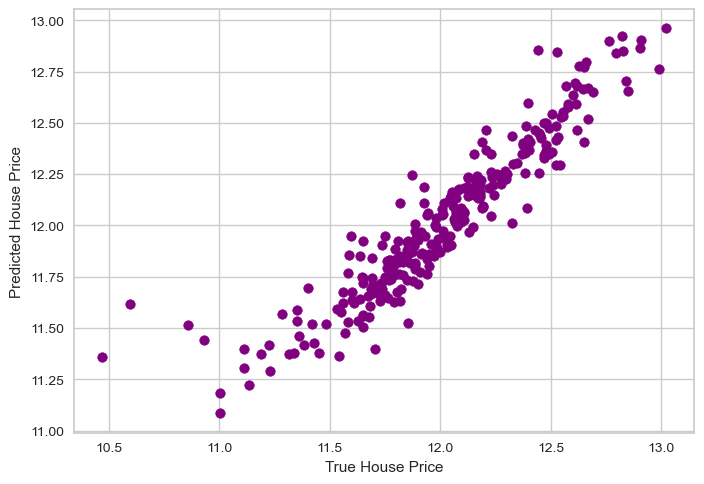

In [70]:
LGBM.fit(X_train,y_train)

plt.scatter(y_test, LGBM.predict(X_test), color='purple')
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')


Text(0.5, 1.0, 'Evaluation of LGBM Predictions')

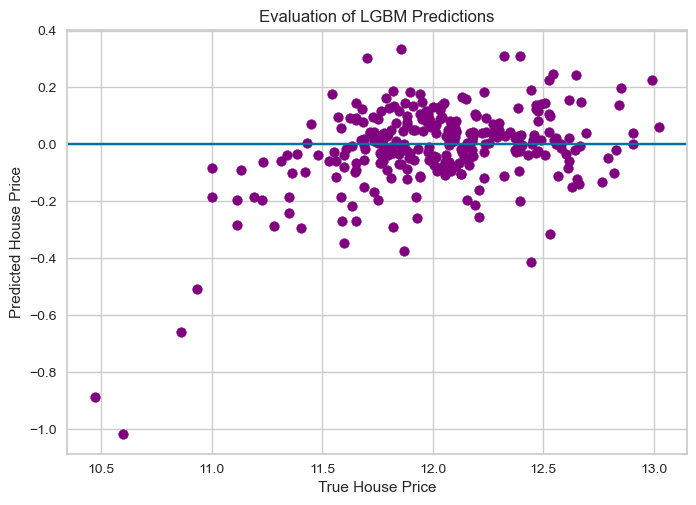

In [71]:
plt.scatter(y_test, y_test - LGBM.predict(X_test),color='purple')
plt.axhline(y=0)
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of LGBM Predictions')

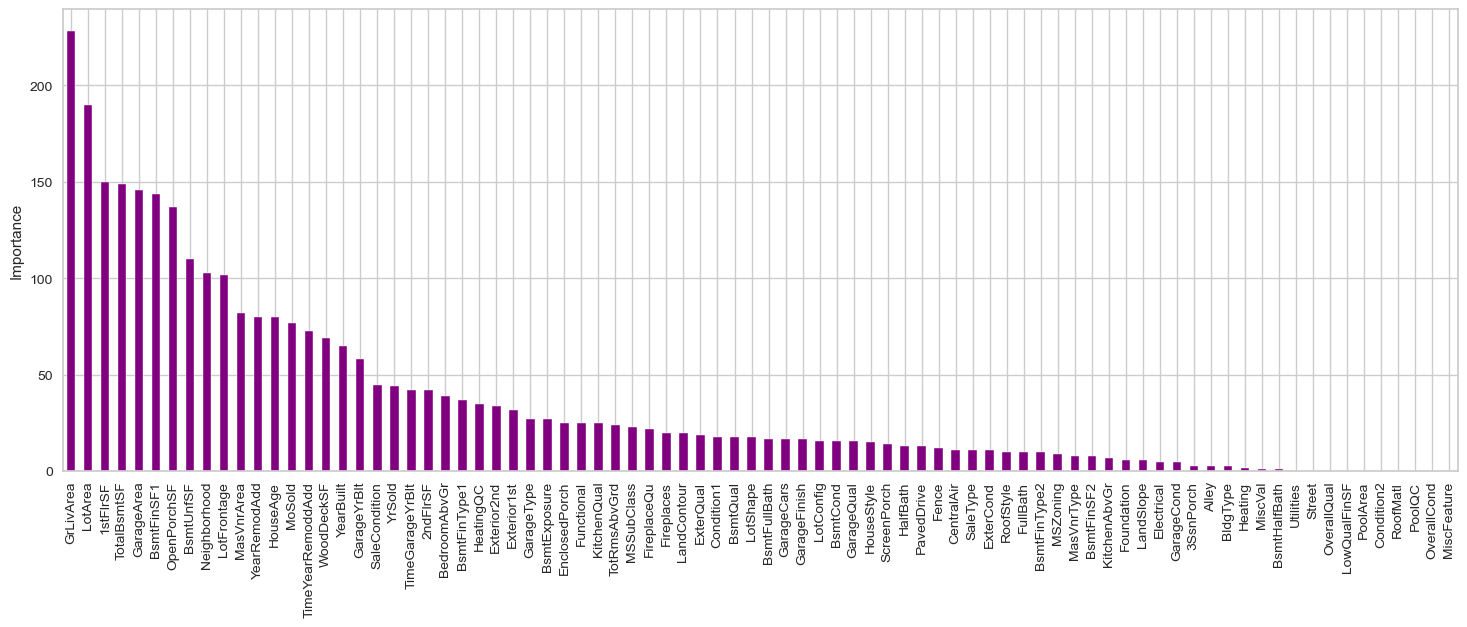

In [72]:
importance = pd.Series(LGBM.feature_importances_, index=X_train.columns)


importance.sort_values(inplace=True, ascending=False)

plt.figure(figsize=(18, 6))
importance.sort_values(ascending=False).plot(kind='bar',color='purple')
plt.title = ('Feature Importance from LGBM Regressor')
plt.ylabel('Importance')
plt.show()

In [73]:
from sklearn.feature_selection import RFE

selector = RFE(LGBM, n_features_to_select=40, step=1)
selector.fit(X_train, y_train)

# Menampilkan fitur yang dipilih
selected_features = X_train.columns[selector.support_]
print("Fitur yang terpilih: ", selected_features)

Fitur yang terpilih:  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Neighborhood', 'YearBuilt',
       'YearRemodAdd', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'MoSold', 'YrSold', 'SaleCondition', 'HouseAge',
       'TimeYearRemoddAdd', 'TimeGarageYrBlt'],
      dtype='object')


In [74]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

### LGBM HyperParameterTuning

In [75]:
# Parameter grid untuk Grid Search
param_grid = {
    'objective': ['regression'],
    'learning_rate': [0.01, 0.1, 0.2], 
    'max_depth': [-1, 1, 2, 3], 
    'num_leaves': [20, 40, 60],
    'n_estimators': [100, 200], 
    'lambda_l2': [1.0],    
    'verbose': [-1]
}

grid_search = GridSearchCV(estimator=LGBM, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Melakukan fit pada data training
grid_search.fit(X_train_selected, y_train)

# Output parameter terbaik dan skor MSE terbaik dari Grid Search
print("Best parameters:", grid_search.best_params_)
print("Best score (MSE):", -grid_search.best_score_)

# Model terbaik berdasarkan Grid Search
best_model = grid_search.best_estimator_

# Prediksi pada data training
y_train_pred = best_model.predict(X_train_selected)

# Prediksi pada data test
y_test_pred = best_model.predict(X_test_selected)

# Evaluasi model pada data training
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
train_r2 = r2_score(y_train, y_train_pred)

# Evaluasi model pada data test
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
test_r2 = r2_score(y_test, y_test_pred)

# Output hasil evaluasi pada data training
print("=== Evaluation on Training Set ===")
print(f'Train MSE: {train_mse:.4f}')
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Train MAE: {train_mae:.4f}')
print(f'Train MAPE: {train_mape:.4f}%')
print(f'Train R² Score: {train_r2:.4f}')

# Output hasil evaluasi pada data test
print("\n=== Evaluation on Test Set ===")
print(f'Test MSE: {test_mse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')
print(f'Test MAE: {test_mae:.4f}')
print(f'Test MAPE: {test_mape:.4f}%')
print(f'Test R² Score: {test_r2:.4f}')

Best parameters: {'lambda_l2': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'num_leaves': 20, 'objective': 'regression', 'verbose': -1}
Best score (MSE): 0.02196245094865795
=== Evaluation on Training Set ===
Train MSE: 0.0100
Train RMSE: 0.1001
Train MAE: 0.0698
Train MAPE: 0.5836%
Train R² Score: 0.9364

=== Evaluation on Test Set ===
Test MSE: 0.0218
Test RMSE: 0.1476
Test MAE: 0.0988
Test MAPE: 0.8335%
Test R² Score: 0.8698


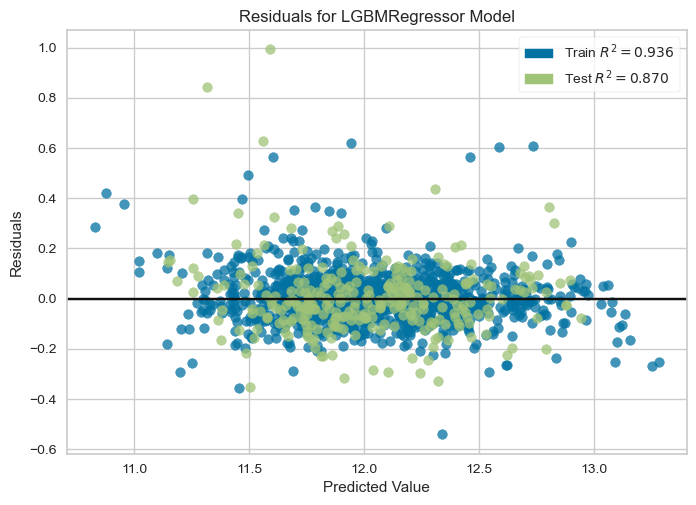

<Axes: title={'center': 'Residuals for LGBMRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [76]:
# Melatih model
best_model.fit(X_train_selected, y_train)

# Menggunakan ResidualsPlot
visualizer = ResidualsPlot(best_model, hist=False)

# Fit pada data training
visualizer.fit(X_train_selected, y_train)

# Evaluasi model pada data testing
visualizer.score(X_test_selected, y_test)

# Menampilkan plot
visualizer.poof()

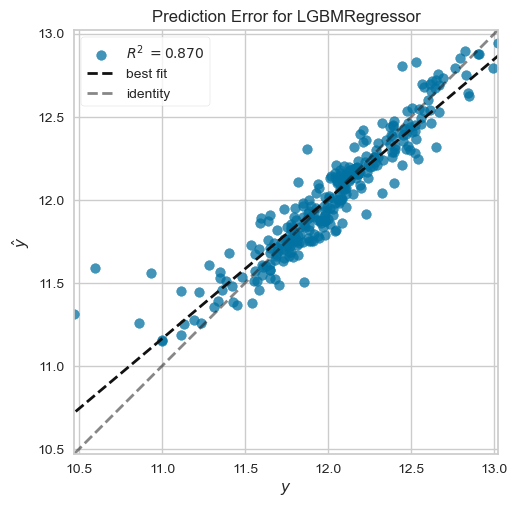

In [77]:
# Melatih model
best_model.fit(X_train_selected, y_train)

model = best_model
visualizer = PredictionError(model)

visualizer.fit(X_train_selected, y_train) 
visualizer.score(X_test_selected, y_test)
g = visualizer.poof()  

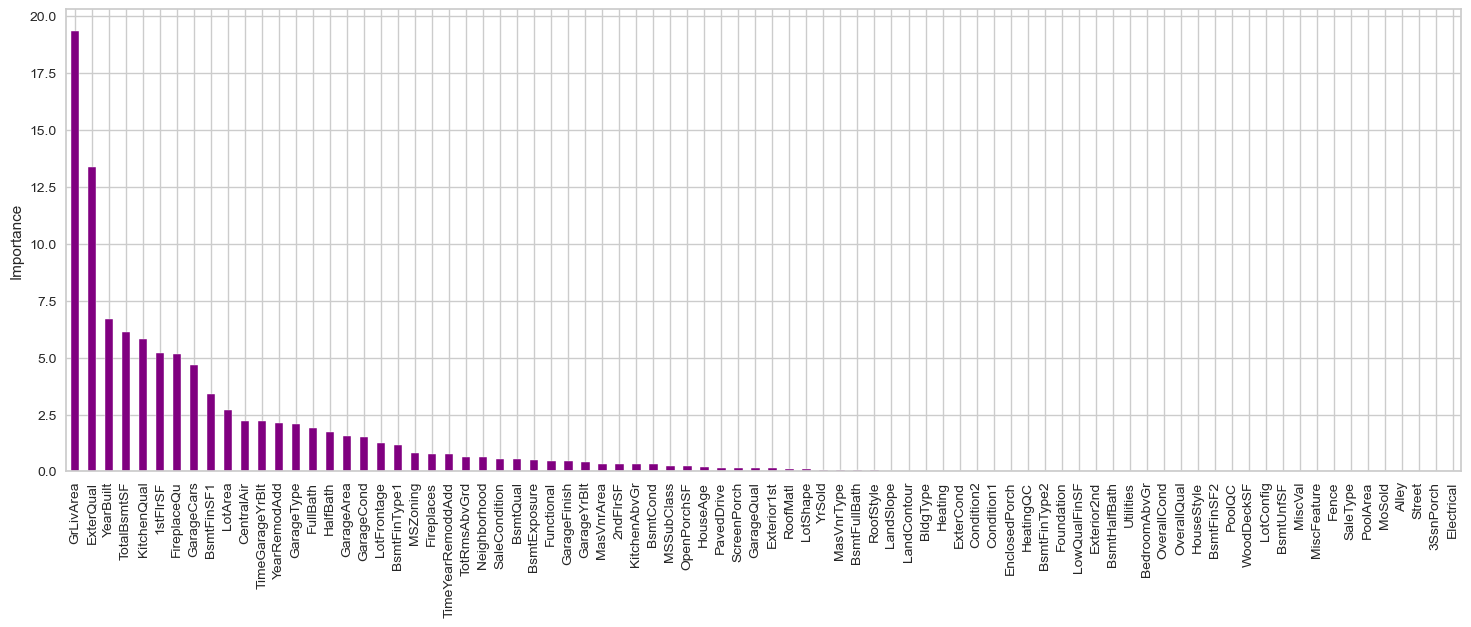

In [78]:
importance = pd.Series(CAT.feature_importances_, index=X_train.columns)

# Menampilkan feature importance

importance.sort_values(inplace=True, ascending=False)

plt.figure(figsize=(18, 6))
importance.sort_values(ascending=False).plot(kind='bar',color='purple')
plt.title = ('Feature Importance from LGBM Regressor')
plt.ylabel('Importance')
plt.show()

In [79]:
from sklearn.feature_selection import RFE

selector = RFE(CAT, n_features_to_select=20, step=1)
selector.fit(X_train, y_train)

# Menampilkan fitur yang dipilih
selected_features_CAT = X_train.columns[selector.support_]
print("Fitur yang terpilih: ", selected_features_CAT)

Fitur yang terpilih:  Index(['MSZoning', 'LotArea', 'YearBuilt', 'ExterQual', 'BsmtQual',
       'BsmtFinSF1', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageType',
       'GarageCars', 'GarageArea', 'OpenPorchSF', 'SaleCondition',
       'TimeYearRemoddAdd'],
      dtype='object')


In [80]:
X_train_selected_cat = X_train[selected_features_CAT]
X_test_selected_cat = X_test[selected_features_CAT]

In [81]:
CAT.fit(X_train_selected_cat, y_train)

y_train_pred = CAT.predict(X_train_selected_cat)

# Prediksi pada data testing
y_test_pred = CAT.predict(X_test_selected_cat)

# Evaluasi model pada data training
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
train_r2 = r2_score(y_train, y_train_pred)

# Evaluasi model pada data test
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
test_r2 = r2_score(y_test, y_test_pred)

# Output hasil evaluasi pada data training
print("=== Evaluation on Training Set ===")
print(f'Train MSE: {train_mse:.4f}')
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Train MAE: {train_mae:.4f}')
print(f'Train MAPE: {train_mape:.4f}%')
print(f'Train R² Score: {train_r2:.4f}')

# Output hasil evaluasi pada data test
print("\n=== Evaluation on Test Set ===")
print(f'Test MSE: {test_mse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')
print(f'Test MAE: {test_mae:.4f}')
print(f'Test MAPE: {test_mape:.4f}%')
print(f'Test R² Score: {test_r2:.4f}')


=== Evaluation on Training Set ===
Train MSE: 0.0162
Train RMSE: 0.1274
Train MAE: 0.0935
Train MAPE: 0.7813%
Train R² Score: 0.8970

=== Evaluation on Test Set ===
Test MSE: 0.0210
Test RMSE: 0.1449
Test MAE: 0.1051
Test MAPE: 0.8861%
Test R² Score: 0.8746


In [82]:
print("Shape of training data:", X_train_selected_cat.shape)
print("Shape of testing data:", X_test_selected_cat.shape)

Shape of training data: (1167, 20)
Shape of testing data: (292, 20)


In [83]:
print("Training features:", X_train_selected_cat.columns.tolist())
print("Testing features:", X_test_selected_cat.columns.tolist())


Training features: ['MSZoning', 'LotArea', 'YearBuilt', 'ExterQual', 'BsmtQual', 'BsmtFinSF1', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageType', 'GarageCars', 'GarageArea', 'OpenPorchSF', 'SaleCondition', 'TimeYearRemoddAdd']
Testing features: ['MSZoning', 'LotArea', 'YearBuilt', 'ExterQual', 'BsmtQual', 'BsmtFinSF1', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageType', 'GarageCars', 'GarageArea', 'OpenPorchSF', 'SaleCondition', 'TimeYearRemoddAdd']


### CATBOOST HyperParamaeterTuning

In [84]:
param_grid_cat = {
    'iterations': [200, 400],
    'depth': [3, 4, 5],
    'learning_rate': [0.05, 0.1]
}

grid_search = GridSearchCV(estimator=CAT, param_grid=param_grid_cat, 
                           scoring='neg_mean_squared_error', cv=3, n_jobs=-1)

# Melakukan fit pada data training
grid_search.fit(X_train_selected_cat, y_train)

# Output parameter terbaik dan skor MSE terbaik dari Grid Search
print("Best parameters:", grid_search.best_params_)
print("Best score (MSE):", -grid_search.best_score_)

# Model terbaik berdasarkan Grid Search
best_model_cat = grid_search.best_estimator_

# Prediksi pada data training
y_train_pred = best_model_cat.predict(X_train_selected_cat)

# Prediksi pada data test
y_test_pred = best_model_cat.predict(X_test_selected_cat)

# Evaluasi model pada data training
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
train_r2 = r2_score(y_train, y_train_pred)

# Evaluasi model pada data test
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
test_r2 = r2_score(y_test, y_test_pred)

# Output hasil evaluasi pada data training
print("=== Evaluation on Training Set ===")
print(f'Train MSE: {train_mse:.4f}')
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Train MAE: {train_mae:.4f}')
print(f'Train MAPE: {train_mape:.4f}%')
print(f'Train R² Score: {train_r2:.4f}')

# Output hasil evaluasi pada data test
print("\n=== Evaluation on Test Set ===")
print(f'Test MSE: {test_mse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')
print(f'Test MAE: {test_mae:.4f}')
print(f'Test MAPE: {test_mape:.4f}%')
print(f'Test R² Score: {test_r2:.4f}')

Best parameters: {'depth': 5, 'iterations': 400, 'learning_rate': 0.05}
Best score (MSE): 0.019526861097382137
=== Evaluation on Training Set ===
Train MSE: 0.0079
Train RMSE: 0.0886
Train MAE: 0.0648
Train MAPE: 0.5414%
Train R² Score: 0.9502

=== Evaluation on Test Set ===
Test MSE: 0.0182
Test RMSE: 0.1350
Test MAE: 0.0937
Test MAPE: 0.7911%
Test R² Score: 0.8910


dengan melakukan hyperparameter pada model catboost hasilnya bisa improve dengan R2 score 0.89

In [85]:
X_test_selected_cat.head()

MSZoning   LotArea  YearBuilt  ExterQual  BsmtQual  BsmtFinSF1  \
1321         3  8.799058       1949          1         4    0.000000   
836          4  8.999743       1948          1         1    5.826000   
413          4  9.100637       1927          1         1    0.000000   
522          4  8.517393       1947          1         1    5.991465   
1035         3  9.350189       1957          1         4    0.000000   

      TotalBsmtSF  CentralAir  1stFlrSF  2ndFlrSF  GrLivArea  KitchenQual  \
1321     0.000000           0  6.580639  0.000000   6.580639            1   
836      7.352441           1  7.352441  0.000000   7.352441            1   
413      6.916715           1  6.936343  0.000000   6.936343            1   
522      6.912743           1  6.912743  6.493754   7.417580            1   
1035     0.000000           0  6.740519  0.000000   6.740519            1   

      Functional  Fireplaces  GarageType  GarageCars  GarageArea  OpenPorchSF  \
1321           6           0           5           1    5.662960     0.000000   
836            3           0           5           2    6.700731     4.762174   
413            6           1           5           2    5.888878     0.000000   
522            6           2           5           2    6.042633     3.218876   
1035           6           0           5           1    5.673323     0.000000   

      SaleCondition  TimeYearRemoddAdd  
1321              4                 58  
836               4                 34  
413               4                 60  
522               4                 56  
1035              4                 52

Dari hasil ke 2 model diatas antara LGBM dan Catboost, model yang terbaik adalah LGBM dengan R2 score 0.87

In [86]:
# Membuat explainer
explainer = RegressionExplainer(best_model_cat, X_test_selected_cat, y_test, units="$")

# Menjalankan dashboard
ExplainerDashboard(explainer).run()

Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://192.168.1.13:8050


# Test the Model to a new dataset 'test_df'

In [87]:
X_df_test.head()

MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0          20         2     4.394449  9.360741       1      1         3   
1          20         3     4.406719  9.565775       1      1         0   
2          60         3     4.317488  9.534668       1      1         0   
3          60         3     4.369448  9.208238       1      1         0   
4         120         3     3.784190  8.518392       1      1         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            3          0          4          0            12           1   
1            3          0          0          0            12           2   
2            3          0          4          0             8           2   
3            3          0          4          0             8           2   
4            1          0          4          0            22           2   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           2         0           2            0            0       1961   
1           2         0           2            0            0       1958   
2           2         0           4            0            0       1997   
3           2         0           4            0            0       1998   
4           2         4           2            0            0       1992   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0          1961          1         0           10           12           3   
1          1958          3         0           11           13           1   
2          1998          1         0           10           12           3   
3          1998          1         0           10           12           1   
4          1992          1         0            6            6           3   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0    0.000000          1          2           1         1         2   
1    4.691348          1          2           1         1         2   
2    0.000000          1          2           2         2         2   
3    3.044522          1          2           2         1         2   
4    0.000000          2          2           2         2         2   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             3             2    6.150603             1    4.976734   
1             3             4    6.828712             0    0.000000   
2             3             5    6.674561             0    0.000000   
3             3             5    6.401917             0    0.000000   
4             3             4    5.575949             0    0.000000   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0   5.602119     6.783325        0          2           1           3   
1   6.008813     7.192934        0          2           1           3   
2   4.927254     6.834109        0          3           1           3   
3   5.783825     6.831954        0          4           1           3   
4   6.925595     7.155396        0          4           1           3   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0  6.799056  0.000000           0.0   6.799056           0.0           0.0   
1  7.192934  0.000000           0.0   7.192934           0.0           0.0   
2  6.834109  6.553933           0.0   7.396335           0.0           0.0   
3  6.831954  6.520621           0.0   7.380879           0.0           0.0   
4  7.155396  0.000000           0.0   7.155396           0.0           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         1         0             2             1            1             5   
1         1         1             3             1            2             6   
2         2         1             3             1            1             6   
3         2         1             3             1            2             7   
4

In [88]:
X_test_new = X_df_test[selected_features_CAT]

In [89]:
X_test_new.head()

MSZoning   LotArea  YearBuilt  ExterQual  BsmtQual  BsmtFinSF1  \
0         2  9.360741       1961          1         1    6.150603   
1         3  9.565775       1958          1         1    6.828712   
2         3  9.534668       1997          1         2    6.674561   
3         3  9.208238       1998          1         1    6.401917   
4         3  8.518392       1992          2         2    5.575949   

   TotalBsmtSF  CentralAir  1stFlrSF  2ndFlrSF  GrLivArea  KitchenQual  \
0     6.783325           1  6.799056  0.000000   6.799056            1   
1     7.192934           1  7.192934  0.000000   7.192934            2   
2     6.834109           1  6.834109  6.553933   7.396335            1   
3     6.831954           1  6.831954  6.520621   7.380879            2   
4     7.155396           1  7.155396  0.000000   7.155396            2   

   Functional  Fireplaces  GarageType  GarageCars  GarageArea  OpenPorchSF  \
0           6           0           1         1.0    6.594413     0.000000   
1           6           0           1         1.0    5.746203     3.610918   
2           6           1           1         2.0    6.180017     3.555348   
3           6           1           1         2.0    6.154858     3.610918   
4           6           0           1         2.0    6.228511     4.418841   

   SaleCondition  TimeYearRemoddAdd  
0              4                 49  
1              4                 52  
2              4                 12  
3              4                 12  
4              4                 18

In [90]:
X_test_new['SalePrice'] = best_model_cat.predict(X_test_new)
X_test_new.head()


MSZoning   LotArea  YearBuilt  ExterQual  BsmtQual  BsmtFinSF1  \
0         2  9.360741       1961          1         1    6.150603   
1         3  9.565775       1958          1         1    6.828712   
2         3  9.534668       1997          1         2    6.674561   
3         3  9.208238       1998          1         1    6.401917   
4         3  8.518392       1992          2         2    5.575949   

   TotalBsmtSF  CentralAir  1stFlrSF  2ndFlrSF  GrLivArea  KitchenQual  \
0     6.783325           1  6.799056  0.000000   6.799056            1   
1     7.192934           1  7.192934  0.000000   7.192934            2   
2     6.834109           1  6.834109  6.553933   7.396335            1   
3     6.831954           1  6.831954  6.520621   7.380879            2   
4     7.155396           1  7.155396  0.000000   7.155396            2   

   Functional  Fireplaces  GarageType  GarageCars  GarageArea  OpenPorchSF  \
0           6           0           1         1.0    6.594413     0.000000   
1           6           0           1         1.0    5.746203     3.610918   
2           6           1           1         2.0    6.180017     3.555348   
3           6           1           1         2.0    6.154858     3.610918   
4           6           0           1         2.0    6.228511     4.418841   

   SaleCondition  TimeYearRemoddAdd  SalePrice  
0              4                 49  11.748132  
1              4                 52  11.950015  
2              4                 12  12.155440  
3              4                 12  12.167698  
4              4                 18  12.093057

# Feature Selection Based on EDA

Column need to drop  
- Variable Time : GarageYrBlt, YearBuilt
- Category : MiscFeature, PoolQC, LandSlope, Street
- Descreat : YrSold, MoSold, BsmtHalfBath

In [91]:
X.head()

MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0          60         3     4.189655  9.042040       1      1         3   
1          20         3     4.394449  9.169623       1      1         3   
2          60         3     4.234107  9.328212       1      1         0   
3          70         3     4.110874  9.164401       1      1         0   
4          60         3     4.442651  9.565284       1      1         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            3          0          4          0             5           2   
1            3          0          2          0            24           1   
2            3          0          4          0             5           2   
3            3          0          0          0             6           2   
4            3          0          2          0            15           2   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           2         0           5            0            0       2003   
1           2         0           2            0            0       1976   
2           2         0           5            0            0       2001   
3           2         0           5            0            0       1915   
4           2         0           5            0            0       2000   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0          2003          1         1           12           13           1   
1          1976          1         1            8            8           3   
2          2002          1         1           12           13           1   
3          1970          1         1           13           15           3   
4          2000          1         1           12           13           1   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0    5.283204          2          2           2         2         2   
1    0.000000          1          2           1         2         2   
2    5.093750          2          2           2         2         2   
3    0.000000          1          2           0         1         3   
4    5.860786          2          2           2         2         2   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             3             5    6.561031             0         0.0   
1             2             4    6.886532             0         0.0   
2             0             5    6.188264             0         0.0   
3             3             4    5.379897             0         0.0   
4             1             5    6.486161             0         0.0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0   5.017280     6.753438        1          4           1           4   
1   5.652489     7.141245        1          4           1           4   
2   6.075346     6.825460        1          4           1           4   
3   6.293419     6.629363        1          3           1           4   
4   6.196444     7.044033        1          4           1           4   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0  6.753438  6.751101           0.0   7.444833             1             0   
1  7.141245  0.000000           0.0   7.141245             0             1   
2  6.825460  6.765039           0.0   7.488294             1             0   
3  6.869014  6.629363           0.0   7.448916             1             0   
4  7.044033  6.960348           0.0   7.695758             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2         1             3             1            2             8   
1         2         0             3             1            1             6   
2         2         1             3             1            2             6   
3         1         0             3             1            2             7   
4

In [92]:
X_eda = train_df.drop(columns=['SalePrice', 'Id', 'GarageYrBlt', 'YearBuilt', 'MiscFeature', 'PoolQC', 'LandSlope', 'Street', 'YrSold', 'MoSold', 'BsmtHalfBath'], axis=1)

y_eda = train_df['SalePrice']

In [93]:
X_eda.head()

MSSubClass  MSZoning  LotFrontage   LotArea  Alley  LotShape  LandContour  \
0          60         3     4.189655  9.042040      1         3            3   
1          20         3     4.394449  9.169623      1         3            3   
2          60         3     4.234107  9.328212      1         0            3   
3          70         3     4.110874  9.164401      1         0            3   
4          60         3     4.442651  9.565284      1         0            3   

   Utilities  LotConfig  Neighborhood  Condition1  Condition2  BldgType  \
0          0          4             5           2           2         0   
1          0          2            24           1           2         0   
2          0          4             5           2           2         0   
3          0          0             6           2           2         0   
4          0          2            15           2           2         0   

   HouseStyle  OverallQual  OverallCond  YearRemodAdd  RoofStyle  RoofMatl  \
0           5            0            0          2003          1         1   
1           2            0            0          1976          1         1   
2           5            0            0          2002          1         1   
3           5            0            0          1970          1         1   
4           5            0            0          2000          1         1   

   Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  \
0           12           13           1    5.283204          2          2   
1            8            8           3    0.000000          1          2   
2           12           13           1    5.093750          2          2   
3           13           15           3    0.000000          1          2   
4           12           13           1    5.860786          2          2   

   Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0           2         2         2             3             5    6.561031   
1           1         2         2             2             4    6.886532   
2           2         2         2             0             5    6.188264   
3           0         1         3             3             4    5.379897   
4           2         2         2             1             5    6.486161   

   BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  \
0             0         0.0   5.017280     6.753438        1          4   
1             0         0.0   5.652489     7.141245        1          4   
2             0         0.0   6.075346     6.825460        1          4   
3             0         0.0   6.293419     6.629363        1          3   
4             0         0.0   6.196444     7.044033        1          4   

   CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0           1           4  6.753438  6.751101           0.0   7.444833   
1           1           4  7.141245  0.000000           0.0   7.141245   
2           1           4  6.825460  6.765039           0.0   7.488294   
3           1           4  6.869014  6.629363           0.0   7.448916   
4           1           4  7.044033  6.960348           0.0   7.695758   

   BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
0             1         2         1             3             1            2   
1             0         2         0             3             1            1   
2             1         2         1             3             1            2   
3             1         1         0             3             1            2   
4             1         2         1             4             1            2   

   TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  GarageType  \
0             8           6           0            5           1   
1             6           6           1            2           1   
2             6           6           1            2           1   
3             7           6

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X_eda, y_eda, test_size=0.2, random_state=42)

results = pd.DataFrame(columns=['Model', 'RMSE', 'MAE', 'MSE', 'R²'])

for model_name, model in models:
    # Melatih model
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)

    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)

    results = results.append({'Model': model_name + ' (Train)', 'RMSE': rmse_train, 'MAE': mae_train, 'MSE': mse_train, 'R²': r2_train}, ignore_index=True)

    y_pred_test = model.predict(X_test)
    
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    mae_test = mean_absolute_error(y_test, y_pred_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)

    results = results.append({'Model': model_name + ' (Test)', 'RMSE': rmse_test, 'MAE': mae_test, 'MSE': mse_test, 'R²': r2_test}, ignore_index=True)

print("Hasil Evaluasi pada Dataset Pelatihan dan Pengujian:")
print(results)


Hasil Evaluasi pada Dataset Pelatihan dan Pengujian:
                   Model      RMSE       MAE       MSE        R²
0  Random Forest (Train)  0.055709  0.037697  0.003103  0.979642
1   Random Forest (Test)  0.151195  0.100066  0.022860  0.877500
2        XGBoost (Train)  0.006647  0.004561  0.000044  0.999710
3         XGBoost (Test)  0.150771  0.101636  0.022732  0.878186
4       LightGBM (Train)  0.045037  0.028336  0.002028  0.986694
5        LightGBM (Test)  0.152822  0.098485  0.023355  0.874848
6            Cat (Train)  0.120006  0.088220  0.014401  0.905529
7             Cat (Test)  0.153479  0.104431  0.023556  0.873770
8            Knn (Train)  0.189547  0.137804  0.035928  0.764317
9             Knn (Test)  0.243244  0.171401  0.059168  0.682936


### XGB HyperParameter Tuning

In [95]:
param_grid = {
    'n_estimators': [300],       # Jumlah pohon dalam model
    'learning_rate': [0.05],     # Kecepatan belajar, lebih rendah seringkali lebih baik
    'max_depth': [6],            # Kedalaman maksimum pohon
    'min_child_weight': [1],     # Minimum jumlah bobot anak dalam node
    'subsample': [0.7],          # Proporsi data yang digunakan untuk membangun pohon
    'colsample_bytree': [0.7],   # Proporsi fitur yang digunakan untuk membangun setiap pohon
    'gamma': [0.1],              # Regularisasi untuk mengurangi overfitting
    'objective': ['reg:squarederror'],  # Tujuan regresi
    'random_state': [42]  
}

# Mencari parameter terbaik menggunakan GridSearchCV
grid_search = GridSearchCV(estimator=XGB, param_grid=param_grid, 
                           scoring='neg_root_mean_squared_error', cv=3)
grid_search.fit(X_train, y_train)

# Melakukan fit pada data training
grid_search.fit(X_train, y_train)

# Output parameter terbaik dan skor MSE terbaik dari Grid Search
print("Best parameters:", grid_search.best_params_)
print("Best score (MSE):", -grid_search.best_score_)

# Model terbaik berdasarkan Grid Search
best_model = grid_search.best_estimator_

# Prediksi pada data training
y_train_pred = best_model.predict(X_train)

# Prediksi pada data test
y_test_pred = best_model.predict(X_test)

# Evaluasi model pada data training
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
train_r2 = r2_score(y_train, y_train_pred)

# Evaluasi model pada data test
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
test_r2 = r2_score(y_test, y_test_pred)

# Output hasil evaluasi pada data training
print("=== Evaluation on Training Set ===")
print(f'Train MSE: {train_mse:.4f}')
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Train MAE: {train_mae:.4f}')
print(f'Train MAPE: {train_mape:.4f}%')
print(f'Train R² Score: {train_r2:.4f}')

# Output hasil evaluasi pada data test
print("\n=== Evaluation on Test Set ===")
print(f'Test MSE: {test_mse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')
print(f'Test MAE: {test_mae:.4f}')
print(f'Test MAPE: {test_mape:.4f}%')
print(f'Test R² Score: {test_r2:.4f}')

Best parameters: {'colsample_bytree': 0.7, 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 300, 'objective': 'reg:squarederror', 'random_state': 42, 'subsample': 0.7}
Best score (MSE): 0.14218934243505024
=== Evaluation on Training Set ===
Train MSE: 0.0068
Train RMSE: 0.0825
Train MAE: 0.0598
Train MAPE: 0.4996%
Train R² Score: 0.9554

=== Evaluation on Test Set ===
Test MSE: 0.0226
Test RMSE: 0.1504
Test MAE: 0.0970
Test MAPE: 0.8196%
Test R² Score: 0.8788


### LGBM HyperParameterTuning

In [96]:
# Parameter grid untuk Grid Search
param_grid = {
    'objective': ['regression'],
    'learning_rate': [0.01, 0.1, 0.2], 
    'max_depth': [-1, 1, 2, 3], 
    'num_leaves': [20, 40, 60],
    'n_estimators': [100, 200, 300], 
    'verbose': [-1]
}

grid_search = GridSearchCV(estimator=LGBM, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=3, n_jobs=-1)

# Melakukan fit pada data training
grid_search.fit(X_train, y_train)

# Output parameter terbaik dan skor MSE terbaik dari Grid Search
print("Best parameters:", grid_search.best_params_)
print("Best score (MSE):", -grid_search.best_score_)

# Model terbaik berdasarkan Grid Search
best_model = grid_search.best_estimator_

# Prediksi pada data training
y_train_pred = best_model.predict(X_train)

# Prediksi pada data test
y_test_pred = best_model.predict(X_test)

# Evaluasi model pada data training
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
train_r2 = r2_score(y_train, y_train_pred)

# Evaluasi model pada data test
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
test_r2 = r2_score(y_test, y_test_pred)

# Output hasil evaluasi pada data training
print("=== Evaluation on Training Set ===")
print(f'Train MSE: {train_mse:.4f}')
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Train MAE: {train_mae:.4f}')
print(f'Train MAPE: {train_mape:.4f}%')
print(f'Train R² Score: {train_r2:.4f}')

# Output hasil evaluasi pada data test
print("\n=== Evaluation on Test Set ===")
print(f'Test MSE: {test_mse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')
print(f'Test MAE: {test_mae:.4f}')
print(f'Test MAPE: {test_mape:.4f}%')
print(f'Test R² Score: {test_r2:.4f}')

Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'num_leaves': 20, 'objective': 'regression', 'verbose': -1}
Best score (MSE): 0.019168795864487664
=== Evaluation on Training Set ===
Train MSE: 0.0063
Train RMSE: 0.0792
Train MAE: 0.0561
Train MAPE: 0.4692%
Train R² Score: 0.9589

=== Evaluation on Test Set ===
Test MSE: 0.0221
Test RMSE: 0.1488
Test MAE: 0.0981
Test MAPE: 0.8276%
Test R² Score: 0.8813


### CATBOOST HyperParameterTuning

In [97]:
param_grid_cat = {
    'iterations': [50, 100, 200, 300],
    'depth': [2, 3, 4, 5, 6],
    'learning_rate': [0.05, 0.1]
}

grid_search = GridSearchCV(estimator=CAT, param_grid=param_grid_cat, 
                           scoring='neg_mean_squared_error', cv=3, n_jobs=-1)

# Melakukan fit pada data training
grid_search.fit(X_train, y_train)

# Output parameter terbaik dan skor MSE terbaik dari Grid Search
print("Best parameters:", grid_search.best_params_)
print("Best score (MSE):", -grid_search.best_score_)

# Model terbaik berdasarkan Grid Search
best_model_cat = grid_search.best_estimator_

# Prediksi pada data training
y_train_pred = best_model_cat.predict(X_train)

# Prediksi pada data test
y_test_pred = best_model_cat.predict(X_test)

# Evaluasi model pada data training
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
train_r2 = r2_score(y_train, y_train_pred)

# Evaluasi model pada data test
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
test_r2 = r2_score(y_test, y_test_pred)

# Output hasil evaluasi pada data training
print("=== Evaluation on Training Set ===")
print(f'Train MSE: {train_mse:.4f}')
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Train MAE: {train_mae:.4f}')
print(f'Train MAPE: {train_mape:.4f}%')
print(f'Train R² Score: {train_r2:.4f}')

# Output hasil evaluasi pada data test
print("\n=== Evaluation on Test Set ===")
print(f'Test MSE: {test_mse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')
print(f'Test MAE: {test_mae:.4f}')
print(f'Test MAPE: {test_mape:.4f}%')
print(f'Test R² Score: {test_r2:.4f}')


Best parameters: {'depth': 5, 'iterations': 300, 'learning_rate': 0.1}
Best score (MSE): 0.01842082107502792
=== Evaluation on Training Set ===
Train MSE: 0.0036
Train RMSE: 0.0602
Train MAE: 0.0453
Train MAPE: 0.3777%
Train R² Score: 0.9762

=== Evaluation on Test Set ===
Test MSE: 0.0200
Test RMSE: 0.1413
Test MAE: 0.0953
Test MAPE: 0.8025%
Test R² Score: 0.8930


# SUMMARY



### Variabel Waktu

Rumah yang berumur tua, garasi berumur tua dan renovasi yang berumur tua memiliki korelasi negatif atau cukup kuat bahwa semakin berumur ke tiga fitur tersebut memiliki harga jual yang murah.
jadi ketika ketika kita ingin membeli harga rumah, kita hanya perlu menganalisis ke tiga fitur tersebut apakah rumah tersebut memiliki umur yag sudah tua? karena semakin berumur suatu rumah, baik itu umur rumah setelah direnovasi maupun umur dari garasi yang telah direnovasi justru memiliki harga jual yang murah.


### Model

Untuk kasus dataset housprice, model catboost mampu bekerja dengan baik dengan menggunakan hyperparameter tuning, yang mana hasil yang diperoleh adalah;

#### CATBOOST MODEL BASED ON RFE

=== Evaluation on Training Set ===
- Train MSE: 0.0079
- Train RMSE: 0.0886
- Train MAE: 0.0648
- Train MAPE: 0.5414%
- Train R² Score: 0.9502

=== Evaluation on Test Set ===
- Test MSE: 0.0182
- Test RMSE: 0.1350
- Test MAE: 0.0937
- Test MAPE: 0.7911%
- Test R² Score: 0.8910

#### CATBOOST MODEL BASED ON EDA

=== Evaluation on Training Set ===
- Train MSE: 0.0036
- Train RMSE: 0.0602
- Train MAE: 0.0453
- Train MAPE: 0.3777%
- Train R² Score: 0.9762

=== Evaluation on Test Set ===
- Test MSE: 0.0200
- Test RMSE: 0.1413
- Test MAE: 0.0953
- Test MAPE: 0.8025%
- Test R² Score: 0.8930

Model yang berdasarkan seleksi fitu EDA sedikit jauh lebih baik dari pada berdasarkan RFE

### Rekomendasi


- SaleCondition : Fitur SaleCondition partial itu mungkin perlu difokuskan dalam strategi pemasaran karena memiliki harga jual yang tinggi


- Fokuskan pemasaran Anda pada properti yang berada dalam zonasi RL. Highlight ruang terbuka, lingkungan yang nyaman, dan aksesibilitas untuk menarik pembeli yang mencari rumah keluarga.

- Harga rumah di jalan aspal (Pave) lebih tinggi, yang menunjukkan bahwa infrastruktur yang baik dan aksesibilitas lebih mudah berkontribusi pada nilai properti. Pembeli cenderung lebih memilih properti yang berada di jalan yang baik dan nyaman.

- Untuk properti yang terletak di jalan berbatu, pertimbangkan untuk melakukan investasi dalam perbaikan infrastruktur, seperti pengaspalan atau peningkatan aksesibilitas. Meskipun memerlukan biaya, investasi ini dapat meningkatkan daya tarik dan nilai jual properti.

- Lot Teratur (Reg): Lot teratur memiliki rata-rata harga jual terendah. Pertimbangkan untuk mencari properti dengan bentuk lot yang tidak teratur (seperti IR1, IR2, dan IR3) karena hal tersebut menunjukkan potensi harga jual yang lebih tinggi.

- LandContour : Tipe Kontur Tanah: HLS (High Land Slope) memiliki harga penjualan rata-rata tertinggi (222250.0). Hal ini menunjukkan bahwa tanah dengan kemiringan yang lebih tinggi mungkin dianggap lebih bernilai, mungkin karena pemandangan yang lebih baik atau potensi untuk pembangunan yang lebih menarik.
Low (190000.0) dan Lvl (Level) (162900.0) memiliki harga rata-rata yang cukup tinggi, menunjukkan bahwa area yang lebih datar atau rendah tetap diminati dan memiliki nilai yang kompetitif.
Bnk (Bank) dengan harga rata-rata terendah (139400.0) menunjukkan bahwa kontur tanah ini mungkin kurang diinginkan, mungkin karena risiko banjir atau masalah akses.

- Utilities : Jenis Utilitas: AllPub (All Public Utilities) memiliki harga penjualan rata-rata tertinggi (163000.0). Hal ini menunjukkan bahwa properti yang memiliki akses ke semua utilitas publik seperti listrik, air, dan saluran pembuangan lebih diminati dan dianggap lebih berharga. Aksesibilitas ini biasanya membuat kehidupan lebih nyaman dan mengurangi biaya tambahan untuk pengadaan utilitas.
NoSeWa (No Sewer/Water) memiliki harga rata-rata yang lebih rendah (137500.0), menunjukkan bahwa properti tanpa akses ke saluran pembuangan atau air publik cenderung kurang menarik bagi pembeli. Ini bisa disebabkan oleh biaya tambahan yang diperlukan untuk menyediakan utilitas ini secara pribadi.

- LotConfig : LotConfig dan Nilai Properti: CulDSac (tanah di ujung jalan buntu) memiliki harga rata-rata tertinggi yaitu 199262.0. Tanah di lokasi ini sering kali dianggap lebih aman, lebih eksklusif, dan memiliki lalu lintas yang lebih sedikit, sehingga menjadi pilihan yang lebih menarik bagi banyak pembeli.
FR3 (tanah yang berhadapan dengan tiga jalan) juga memiliki harga yang tinggi (195450.0), mungkin karena aksesibilitas yang lebih baik atau karena tanah tersebut memiliki keunikan dalam tata letaknya.
FR2 (tanah yang berhadapan dengan dua jalan) memiliki harga rata-rata yang lebih rendah (165000.0), tetapi tetap lebih tinggi dibandingkan tanah Inside (tanah yang berada di dalam perumahan dengan hanya satu akses jalan utama) yang harganya hampir setara dengan Corner (tanah di pojokan), yaitu sekitar 160000.0.

- pertimbangkan untuk meningkatkan jumlah lot di CulDSac atau FR3 karena jenis lot ini memiliki harga penjualan yang lebih tinggi. Pengembangan di area tersebut dapat memberikan nilai tambah pada suatu proyek.

- Mod (kemiringan sedang) memiliki harga rata-rata tertinggi, yaitu 186700.0, diikuti oleh Sev (kemiringan tajam) dengan harga rata-rata 185000.0. Kemiringan yang lebih tinggi mungkin menawarkan pemandangan yang lebih baik atau tanah dengan karakter unik, sehingga meningkatkan daya tarik dan harga properti.

- Untuk properti dengan kemiringan Mod atau Sev, tonjolkan keunggulan seperti pemandangan yang menarik, privasi, atau arsitektur yang bisa memanfaatkan kontur tanah tersebut. Properti ini bisa dipasarkan ke segmen pembeli premium yang menghargai keunikan atau pemandangan.

- Neighborhood dan Harga Properti: NridgHt dan NoRidge merupakan kawasan dengan harga rata-rata tertinggi, masing-masing sebesar 315000.0 dan 301500.0. Ini menunjukkan bahwa kawasan ini adalah lingkungan yang lebih premium dan mungkin menawarkan fasilitas atau daya tarik yang lebih tinggi dibandingkan lingkungan lain.

- BldgType : Tipe Bangunan dengan Harga Tertinggi: TwnhsE (Townhouse End Unit) memiliki harga rata-rata tertinggi, yaitu 172200.0. Hal ini menunjukkan bahwa tipe bangunan ini mungkin lebih menarik bagi pembeli karena biasanya memiliki lebih banyak ruang dan privasi dibandingkan townhouse biasa, mungkin dikarena hanya berbatasan dengan satu unit lain.
